In [469]:
# Handling Text for Sentiment Analysis
# 1) Importing Libraries
# 2) Fetching Data
# 3) Cleaning Data
# 4) Classification of Data as Positive, neutral and Negative
# 5) Printing Report Sentiment

In [470]:
 #Installing Dependencies
!pip install numpy as np
!pip install pandas as pd
!pip install re
!pip install labelImg==1.8.3
!pip install vaderSentiment

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [471]:
import pandas as pd
import numpy as np
import re
import labelImg

In [472]:
# Importing Monthly Economic Reveiw for May Month 2021 which is in pdf form after convertin to text file

In [473]:
f ="""     Monthly
            Economic
            Review
            May
            2021
            Economic 
            Division1
            Abstract
            Provisional GDP estimates now available for January-March quarter (Q4) of FY 2020-21 confirm a 
            V-shaped recovery in India’s economic prospects in the second half of the year after an unprecedented 
            COVID-19 induced contraction. India’s real GDP is estimated to grow at 0.5 per cent in Q3 and 1.6 
            per cent in Q4 of FY 2020-21 leading to an upward revision in annual real GDP growth from (-)8.0 
            per cent (2nd Advance Estimates) to (-)7.3 per cent in FY 2020-21. Gross value added (GVA) at basic 
            prices for FY 2020-21 is estimated to grow at (-)6.2 per cent with agriculture & allied activities lending 
            its unwavering support for economic recovery throughout the year. Given the large contribution of 
            subsidies in Q3 and Q4, estimated GVA growth of 1.6 per cent in Q3 and 3.7 per cent in Q4 is more 
            representative of economic performance in the second half of FY 2020-21. India is one of the select few 
            economies that have witnessed positive YoY growth in the last two consecutive quarters.
            With a strong policy focus on infrastructure spending and construction in latter half of FY 2020-21, the 
            ratio of Gross Fixed Capital Formation (GFCF) to GDP reached 34.3 per cent, among the highest in 
            over twenty-six quarters. Also, construction rebounded to grow at 14.5 per cent in Q4. As economic 
            activity resumed following gradual unlocking and policy support, private consumption grew at 2.7 per 
            cent after falling for three consecutive quarters. Moreover, contact-intensive hotels, trade and transport 
            sectors contracted by only 2.3 per cent in Q4 after large declines in previous quarters. 
            This momentum of economic recovery has, however, been moderated by the ravaging second wave of 
            COVID-19. Unlike the first wave, the effect of the second wave has been asynchronous in its onset 
            across states and wider in its spread as the second wave also entered the rural hinterland. This 
            necessitated a differentiated, state-level policy response in close coordination with the Central 
            Government for rapid rebooting of health infrastructure and effective implementation of ‘Test, Track, 
            Treat, Vaccinate and COVID-appropriate behaviour’. A continuous decline in the 7-day average of 
            active cases since 13th May 2021 and the 7-day average of daily new cases after 8th May marked the 
            declining phase of the second wave. 
            Simultaneously, the world’s largest vaccination drive is underway in India with 23.9 crore doses 
            administered as on date. To avoid or lower the ferocity of subsequent waves, an accelerated vaccination 
            drive is imperative. Vaccinating to achieve herd immunity (75-80 per cent of the population) will boost 
            consumer and producer confidence and reinvigorate the engines of economic growth. For this purpose, 
            challenges pertaining to vaccine supply, vaccine hesitancy, operational aspects to achieve high daily 
            throughput, and widespread reach must be anticipated and planned for in advance.
            After declining during the second wave. high frequency indicators such as power consumption, E-way 
            bills and foreign portfolio investment (FPI) flows witnessed uptick in the second half of May 2021. 
            Agriculture sector continues to offer comfortable prospects amidst a normal monsoon forecast, smooth 
            food procurement and distribution, and MGNREGA employment. However, sequential slackening was 
            observed in eight core industrial output, PMI manufacturing, steel consumption, auto sales, tractor 
            sales, petroleum products consumption, rail freight, port and air traffic, PMI services, highway toll 
            collections, GST collections and UPI transactions. 
            CPI inflation eased to 4.3 per cent in April 2021 (as against 7.2 per cent in April 2020) from 5.5 per 
            cent in March 2021 driven by decline in food inflation and a favorable base effect. Going forward, the 
            trajectory for CPI inflation may derive comfort from the forecast of a normal south-west monsoon but
            remains vulnerable to pressures arising from high international commodity prices and logistics costs 
            across manufacturing and services. WPI inflation, however, increased to 10.5 per cent in April 2021 as 
            compared to 7.4 per cent in March 2021 on account of increase in inflation of all major groups, viz, 
            Primary articles, Fuel & power and Manufactured products and base effect.2
            On the external front, exports grew at 7.9 per cent in May 2021 over pre-COVID May 2019 levels, 
            thereby reflecting export resilience amidst global economic recovery. However, domestic demand 
            prospects remained tentative with imports declining by 17.5 per cent. India emerged as the preferred 
            investment destination, attracting highest ever FDI inflow of USD 81.7 billion during the pandemic 
            year FY 2020-21, particularly in computer software & hardware and infrastructure sectors. Bolstered 
            by resurgent net foreign inflows, easing of the second wave and weakening dollar, the Indian Rupee 
            made a strong comeback in May 2021 to reach INR/USD 72.8 and became the best performing Asian 
            currency in the month. 
            On the monetary side, money supply continued to rise by 9.9 per cent (YoY) as on 21st May 2021 driven 
            by growth in aggregate deposits. Monthly growth in currency-in-circulation (CiC) which had begun to 
            moderate in the second half of FY 20-21 picked up again in April and May 2021, suggestive of rise in 
            precautionary demand for cash during the second wave, albeit lower than first wave levels. Bank credit 
            YoY growth continued to remain muted at 6.0 per cent as on 21st May 2021. Growth of non-food credit 
            at over 12.4 per cent over the corresponding period in FY 2019-20 is noteworthy given the policydriven focus on private investment. 
            Financial conditions in May 2021 have remained conducive for economic recovery with systemic 
            liquidity in surplus, continued accommodative monetary policy stance – as outlined in June 4 Monetary 
            Policy statement - and unhindered efforts towards smooth policy transmission. To mitigate challenges 
            of the second wave, RBI has further unveiled developmental and regulatory measures to ensure 
            equitable liquidity support for affected sectors and financial stability. 
            India’s dynamic public debt management strategy and RBI’s artillery of conventional and 
            unconventional instruments like G-SAP 1.0 has enabled Central and State governments to meet their 
            increasing financial needs amid the pandemic at low costs of borrowing and manageable levels of risk. 
            The 10-year G-Sec yield stayed below 6 per cent despite the uncertainty engendered by the second wave. 
            Corporate bond yields largely tracked G-sec market movements, reflecting policy rate transmission to 
            corporate bond market and surplus liquidity conditions. Primary corporate bond market issuances 
            increased by 13.4 per cent to a record Rs. 7.8 lakh crore during FY 2020-21. 
            Driven by buoyant and broad-based growth in Centre's net revenue collections of 5.9 per cent for 2020-
            21 Provisional Actuals (PA) over 2020-21 Revised Estimates (RE) and nearly 5 per cent growth over 
            2019-20, Centre's fiscal deficit for FY 2020-21 stood at 9.2 per cent of GDP for 2020-21 (PA), 0.3 
            percentage points lower than RE. Quality of expenditure crucially improved with capex in FY 2020-
            21(PA) registering a growth of 26 per cent over 2019-20 and 66.5 per cent in April 2021 over April 
            2020.
            As we cautiously recuperate from the second wave, rapid vaccination and frontloading of the fiscal 
            measures planned in the Union Budget hold key to invigorating the investment, and thereby 
            consumption, cycle in the coming quarters. As seen in Q4: FY 2020-21, where growth in capex 
            generated positive spillovers for consumption, including in the contact-sensitive sectors, these steps 
            would facilitate recovery post the second wave. Healthy monsoon forecasts bode well for continued 
            momentum in agricultural growth. With state-level lockdown restrictions being more adaptive to 
            learnings from the first wave, manufacturing and construction are expected to experience a softer 
            economic shock in the current quarter. Quickening the pace and coverage of vaccination is critical to 
            help India heal and regain the momentum of economic recovery.
            ******3
            India staged a V-shaped recovery in FY 2020-21
            1. As per the Provisional Estimates released by NSO, India’s GDP contracted at 7.3 per 
            cent, which was an improvement over the Second Advance Estimate of a contraction of 8 per 
            cent growth released in February 2021. This was largely due to the steady V-shaped recovery 
            in India’s economy in the second half of FY: 2020-21. Monthly Economic Review, November 
            2020, had stated that “This V-shaped recovery, evident at the half-way stage of 2020-21, 
            reflects the resilience and robustness of the Indian economy”. This recovery is evident from 
            the movement in various high-frequency indicators over the last year.
            2. The economy registered a YoY growth of 1.1 per cent in H2: FY 2020-21 as compared 
            to (-) 15.9 per cent in H1: FY 2020-21 – implying a growth of 25.5 per cent in H2 over H1. In 
            terms of Real GVA, the economy registered a contraction of 6.2 per cent in FY: 2020-21 with 
            a contraction of 14.9 per cent in H1: FY 2020-21 and growth of 2.4 per cent in H2: FY 2020-
            21. The divergence in GDP and GVA growth in FY: 2020-21 reflects a sharp fall of 18.4 per 
            cent in net taxes that can be attributed to adjustment of food subsidy arrears in the last quarter 
            of the fiscal.
            India’s GDP Growth: V-shaped recovery
            Source: MOSPI
            V-shaped Recovery also evident in movement of high frequency indicators
            Source: Compiled from various sources
            -30%
            -25%
            -20%
            -15%
            -10%
            -5%
            0%
            5%
            10%
            0
            5
            10
            15
            20
            25
            30
            35
            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4
            2017-18 2018-19 2019-20 2020-21
            Rs. lakh crore
            GDP YoY growth (RHS)
            0
            10
            20
            30
            40
            50
            60
            70
            0
            40
            80
            120
            160
            200
            Apr 19
            May 19
            Jun 19
            Jul 19
            Aug 19
            Sep 19
            Oct 19
            Nov 19
            Dec 19
            Jan 20
            Feb 20
            Mar 20
            Apr 20
            May 20
            Jun 20
            Jul 20
            Aug 20
            Sep 20
            Oct 20
            Nov 20
            Dec 20
            Jan 21
            Feb 21
            Mar 21
            Apr 21
            GST collection (Rs lakh crore) IIP Index
            Power consumption ('000 Mega Units) Petroleum Products Consumption ('000 tonnes)
            PMI Manufacturing (RHS) PMI Services (RHS)
            Merchandise Imports (USD billion) (RHS)4
            3. The country’s GDP grew by 1.6 per cent in Q4: FY 2020-21, an improvement over the 
            0.5 per cent growth in Q3: FY 2020-21 and the negative growth of 24.4 per cent and 7.4 per 
            cent in the first two quarters of FY 2020-21. In terms of GVA, the economy grew at 3.7 per 
            cent in Q4: FY 2020-21, an improvement over the 1.0 per cent growth in Q3: FY 2020-21 and 
            the negative growth of 22.4 per cent and 7.3 per cent in the first two quarters of FY 2020-Given 
            the large contribution of subsidies in Q3 and Q4, estimated GVA growth of 1.6 per cent in Q3 
            and 3.7 per cent in Q4 is more representative of economic performance in the second half of 
            FY 2020-21. The higher economic growth during the fourth quarter can be linked to the 
            unlocking of the economy and revival in business and consumer confidence that was underway 
            during the period. India is one of the select few economies that have witnessed positive yearon-year growth in the last two consecutive quarters.
            GDP Growth (YoY) in FY 2020-21 for Major Economies
            Q1 Q2 Q3 Q4
            G-20 Advanced Economies
            Canada -12.7 -5.3 -3.2 0.3 
            France -18.4 -3.5 -4.6 1.2 
            Germany -11.2 -3.8 -3.3 -3.1 
            Italy -18.1 -5.2 -6.5 -0.8 
            Japan -10.2 -5.5 -1.0 -1.8 
            Spain -21.6 -8.6 -8.9 -4.3 
            UK -21.4 -8.5 -7.3 -6.1 
            US -9.0 -2.8 -2.4 0.4 
            G-20 Emerging Markets
            Brazil -10.9 -3.9 -1.2 
            China 3.2 4.9 6.5 18.3 
            India -24.4 -7.3 0.5 1.6
            Indonesia -5.4 -3.5 -2.3 -0.5
            Mexico -18.7 -8.6 -4.6 -2.8
            Russia -4.6 -3.0 -2.8 
            South Africa -17.5 -5.9 -4.2 
            Turkey -8.7 5.4 5.0 6.7
             Source: OECD, MOSPI (for India)
            4. The growth in output in Q4 FY:2020-21 was broad-based across sectors. Agriculture, 
            industry and services sector witnessed positive YoY growth during the quarter. The industrial 
            sector grew at a 11-quarter high of 7.9 per cent aided by the higher output in manufacturing 
            (6.9 per cent), electricity, gas, water & utility services (9.1 per cent) and construction (14.5 per 
            cent). Only the mining and quarrying sector recorded negative growth during the quarter (-5.7 
            per cent). Agriculture sector grew by a strong 3.1 per cent in Q4 FY: 2020-21 which was over 
            a high base of 6.8 per cent growth in the same period last year. The services sector returned to 
            growth after a gap of three quarters in Q4 FY: 2020-21, recording a YoY growth of 1.5 per 
            cent. This improvement was led by finance, real estate & professional service (5.4 per cent 
            growth) along with public administration (2.3 per cent growth). Contact-intensive hotels, trade 
            and transport sectors contracted by only 2.3 per cent in Q4 after large declines in previous 
            quarters. Agriculture was the only sector which registered growth in FY: 2020-21 raising its 
            share in overall GVA.5
            5. There has been a notable pick- up in investment and consumption (both government 
            and private consumption) in Q4: FY 2020-21 when compared with the preceding three quarters. 
            Private consumption which is the main driver of the economy (accounting for 60 per cent of 
            the GDP) witnessed a YoY growth of 2.7 per cent in Q4: FY 2020-21 as compared to (-)26.2 
            per cent in Q1, (-)11.2 per cent in Q2 and (-)2.8 per cent in Q3: FY 2020-21. Government 
            consumption witnessed a sharp increase, growing by 28.3 per cent in Q4: FY 2020-21 over the 
            12.1 per cent growth in Q4: FY 2019-20. Investments measured as Gross Fixed Capital 
            Formation (GFCF) grew at a 7-quarter high of 10.9 per cent in Q4: FY 2020-21. With a strong 
            policy focus on infrastructure spending and construction in latter half of FY 2020-21, Gross 
            Fixed Capital Formation (GFCF) to GDP ratio reached one of its highest at 34.3 per cent in 
            over twenty-six quarters and construction rebounded to grow at 14.5 per cent in Q4. 
            6. The GDP estimates for the year 2020-21 corroborate that the Indian economy was 
            steadily recovering in the second half of the year. The recovery was supported by gradual 
            unlocking and normalization of economic activity manifested in growth of private consumption 
            Trends in India’s GVA
            Source: MOSPI
            Trends in India’s GDP – Demand Side
            Source: MOSPI
            -25
            -20
            -15
            -10
            -5
            0
            5
            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4
            2019-20 2020-21
            Services
            Industry
            Agriculture, forestry & fishing
            GVA at Basic Price
            18.2 17.7 18.0 18.3 17.6 18.4 20.2
            30.0 30.0 29.3 29.2 29.0 26.7 25.9
            51.8 52.3 52.6 52.5 53.4 55.0 53.9
            0
            20
            40
            60
            80
            100
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            Share in GVA (%)
            Agriculture, forestry & fishing Industry Services
            -35
            -30
            -25
            -20
            -15
            -10
            -5
            0
            5
            10
            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4
            2019-20 2020-21
            Percent
             GFCE PFCE
            GFCF Net Exports
            GDP
            10.4 10.4 10.3 10.8 10.8 11.2 12.5
            58.1 59.0 59.3 58.7 59.4 60.5 58.6
            34.3 32.1 30.2 31.0 32.1 30.7 29.3
            -10
            10
            30
            50
            70
            90
            110
            2014-
            15
            2015-
            16
            2016-
            17
            2017-
            18
            2018-
            19
            2019-
            20
            2020-
            21
            GFCE PFCE GCF Net Exports6
            expenditure and investment returning to positive territory. Government Expenditure has served 
            as the cushion for the year growing at a rate of 28.3 per cent in Q4 and 2.9 percent in the whole 
            year. The onset of the second wave of COVID-19, however, has posed a downside risk to this 
            momentum in India’s economic recovery. With the peaking of the second wave in first half of 
            May 2021 and the localised restrictions adopted to combat its spread, its economic impact is 
            expected to be restricted to the first quarter of FY: 2021-22. Taking all these factors into 
            consideration, RBI has projected real GDP growth at 9.5 per cent in 2021-22 consisting of 18.5 
            per cent in Q1; 7.9 per cent in Q2; 7.2 per cent in Q3; and 6.6 per cent in Q4 of 2021-22.
            India past its Peak of Second wave – need to maintain the guard 
            7. In India, the pace of contagion in the second wave has been alarming, stretching the 
            health infrastructure in terms of the capacity to handle a surge of this size and speed. A decline 
            in seven days moving average of new cases since 8th May 2021 and seven days moving average 
            of active cases since 13th May 2021 marked the attainment of the peak of the second wave –
            almost 4 times the peak in the first wave. India also attained the peak faster during the second 
            wave - in 79 days compared to 220 days in first wave – signifying how swiftly the second wave 
            enveloped the nation. Daily new cases have now trickled down from 4.1 lakh on 5th May 2021 
            to less than 1 lakh as on date. The daily positivity rate has dropped from a peak of 24.9 percent 
            (on 9th May) to 4.6 percent as on date. The pace of spread has slowed down with increase in 
            doubling time to 54 days in May from 46 days in April. The daily recoveries continue to 
            outnumber daily new cases with recovery rate rising to 94.5 percent. As on date, India has 12.3
            lakh active cases – down from a peak of 37.3 lakh cases on 13th May 2021 with cumulative 
            fatality rate at 1.2 percent. 
            Daily Cases and Positivity Rate Doubling Time (in Days)
            Source: https://www.covid19india.org/
            Note: Doubling rate defined as ln2/ ln (1 + r), where r is average of last 30 days of growth in cumulative cases
            Note: Doubling rate is defined as ln2/ ln (1 + r), where r is the average of last seven days of 
            growth in cumulative cases.
            8. The peak in infection rate has been asynchronous among states as evident from the table 
            below. High weekly case load is evident in states like Andhra Pradesh, Karnataka, Kerala, 
            Maharashtra, Tamil Nadu and West Bengal. Given the improvement in recovery rate, active 
            cases exhibited a declining trend across states barring Tamil Nadu and few north-eastern states. 
            0%
            5%
            10%
            15%
            20%
            25%
            0
            50
            100
            150
            200
            250
            300
            350
            400
            450
            4/11/20
            5/11/20
            6/10/20
            7/10/20
            8/9/20
            9/8/20
            10/8/20
            11/7/20
            12/7/20
            1/6/21
            2/5/21
            3/7/21
            4/6/21
            5/6/21
            6/5/21
            Thousands
            Daily New Cases
            Positivity rate (7DMA) RHS
            3 7 12 19 20 27 39
            80
            143
            249
            463
            643
            219
            46 54
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            May/217
            State-Wise COVID-19 Weekly Trend
            Weekly Cases Active Cases as on
            States/UTs 26 Apr2 May 3-9 May 10-16 
            May
            17-23 
            May
            24-30 
            May 02-May 09-May 16-May 23-May 30-May
            A &N Islands 419 283 236 241 140 222 208 237 273 192
            Andhra Pradesh 111462 142581 147888 145336 104315 143178 190632 210436 209237 165795
            Arunachal P. 1132 1427 1637 2291 2857 1407 1934 2261 2900 3784
            Assam 21428 33407 36261 40554 37685 25791 37245 44617 53004 53688
            Bihar 94044 93836 60433 37667 16072 109946 110805 75090 40692 18378
            Chandigarh 5614 5901 5160 3122 1433 7592 8511 7644 4874 2134
            Chhattisgarh 104065 95049 61001 36523 20300 120367 126547 103593 65774 39261
            Delhi 167231 128621 70300 23001 8724 92290 86232 62783 27610 12100
            Goa 17908 23461 17010 10604 8604 24607 31875 28252 17277 14010
            Gujarat 98569 86410 71607 35851 19018 146817 139613 104907 75133 35402
            Haryana 90569 101009 78530 43601 17361 105271 116868 90067 42817 21088
            HP 16990 26932 28817 18794 10431 20786 32505 36938 26003 14960
            J&K 22731 33446 27676 26013 18319 32421 49248 51623 47437 37677
            Jharkhand 42725 41871 29159 14915 6526 58493 58779 36513 19472 9878
            Karnataka 262664 332513 269084 221442 162923 421448 564497 600160 472999 342023
            Kerala 233123 263850 245339 199999 166313 339788 423868 441016 277978 224125
            Lakshadweep 884 871 886 1844 1317 1260 1032 1138 2075 2163
            MP 89064 83395 59622 32953 14487 87188 108912 94651 57765 27255
            Maharashtra 427374 379336 276715 201445 151918 670460 618071 470596 351006 274602
            Manipur 1740 3193 4375 4360 5793 1816 4273 6470 6527 8475
            Meghalaya 1435 2291 3612 6349 5509 1912 2990 4625 7773 7587
            Mizoram 896 1266 1129 1541 1768 1232 1786 1978 2358 3001
            Nagaland 1167 1800 1926 1992 1495 1915 3292 4641 5252 5646
            Odisha 55165 72220 77382 80158 64302 62926 84746 95326 100235 83385
            Puducherry 8082 10348 12797 11554 7766 10622 14036 17668 16853 12169
            Punjab 46180 56855 55580 41289 26421 60108 74343 75478 57505 39263
            Rajasthan 119514 122756 102962 56373 22418 189178 200189 194382 112218 49224
            Tamil Nadu 125124 173147 217957 244128 226236 120444 144547 219342 294143 305546
            Telangana 55558 46571 31462 24454 22550 80221 65283 50495 40015 34568
            Tripura 1060 1970 3257 5283 4640 1528 2809 4921 8071 7102
            Uttar Pradesh 226736 190129 116155 50246 20125 295752 233981 163003 84880 41214
            Uttarakhand 39819 52653 43013 26233 14819 57674 78911 83945 60111 36048
            West Bengal 119443 129766 140271 133660 99150 118495 126027 131805 130525 94898
            Source: https://www.covid19india.org/
            9. Given the ferocity of the second wave, the spread of infection in rural areas has also 
            been rapid. The share of rural districts in new cases rose rapidly from 49.7 percent in April to 
            57.9 percent in May though lower than the first wave peak of 63.6 percent observed during 
            September 2020. The number of rural districts bearing 20 percent of new cases increased 
            sharply from 12 in March to 43 districts in April that rose further to 47 in May, which in turn 
            is 3.4 times greater than their share during the peak of the first wave.8
            Share in new cases Number of rural districts with share of 20 
            percent in new cases
            Source: https://www.covid19india.org/
            Note: Rural districts are classified using 2011 census data and defined as male population (75% and above) 
            engaged in non-agriculture activities and have population density of 400 persons per sq.km.
            10. Keeping the focus on “Test, Track, Treat, Vaccinate and COVID-appropriate 
            Behaviour” strategy, India ramped up its average daily testing capacity from 15 lakh in April 
            to 19 lakh during May. 3-day moving average positivity rate has fallen from 20.8 per cent in 
            April 2021 to 7.9 per cent as on 31st May, though wide variation across states is noted. On the 
            positive side, by May end, around 50 percent of the states have managed to bring the positivity 
            rate below WHO recommended threshold of 5 percent. This is an enabling factor for a 
            calibrated and gradual relaxation of state-wide restrictions.
            Positivity Rate (3 days moving average)
            As on 30th April 2021 As on 31st May 2021
            <5% 5%-15% >=15%
            Source: https://www.covid19india.org/
            63.6%
            30.0%
            45.2%
            53.6%
            49.7% 47.4%
            57.9%
            37.7%
            R U R A L D IS T R IC T S U R B A N D IS T R IC T S
            Sep-20 Mar-21 Apr-21 May-21
            14 12
            43 47
            Sep/20 Mar/21 Apr/21 May/219
            Vaccination on a Mission mode: Key to save both lives and livelihoods
            11. Vaccination is an integral pillar of the comprehensive strategy of Government of India 
            for containment and management of the pandemic. The vaccination drive has been sequentially 
            expanded to cover the prioritized groups starting with Health Care Workers (HCWs) followed 
            by Front Line Workers (FLWs), then the persons aged 60 years and above and those aged 45-
            59 years with identified 20 co-morbidities. Subsequently, from 1st April 2021, all persons aged 
            45 years and above were eligible for vaccination. Such an approach has yielded positive results 
            by achieving more than 81 per cent 1st dose coverage amongst registered HCWs and around 84 
            per cent coverage of 1st dose amongst registered FLWs thereby protecting these cohorts who 
            are involved in providing Health Care Services, Surveillance and Containment activities amidst 
            the second wave of COVID-19 pandemic. 
            12. As part of the nationwide vaccination drive, the 'Liberalized Pricing and Accelerated 
            National COVID-19 Vaccination Strategy' was implemented from 1st May 2021 wherein all 
            above the age of 18 became eligible for vaccination. 50 per cent of the available doses were 
            earmarked for supply to States/UTs, as free of cost supply from the Central Government, while 
            25 per cent each was available for direct procurement from the vaccine manufacturers by 
            States/UTs and private hospitals. To streamline the process further, it has now been decided 
            that the 25 per cent vaccination that was with states will also now be undertaken by the Central 
            Government and provided free of cost to the State Government for rolling out wef 21st June. 
            25 per cent vaccines being procured directly by the private hospitals will continue with only 
            ₹150 service charge is levied by the private hospitals over the decided price of the vaccines. 
            13. India has crossed the 23.9 crore mark in its cumulative COVID vaccination coverage. 
            Around 14 percent of beneficiaries receiving the first dose are healthcare and frontline workers, 
            33 percent are senior citizens, 38 percent belong to 45 to 60 years age group and 15 percent 
            beneficiaries are of the age group 18-44 years. An analysis of the state wise proportion of 
            population vaccinated relative to its share in total population indicates that Bihar, Uttar 
            Pradesh, Tamil Nadu, West Bengal, Madhya Pradesh and Jharkhand need to ramp up their 
            vaccination drive. Vaccination remains the key guard against subsequent waves and the 
            coverage of the population needs to be enhanced across all States. 
            State wise share of vaccination relative to population share 
            Source: Ministry of Health and Family Welfare
            AP
            AS
            BR
            CT
            DL
            GJ
            HR
            JK JH
            KA
            KL
            MP
            MH
            OR
            PB
            RJ
            TN
            TG
            UT
            WB
            0%
            2%
            4%
            6%
            8%
            10%
            12%
            0% 2% 4% 6% 8% 10% 12%
            State share in total vaccination 
            State share in total population 
            On right track, keep going
            Should vaccinate more 
            UP (17%,9%)10
            14. Global research on high efficacy of first dose of vaccine, non-depletion of the impact 
            of the first dose despite a longer gap1
            , reduction of both symptomatic and asymptomatic 
            infections after the first dose2
            and higher benefits accruing from first-dose-vaccination of a 
            larger population to render community protection can help design an effective inoculation 
            strategy. Canada’s approach of prioritising ‘first dose for all’ has been a successful one with 
            only 0.15 per cent of Canadians getting infected after getting vaccinated3
            . 
            Need to achieve herd immunity at the earliest for economic recovery
            Herd immunity is accomplished when 80 percent of the population is immune or less 
            susceptible to infection. The key to regain the momentum of economic recovery is attainment 
            of herd immunity at the earliest possible. As per India’s demographic distribution, 86.5 crore 
            people or 63.1 per cent of the population is above 18 years of age. Assuming herd immunity 
            at 80 per cent, the target population to be vaccinated is 70 crore. As on date, 19.2 crore people 
            have got the first dose while 4.7 crore have been fully vaccinated. If 70 crore people must be 
            vaccinated by September 2021, it is estimated that around 113 crore doses are needed (19
            crore for the second dose + 47 crore for two doses). 
            With around 120 days to 31st September 2021, around 93 lakh vaccinations are required per 
            day to achieve the herd immunity. The peak daily vaccination rate attained till date is 42.65 
            lakh. This peak was achieved using one shift of 8-9 hours of vaccination. So, doubling the 
            shifts and possibly vaccinating 24x7 for a couple of months – particularly in August and 
            September when supply is expected to increase significantly – can enable the ambitious, but 
            possible, throughput of 1 crore shots a day.
            The challenges of the ‘push’ factors of ensuring adequate and timely supplies for the target 
            population size and efficient and equitable distribution of sourced vaccines; ‘pull’ factors of 
            overcoming vaccine hesitancy and streamlining of ‘operational issues’ in administering the 
            vaccine at scale with the right guidelines and technology as the enabler, are required to be 
            handled upfront.
            Vaccine manufacturers have been ramping up capacity and over 216 crore of doses are 
            estimated to be manufactured in India during August-December 2021. Attempts are being 
            made to fast-track procurement efforts of vaccines from the international market. The supply 
            can be aligned with the target of September 2021 with people already having antibodies 
            vaccinated later while people who have not been exposed given priority. 
            Communication efforts ought to be ramped up to minimise vaccination hesitancy especially 
            in rural areas. Using the principles of behavioural economics via tailored messaging to spur 
            vaccination demand, outreach campaigns to show how only vaccination can help India get 
            out of the current crisis, mass mobilisation to address concerns around vaccination and 
            improved ease of access to availability of vaccine can go a long way in ‘pulling’ vaccination 
            demand. A process may be created to send alerts for instant appointments for leftovers/ noshows will enable reduced wastages and efficient usage of the supply available.
            1 https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3777268
            2 https://www.bmj.com/content/373/bmj.n1068
            3 https://globalnews.ca/news/7902177/covid-canada-infection-vaccination-effectiveness/11
            The operational challenges can be met by careful planning and upscaling of transportation, 
            storage and vaccine administration capacity. Use of technology to ease the administration 
            of the vaccine, increased shifts at vaccination centres and integration of mass vaccination 
            sites e.g., shopping areas, drive-ins, with schools and primary health care centres will 
            enhance faster coverage under vaccination.
            Expansion of vaccination to achieve herd immunity (75-80 per cent of the population) will 
            boost consumer and producer confidence and reinvigorate the engines of economic growth. 
            Vaccination of the target population (70 crore) with atleast the first dose till September 2021, 
            therefore, becomes paramount and must be taken up on a mission mode.
            15. Globally, the increased coverage of population under vaccination has been effective 
            both in controlling the spread of covid and boosting mobility. It was emphasized in the Monthly 
            Economic Review, March 2021, that ‘Vaccines are a key macro lever for domestic and global 
            economic growth’. The second wave enveloped India with its severity and swiftness of spread 
            signifying that quickening the pace and coverage of vaccination is critical. With a focus to 
            avoid or lower the ferocity of any subsequent third wave, an accelerated vaccination drive is 
            imperative. 
            Global Overview – mixed trends giving reasons to both cheer and fear
            16. The waning of the second wave in India mirrored the trend across the globe. In May, 
            COVID-19 new cases declined both in advanced economies (AEs) and emerging and 
            developing economies (EMDEs). Vaccination progress remains highly uneven and as of now, 
            around 11 percent and 6 percent of total world’s population have been partially and fully 
            inoculated respectively. Advanced economies have administered more than 36 doses per
            hundred people, compared to only 6 in EMDEs till May 2021. 
            17. Global economic recovery accelerated further in May with European economies 
            opening, vaccinations soaring, and US and China leading the recovery. Strong demand for 
            goods and rebound in services, buttressed by fiscal support by few large economies and easy 
            monetary conditions, have kept investors optimistic and eased job markets. That said, the 
            divergence in recovery and vaccinations, with Latin America, Africa, and some Asian countries 
            lagging behind threatens an across-the-board recovery. Moreover, continued rise in prices (both 
            for producers and consumers) signal need to avert overheating of economies.
            18. Global PMI continued its broad-based rise in May and accelerated to 15-year high at 
            58.4, as new orders and international trade rose at stronger rates. US and UK led output growth 
            rankings and output prices rose at series-record pace, offsetting the subdued activity in Asia 
            region. The rate of increase in services activity outpaced that of manufacturing production for 
            the second month in May since the current revival in global activity began last July. UK PMI 
            saw the fastest private sector growth since 1998, with pent-up demand and labour market easing 
            with loosening of movement restrictions. Eurozone PMI rose to a 39-months high, to 56.9, as 
            economies mobility restrictions and demand surged to fastest in 15 years. Japanese PMI 
            returned to contractionary zone as resurge in COVID Cases and reimposition of restrictions led 
            to deterioration in business conditions, the decline being led by contraction in services sector.12
            Global PMI Composite Indices Commodity Prices
            Source: IHS Markit; May numbers are Flash Estimates Source: IMF
            Commodity and Inflation
            19. Commodity prices rose further due to rising demand and supply chain disruptions, with 
            increasing signs of high input costs being passed to consumers. The IMF All Commodities 
            index grew by 71.6 per cent YoY in April, led by rise in crude oil and natural gas prices. On a 
            sequential basis, all commodities rose by 2.2 per cent, crude oil prices declined by a slight 1.5 
            per cent, while natural gas rose by 14 per cent, backed by lower than average temperatures in 
            Europe. World food prices rose in May at their fastest monthly rate in more than a decade to 
            hit their highest level since September 2011. Gold prices started rising on back of weakening 
            dollar and lowering yields. Base metals prices rose consecutively for the twelfth month, with 
            global manufacturing activity steadily expanding, dollar weakening, and concerns over 
            resurging COVID-19 cases in South America (affecting copper prices). Rise in consumer price 
            inflation in major economies occurred with the background of recovery in advanced 
            economies, commodity price rise, supply disruptions, and easy fiscal and monetary conditions, 
            fuelling concerns of overheating and future increase in interest rates. A prolonged rise in 
            inflation poses threat to investor sentiment and thereby to global financial stability.
            Global Inflation Trend (YoY)
            Source: OECD
            0
            10
            20
            30
            40
            50
            60
            70
            10
            20
            30
            40
            50
            60
            70
            80
            Jan-20
            Feb-20
            Mar-20
            Apr-20
            May-20
            Jun-20
            Jul-20
            Aug-20
            Sep-20
            Oct-20
            Nov-20
            Dec-20
            Jan-21
            Feb-21
            Mar-21
            Apr-21
            May-21
            Global (RHS) China US
            Eurozone Japan UK
            1000
            1500
            2000
            0
            50
            100
            150
            200
            250
            Apr/19
            Jul/19
            Oct/19
            Jan/20
            Apr/20
            Jul/20
            Oct/20
            Jan/21
            Apr/21
            US$ per troy ounce
            Index 
            All Commodity Base Metals
            Natural Gas Coal Price
            Crude Oil (petroleum) Food
            Gold (RHS)
            -2%
            0%
            2%
            4%
            6%
            8%
            Jan/19
            Feb/19
            Mar/19
            Apr/19
            May/19
            Jun/19
            Jul/19
            Aug/19
            Sep/19
            Oct/19
            Nov/19
            Dec/19
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            US China Euro Area Japan
            Canada Germany UK Brazil13
            Global Trade
            20. Global trade remained resilient, with global commercial flight activity moderating 
            slightly in May remaining broadly stable, and port activity improving further into April. The 
            average daily number of international commercial flights in May was 132 per cent of previous 
            year level. Global port activity in April rose by 4 per cent MoM and 19 per cent YoY, led by 
            upturn in Europe as lockdowns opened up. However, high freight rates and container shortages 
            continue to be supply-side challenges. WTO’s Goods Trade Barometer also points to an 
            acceleration in trade recovery in March 2021, with export orders, electronic components, and 
            air freight booking major gains, as indicated by commercial flight and port activity numbers 
            earlier. 
            21. UNCTAD’s Global Trade Update, May 2021 underscores the resilience of international 
            trade, recovering steadily after a steep fall in Q2 2020, further rebounding in Q1 of 2021. Trade 
            has rebounded more quickly for developing countries compared to developed countries. 
            However, East Asian economies strong export performance constitute a large chunk of this 
            growth, driving much of the trade recovery for developing countries. Trade in goods surpassed 
            its pre-pandemic levels in Q1 2021, however, trade in services remains below Q1 2019 levels. 
            During Q1 2021, trade continued to rebound not only in sectors related to COVID-19 (e.g. 
            pharmaceuticals, communication and office equipment) but also increased for most other 
            sectors, such as minerals and agri-food. For 2021, global trade is projected to grow by 16 per 
            cent, but the outlook remains uncertain in view of uneven economic recovery, COVID induced 
            additional borrowings by government and private parties, trade policy developments, reshoring 
            and nearshoring trends, among others. 
            Financial markets 
            22. Global financial conditions fluctuated in May and stabilised around the last week. This 
            was mainly due to inflationary pressures in the US and surging commodity prices, stoking 
            anxieties of upcoming rise in interest rates and bond yields. Advanced economies recorded 
            modest gains at May end, as US job data uplifted investors’ spirit, with Dow Jones closing 2 
            per cent higher. Asian stocks, as measured with MSCI Asia Pacific Index, dipped around midMay, with inflationary pressures and resurgence in COVID-19 cases taking a toll on investor 
            sentiment, wiping off the year’s gains so far.
            International Commercial Flights (Nos.) Container Throughput Index
            Source: Flightradar24 Source: RWI/ISL-Containerumschlag
            0
            20000
            40000
            60000
            80000
            100000
            120000
            140000
            1/Jan/20
            1/Mar/20
            1/May/20
            1/Jul/20
            1/Sep/20
            1/Nov/20
            1/Jan/21
            1/Mar/21
            1/May/21
            Current COPPY
            0
            20
            40
            60
            80
            100
            120
            140
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            COPPY Current14
            23. In the currency markets, US dollar index weakened by 1.4 per cent MoM in May against 
            defined basket of currencies, as yields continued to be low. Euro appreciated on back of 
            weakened dollar, economic recovery and reopening of economies, while Japanese Yen, 
            dampened by resurge in COVID-19 cases, ended up a tad weaker on end of May. The Chinese 
            Yuan climbed to a 3-year high against the USD, with Chinese economy’s strong performance, 
            and high interest rates.
            Domestic Macro-economic overview: Moderation in the momentum of recovery in the 
            face of the impact of the second wave 
            Agricultural Sector
            24. Emerging as the silver lining among the pandemic-hit economy, agricultural sector has 
            cushioned the economic impact being the only sector posting growth in FY 2020-21. India's 
            foodgrain production is estimated to rise 2.7 per cent to a new record of 305.43 million tonnes 
            in the current crop year 2020-21, on record output of rice, wheat, maize and gram. Total pulses 
            production has also posted a record at 25.58 million tonnes – a rise of 11.2 per cent over last 
            year. In the non-foodgrain category, based on record production of groundnut and Rapeseed & 
            Mustard, total oilseeds production touched a record of 36.57 million tonnes – 10.1 per cent rise 
            over last year. With the prediction of a ‘normal’ monsoons this year, the government has set a 
            record target to raise foodgrain production further to 307.31 million tonnes during 2021-22 
            crop year, starting July. The south-west monsoon knocked on the doors of India by hitting the 
            coast of Kerala on June 3. 
            25. Public procurement of rice and wheat during the year 2020-21 has been going smoothly. 
            Against the target to buy 427.4 LMT of wheat for the central pool during 2021, a record 
            procurement of 411.12 LMT has already been done with Punjab accounting for 33 per cent of 
            the same. All States, including Punjab and Haryana, have switched from the system of indirect 
            payment of MSP to direct online transfers of benefit to farmers bank accounts against sale of 
            their crops – enabling the proceeds of public procurement of foodgrains directly into the bank 
            accounts of the farmers under “One Nation, One MSP, One DBT”. About 44.43 Lakh farmers 
            have been benefitted from the ongoing procurement operations with MSP value of Rs. 
            Financial Market Performance Exchange Rates
            Source: Compiled using various agencies 
            0
            10000
            20000
            30000
            40000
            Jan/19
            Mar/19
            May/19
            Jul/19
            Sep/19
            Nov/19
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            Nikkei 225
            Shanghai Composite
            FTSE 100
            Dow Jones
            84
            86
            88
            90
            92
            94
            96
            98
            100
            0
            0.2
            0.4
            0.6
            0.8
            1
            1.2
            1.4
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            Japanese Yen/USD Euro/USD
            Chinese Yuan/USD Dollar Index (RHS)15
            81,196.20 Crore, out of which an amount of Rs 76,055.71 crore has already been transferred 
            to farmers across the country. 
            26. Under the Pradhan Mantri Garib Kalyan Anna Yojana (PM-GKAY - III) scheme, 
            additional food grains, @ 5 kg per person per month, free of cost to around 79.39 crore 
            beneficiaries covered under National Food Security Act (NFSA) which was provided initially 
            for a period of two months i.e., May-June 2021 and has been extended till November 2021. All 
            36 States/UTs have lifted 63.67 LMT of food grains from FCI depots. FCI currently has 
            adequate availability of stocks of food grain with more than 100 million tonnes of food grain, 
            4.8 times the mandatory stock requirement for May. ‘One Nation One Ration Card’ (ONORC), 
            14445 toll-free number and ‘Mera Ration’ Mobile application has been seamlessly enabled in 
            32 States/UTs, covering about 69 Crore beneficiaries (86 per cent NFSA population) in these 
            States/UTs. MGNREGS has been a critical support in providing rural employment during the 
            last year and in the wake of the second wave of the pandemic. The demand for work continues 
            to be high with 4.14 crore persons demanding work in May 2021 and the number of person 
            days generated at 24.2 crore person days in the same month. 
            Industry
            27. The Index of Industrial Production (IIP) posted a robust double-digit expansion of 22.4 
            per cent YoY in March 2021 against a decline of 18.7 per cent in March 2020 and registering 
            a growth of 4.7 per cent over March 2019 - largely due to the lockdown induced favourable 
            base from last year. During FY 2020-21, IIP has de-grown by 8.6 per cent compared with 
            negative growth of 0.8 per cent in FY 2019-20. Industrial output in first half fell by 20.8 per 
            cent while in the second half the growth has been steady at 3.5 per cent. All sectoral and usebased components manifested a de-growth in FY 2020-21. Manufacturing sector fell by 9.8 per 
            cent in FY 2020-21 as compared to a decline of 1.4 per cent in FY 2019-20; followed by 
            significant decline in Mining at 7.8 per cent (against a growth of 1.6 per cent in FY 2019-20) 
            and a decline of 0.5 percent in Electricity (against a growth of 1.0 per cent in FY 2019-20). 
            Under the use-based classification, capital goods and consumer-durables showed a sharp 
            double digit decline at 19.2 per cent and 15.2 percent respectively followed by de-growth of 
            9.7 percent in intermediate and 9.1 per cent in infrastructure goods. 
            Agricultural Production in India Procurement of Wheat in RMS 2021-22
            Source: Department of Agriculture and Farmers Welfare, FCI
            Note: Units are Lakh bales for Jute and Cotton, Lakh tonnes for pulses and oilseeds, million tonnes for cereals 
            305
            256
            366
            393
            365
            96
            Cereals
            Pulses
            Oilseeds
            Sugarcane
            Cotton
            Jute
            2019-20 2020-21
            Punjab
            33%
            MP
            31%
            Haryana
            21%
            Rajasthan
            5% UP
            10%16
            Trends in IIP Growth (Annual)
            Source: MoSPI
            28. In April 2021, the eight core sectors registered a double-digit output growth of 56.1 per 
            cent over last year and (-)3.0 per cent as compared to April 2019 compared with 11.4 per cent 
            growth in March 2021. The high growth in output can be attributed to a low base effect (-37.9 
            per cent in April 2020) as the nation-wide lockdown was imposed last year during this month. 
            The expansion in April has been led by an exponential growth in output of steel and cement. 
            Eight Core Industries (Monthly)
            Source: Office of Economic Advisor, DPIIT
            29. Manufacturing Purchasing Managers’ Index (PMI) declined to 50.8 in May 2021 from 
            55.5 in April 2021. The concerns surrounding the pandemic restricted business confidence 
            -9
            -6
            -3
            0
            3
            2012-13
            2013-14
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            Per cent
            Mining Manufacturing Electricity IIP
            -9.0
            -6.0
            -3.0
            0.0
            3.0
            2013-14
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            Per cent
            Primary Capital
            Intermediate Infra
            Consumer durables Consumer non- durables
            (70)
            (60)
            (50)
            (40)
            (30)
            (20)
            (10)
            0
            10
            20
            30
            (10)
            10
            30
            50
            70
            90
            110
            130
            150
            Jan/19
            Feb/19
            Mar/19
            Apr/19
            May/19
            Jun/19
            Jul/19
            Aug/19
            Sep/19
            Oct/19
            Nov/19
            Dec/19
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Per cent
            Index
            IIP General IIP growth (RHS)
            -40%
            -20%
            0%
            20%
            40%
            60%
            0
            25
            50
            75
            100
            125
            150
            Apr/19
            May/19
            Jun/19
            Jul/19
            Aug/19
            Sep/19
            Oct/19
            Nov/19
            Dec/19
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            Index
            Index of Core Industries YoY Growth (RHS)17
            towards the year-ahead outlook for production. Firms scaled up production volumes during 
            May, but the pace of expansion was modest. New export orders increased at a softer rate and 
            outpaced the long-run series trend.
            30. India’s power consumption, one of the bright spots of the economic recovery since 
            September 2020, registered a growth rate of 7.3 per cent in May 2021 over May 2020. Local 
            lockdown restrictions imposed by state governments, impact of cyclones Tauktae and Yaas 
            hitting the West and East coasts respectively, and rains over North Indian regions, led to the 
            moderation in power consumption in the month of May. It dimmed in the first half of May 
            followed by an uptick in the second half. With COVID-19 cases on the downhill, unlocking of 
            mobility restrictions is expected to refuel industrial activity and power demand. 
            Power Consumption
            Source: POSOCO
            31. E-way bills for May echoed the localized movement restrictions affecting inter and intra 
            state goods movement, through channels of supply and demand. The sustained recovery in 
            interstate movement of goods since May 2020, both in terms of YoY and sequential movement,
            underwent a loss of momentum, with 31.2 per cent MoM decline in the number of E-way bills 
            in May 2021. Total e-way bills generated stood at 3.99 crore in May 2021, 56.5 per cent YoY 
            growth over May 2020, and 26.5 per cent contraction compared to May 2019. In terms of value, 
            e-way bills generated reached ₹14.16 lakh crore in May 2021 compared to ₹ 9 lakh crore in 
            May 2020 and ₹15 lakh crore in May 2019. Gross GST revenue collection for May 2021, not 
            untouched by the May-moderation, declined to ₹1,02,709 crore after attaining record high of 
            ₹1.41 lakh crore in April 2021. Albeit being the lowest in eight months, the collections 
            remained above 1 lakh crore despite lockdowns in several states. The moderation in sequential 
            momentum of highway traffic movement as captured in average daily electronic toll collection 
            (ETC) both in terms of value and volume continued into May, owing to localised lockdowns
            imposed to contain second wave of the pandemic.
            -40
            -30
            -20
            -10
            0
            10
            20
            30
            40
            50
            60
            0
            500
            1000
            1500
            2000
            2500
            3000
            3500
            4000
            4500
            6/Jan/20
            5/Feb/20
            6/Mar/20
            5/Apr/20
            5/May/20
            4/Jun/20
            4/Jul/20
            3/Aug/20
            2/Sep/20
            2/Oct/20
            1/Nov/20
            1/Dec/20
            31/Dec/20
            30/Jan/21
            1/Mar/21
            31/Mar/21
            30/Apr/21
            30/May/21
            Per cent
            Mega Units (MUs)
            COPPY Current 7 day MA growth (YoY, RHS)18
            GST revenue collection Daily Average ETC Collection and Count
            Source: GSTN
            32. The localized lockdowns and mobility restrictions had an especially detrimental impact 
            on automobile sales, a key indicator of economy’s performance. April data underscore a sharp 
            fall of 34 per cent MoM in two and three-wheelers sales along with a 10 per cent MoM decline 
            in passenger vehicles, albeit tremendous growth in YoY terms, with April 2020 having 
            registered near-zero sales. Tractor sales, reflective of resilient rural demand since June 2020, 
            contracted by 25 per cent MoM in April, mainly attributable to localized restrictions and rural 
            spread of second wave. 
            All India Auto Sales All India Tractor Sales 
            Source: SIAM Source: Tractor and Mechanization Association 
            (TMA)
            33. Freight and Traffic Activity indicators moderated sequentially in April 2021
            representative of localized nature of lockdowns and resilience of industrial activity. Port traffic 
            registered a contraction of 14.5 per cent MoM and a 29.5 per cent YoY growth, softening a 
            sequential momentum of preceding 5 months. Railway freight also underwent sequential 
            decline (14.4 per cent MoM) in April, while registering 70.7 per cent YoY growth compared to 
            April 2020. However, rail freight in May 2021 stood at 114.8 MT, registering a growth of 9.7
            per cent compared to May 2019 despite second wave challenges. Air cargo growth also 
            0.0
            0.5
            1.0
            1.5
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            Rs. Lakh Crore
            COPPY Current
            0
            10
            20
            30
            40
            50
            60
            70
            0
            20
            40
            60
            80
            100
            120
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            Lakh
            Rs Crore
            Collection Count (RHS)
            0
            5
            10
            15
            20
            25
            0
            0.5
            1
            1.5
            2
            2.5
            3
            3.5
            Jan/19
            Apr/19
            Jul/19
            Oct/19
            Jan/20
            Apr/20
            Jul/20
            Oct/20
            Jan/21
            Apr/21
            Numbers in Lakhs
            Numbers in Lakhs
             Passenger Vehicle Sales
            Two and Three Wheelers Sales RHS
            -200%
            -100%
            0%
            100%
            200%
            300%
            400%
            500%
            0
            20
            40
            60
            80
            100
            120
            140
            Jan/20
            Apr/20
            Jul/20
            Oct/20
            Jan/21
            Apr/21
            Thousands
            Domestic Sales YoY Growth (RHS)19
            witnessed modest sequential contraction of 6.9 per cent coupled, at more than four-fold of April 
            2020 level. Air passenger traffic for domestic airlines was 1.24 crore in April 2021, compared 
            to only 60 thousand in April 2020. 
            Freight and Traffic Activity
            Region-wise Port Traffic
            Source: Ministry of Railways, Indian Ports Association, Airports Authority of India
            Services
            34. PMI Services dipped to 46.4 in May from 54 in April, entering the contraction territory 
            after eight months. The lingering localized restrictions and high case count in May dampened 
            business sentiments, aggravated by a lower demand for India’s service exports due to 
            international travel restrictions and business closures. The decline, nevertheless, was far muted 
            compared to its plunge between March and September last year, when PMI services touched 
            single digits in April 2020, rising only moderately to 12.4 in May 2020. While real estate and 
            business services were the worst affected this May, services such as transport and storage 
            witnessed substantial uptick in activity. 
            35. During FY: 2020-21, the value of UPI digital transactions was almost double at Rs 41.0
            lakh crore as compared to Rs 21.3 lakh crore in FY: 2019-20. However, digital payments’ 
            momentum moderated in April and May. UPI transactions, in terms of value, stood at Rs 4.90 
            lakh crore in May 2021, more than twice compared to the same month in the previous year. 
            UPI transaction volume moderated to 253.7 crore in May 2021 from 264 crore in April 2021, 
            while more than double the volume in May 2020. Sequentially, however, UPI payment volumes 
            decreased by 3.9 per cent and transaction value declined by 0.7 per cent in May 2021 over 
            April 2021. 
            0
            50
            100
            150
            200
            250
            300
            350
            0
            20000
            40000
            60000
            80000
            100000
            120000
            140000
            Jan-19
            Mar-19
            May-19
            Jul-19
            Sep-19
            Nov-19
            Jan-20
            Mar-20
            May-20
            Jul-20
            Sep-20
            Nov-20
            Jan-21
            Mar-21
            May-21
            '000 Tonnes
            '000 Tonnes/Numbers
            Revenue Earning Rail Freight Traffic ('000 Tonnes) Port Traffic ('000 Tonnes)
            Total Air Passenger Traffic ('000 Numbers) Air Cargo Traffic ('000 Tonnes) RHS20
            UPI Transactions 
            Source: National Payments Corporation of India
            36. Indian basket of crude oil prices stood at 66.7 USD/bbl in May 2021 compared to an 
            average of 63.1 USD/bbl in April 2021 and 64.8 USD/bbl in March 2021 - driven by global 
            demand build up with slight easing of production cuts by OPEC plus. Domestic prices of petrol 
            and diesel rose slightly in May 2021 on the back of rising international crude oil prices. 
            Domestic consumption of petroleum products declined by 9.3 per cent in April 2021 compared 
            to March 2021.
            Crude Oil Price (Indian basket), Domestic 
            price of Petrol* and Diesel*
            Petroleum Products Consumption
            Source: PPAC, M/o Petroleum & Natural Gas; COPPY: Corresponding Period of previous Year
            * Average of prices in Delhi, Mumbai, Chennai & Kolkata
            Merchandise Trade resilient and gaining from global recovery
            37. According to preliminary data, during May 2021, India’s merchandise exports was 
            valued at US$ 32.2 billion, an increase of 67.4 per cent over US$ 19.2 billion in May 2020 and 
            an increase of 7.9 per cent over US$ 29.8 billion in May 2019. India’s merchandise imports in 
            May 2021 were US$ 38.5 billion, an increase of 68.5 per cent over May 2020 and a contraction 
            of 17.5 per cent over May 2019. India is thus a net importer in May with a trade deficit of US$ 
            6.3 billion, as compared to US$ 3.6 billion in May 2020 and US$ 16.8 billion in May 2019.
            The resilience in export performance due to strong recovery in advanced economies has 
            cushioned the trade balance. Major export commodities which have recorded growth in May 
            include other Cereals, Iron Ore, Cereal Preparations and Miscellaneous Processed Item, Cotton 
            yarn, handloom products etc. Overall, the trade data corroborates moderation in recovery in 
            demand, while export possibilities abound with expectations of a strong global economic 
            0
            50
            100
            150
            200
            250
            300
            0
            1
            2
            3
            4
            5
            6
            Apr/19
            May/19
            Jun/19
            Jul/19
            Aug/19
            Sep/19
            Oct/19
            Nov/19
            Dec/19
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            May/21
            Crore
            Rs. Lakh Crore
            Value Volume (RHS)
            15
            35
            55
            75
            95
            115
            15
            25
            35
            45
            55
            65
            75
            May/19
            Jul/19
            Sep/19
            Nov/19
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            USD/bbl
            Rs./litre
            Crude oil Petrol (RHS)
            Diesel (RHS)
            0
            5000
            10000
            15000
            20000
            25000
            Jan 20
            Feb 20
            Mar 20
            Apr 20
            May 20
            Jun 20
            Jul 20
            Aug 20
            Sep 20
            Oct 20
            Nov 20
            Dec 20
            Jan 21
            Feb 21
            Mar 21
            Apr 21
            '000 metric tonnes
            Current COPPY21
            performance. A strong elasticity of India’s exports to global growth should drive a strong 
            export rebound in India this year.
            India's Merchandise Exports, Imports and Trade Balance
            Source: Ministry of Commerce & Industry
            Mixed trends on inflation
            38. Overall CPI-C inflation eased to 4.29 per cent in April 2021 (as against 7.2 per cent in 
            April 2020) from 5.52 per cent in March 2021 mainly on account of decline in food inflation 
            and a favorable base effect. Food inflation based on Consumer Food Price Index (CFPI) 
            dropped to 2.02 per cent in April 2021 as compared to 4.87 per cent in March 2021, mainly on 
            account of decline in inflation of ‘cereals & products’, ‘milk & products’, ‘vegetables’, ‘pulses 
            & products’, sugar and spices. CPI Core inflation declined to a 10-month low 5.41 per cent in 
            April 2021 as compared to 5.95 per cent in March 2021, on account of decline in inflation of 
            ‘clothing & footwear’, ‘pan, tobacco & intoxicants’ and Miscellaneous group.
            39. WPI inflation increased to 10.49 per cent in April 2021 as compared to 7.39 per cent in 
            March 2021 on account of increase in inflation of all major groups, viz, Primary articles, Fuel 
            & power and Manufactured products and base effect. WPI food inflation increased to 7.58 per 
            cent in April 2021 as compared to 5.28 per cent in the previous month, on account of increase 
            in inflation of cereals, fruits, ‘egg, meat & fish’, ‘other food articles’, edible oils and sugar. 
            Inflation in cereals although increased, it remained negative since August 2020After a gap of 
            22-months, the WPI inflation exceeded the CPI inflation by 190 basis points in March 2021. 
            40. Going forward, forecast of a normal south-west monsoon may soften food inflationary 
            pressures respectively. However, a combination of high international commodity prices and 
            logistics costs may push up input price pressures across manufacturing and services. The 
            outlook for core inflation is likely to be impacted by the disruptions in supply chains due to 
            localised restrictions across States.
            -100
            -50
            0
            50
            100
            150
            200
            250
            -20.0
            -15.0
            -10.0
            -5.0
            0.0
            5.0
            Apr/19
            May/19
            Jun/19
            Jul/19
            Aug/19
            Sep/19
            Oct/19
            Nov/19
            Dec/19
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            May/21
            Per cent
            Billion USD
            Merchandise trade balance Bn USD Exports growth YoY% (RHS)
            Imports growth YoY% (RHS)22
            Inflation Dynamics
            Source: MoSPI, DPIIT
            Note: The red bars indicate inflation more than 6 per cent
            Financial conditions remain conducive for economic recovery with accommodative monetary 
            policy stance and unhindered efforts towards smooth policy transmission.
            41. Since the adoption of a new liquidity management framework by RBI in February 2020 
            with requirement based interventions and no fixed daily liquidity injection operations, the 
            weighted average call rate (WACR) has remained the operating target of monetary policy with 
            RBI’s efforts aimed at providing adequate liquidity to anchor the call rate at around the repo 
            rate. After remaining within the policy corridor till mid-October 2020, WACR slipped below 
            the reverse repo rate of 3.35 per cent, reflecting surplus liquidity conditions. The average spread 
            of the WACR over the policy repo rate increased to (-)63 bps in 2020-21 from (-)9 bps in 2019-
            20. During April and May 2021, WACR traded below the reverse repo rate by 22 bps on 
            average. Among other key money market instruments, interest rates on 3 month T-Bills, 
            certificates of deposit (CDs) and commercial papers (CPs) generally softened on account of 
            surplus liquidity during 2020-21. In May 2021, the 3-month T-bill rate and 3-month CD rate 
            traded below or close to the reverse repo rate, while the interest rate on 3-month CP rates inched 
            above the reverse repo rate.
            42. The average daily volume in the money market, i.e., call money, triparty repo and 
            market repo taken together, excluding Saturdays, increased by 39 per cent to ₹3,36,371 crore 
            during FY 2020-21 from ₹2,42,658 crore in FY 2019-20. Triparty repo and market repo 
            segments accounted for 69 per cent and 28 per cent of the total money market volume 
            respectively as compared with 68 per cent and 25 per cent in 2019-20. In May 2021, average 
            daily volume in the money market stood at ₹2,20,415 crore compared to ₹2,74,676 in April 
            2021.
            43. In the primary market, fresh issuance of CDs decreased to ₹1.3 lakh crore during 2020-
            21 as compared with ₹3.9 lakh crore in the previous year. New issuance of CPs in the primary 
            market also decreased to ₹17.4 lakh crore in 2020-21 from ₹22.0 lakh crore in 2019-20. In May 
            2021, fresh issuances of CDs and CPs stood at Rs 0.05 lakh crore (as on 7th May 2021) and Rs. 
            1.30 lakh crore (as on 31st May 2021) respectively, compared to Rs. 0.08 lakh crore and Rs. 
            0.89 lakh crore in April 2021 (corresponding periods).
            -4%
            -2%
            0%
            2%
            4%
            6%
            8%
            10%
            Jan/19
            Mar/19
            May/19
            Jul/19
            Sep/19
            Nov/19
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            CPI Inflation WPI Inflation
            -5%
            0%
            5%
            10%
            15%
            Jan/19
            Apr/19
            Jul/19
            Oct/19
            Jan/20
            Apr/20
            Jul/20
            Oct/20
            Jan/21
            Apr/21
            CPI Food Inflation WPI Food Inflation
            WPI - Core CPI-Core23
            Money Market Rates
            Source: RBI
            Systemic liquidity remains in surplus, additional measures announced for equitable liquidity 
            support and financial stability
            44. During FY 2020-21, net liquidity adjustment facility (LAF) position remained in 
            reverse repo mode supplemented by repayment of LTROs (availed during February-March 
            2020) and TLTROs amounting ₹1,23,572 crore and ₹37,348 crore, respectively. System 
            liquidity continues to remain in surplus in the first two months of FY 2021-22 with average 
            daily net absorption under LAF at ₹5.78 lakh crore in April 2021 and ₹5.52 lakh crore in May 
            2021. Total liquidity support provided by the RBI for the economy since February 6, 2020 (up 
            to May 5, 2021) stood at ₹15.7 lakh crore (equivalent to 8.0 per cent of 2020-21 nominal GDP). 
            During FY 2021-22, in addition to ₹60,000 crore under G-SAP 1.0, RBI has undertaken regular 
            Open Market Operations (OMO) and injected additional liquidity of ₹36,545 crore (up to May 
            31). 
            45. In its effort to continue lending liquidity comfort to banks, RBI further extended the 
            facility for availing funds by banks under MSF of up to 3 per cent of net demand and time 
            liabilities (NDTL) up to 30 September 2021. The cash reserve ratio (CRR) would be restored 
            in two phases to 3.5 per cent effective from 27 March 2021 and 4.0 per cent effective from 22 
            May 2021, thereby creating room for various market operations of the RBI to provide 
            additional liquidity. However, G-SAP enabled redemption of government securities worth 
            around ₹52,000 crore during the last week of May, neutralising the CRR restoration.
            46. In its latest June 4 Monetary Policy Statement, RBI has unveiled additional 
            developmental and regulatory measures to mitigate the second wave’s impact which, inter-alia, 
            include on-tap liquidity window of ₹15000 crore for contact-intensive sectors, special liquidity 
            facility of ₹16,000 crore to SIDBI, enhancement of the exposure thresholds under Resolution 
            Framework 2.0 from ₹25 crore to ₹50 crore for MSMEs, non-MSME small businesses and 
            loans to individuals for business purposes, placement of margins for government securities 
            transactions on behalf of FPIs to encourage FPI investment in debt markets, facilitating 
            flexibility in liquidity management by issuers of CDs and permitting Regional Rural Banks to 
            issue CDs and ensuring availability of National Automated Clearing House (NACH) on all 
            days of the week.
            1.8
            2.3
            2.8
            3.3
            3.8
            4.3
            26/Mar/21
            29/Mar/21
            1/Apr/21
            4/Apr/21
            7/Apr/21
            10/Apr/21
            13/Apr/21
            16/Apr/21
            19/Apr/21
            22/Apr/21
            25/Apr/21
            28/Apr/21
            1/May/21
            4/May/21
            7/May/21
            10/May/21
            13/May/21
            16/May/21
            19/May/21
            22/May/21
            25/May/21
            28/May/21
            31/May/21
            Per cent
            Repo Rate Reverse repo rate
            Marginal Standing Facility WACR
            3 month TB Triparty Repo24
            47. The banking system saw a rise in precautionary demand for currency led by COVID19 pandemic induced uncertainty. Demand for Currency in circulation (CiC), which constitutes 
            about 82 per cent of Reserve Money (RM), normally expands during the first fortnight owing 
            to transactions by households, followed by contraction in the second fortnight due to flow back 
            of currency from households to the banking system. However, the unusual rise in month-overmonth CiC variation during April-June 2020 compared to the corresponding period of previous 
            years clearly signalled an uncertainty-driven surge in precautionary demand for cash during a 
            crisis situation. Subsequently, with the continuous decline in COVID-19 cases from midSeptember to February 2021, relaxation of COVID-19 related restrictions and optimism 
            surrounding vaccination, movements in CiC were primarily due to seasonal factors like 
            agricultural sowing and harvesting, festivals, state elections, etc. In May 21, CiC increased by 
            1.92 per cent over April 21 compared to an increase of 1.1 per cent during the same period in 
            pre-COVID year FY 2019-20, reflecting increase in demand for cash. 
            Reserve Money and its components
            Source: RBI
            Money supply growth bolstered by aggregate deposits, bank credit growth remains muted
            48. Broad money(M3) rose by 11.8 per cent in FY 2020-21 as compared to 8.7 per cent in 
            FY 2019-20, driven by aggregate deposits (11.4 per cent YoY) and time deposits (10.9 per cent 
            YoY) in particular, suggestive of depositor risk-aversion. Trends in demand deposits (15.1 per 
            cent YoY) tracked changes in currency with the public with the latter rising by 17.8 per cent in 
            the pandemic year of FY 2020-21 compared to 14 per cent in FY 2019-20. Owing to shifting 
            preferences towards precautionary cash savings in the uncertain pandemic year, currencydeposit ratio stood at 17.3 per cent in FY 2020-21 as compared to 16.3 per cent in FY 2019-20 
            and slightly above its decennial average (2011-20) of 15.2 per cent. On the sources side of M3, 
            net bank credit to government grew by 14.8 per cent in FY 2020-21 as compared to 13.0 per 
            cent in FY 2019-20 owing to increase in growth of bank SLR investments by 8 percentage 
            points during the year. As on 21st May 2021, money supply growth stood at 9.9 per cent as 
            compared to 10.2 per cent as on 7th May 2021. Growth in currency with public, demand 
            deposits and time deposits fell in May to reach 13.9 per cent, 16.3 per cent and 8.3 per cent 
            respectively as on 21st May 2021 as compared to respective component growths of 14.8 per 
            cent, 17.8 per cent and 8.4 per cent as on 7th May 2021. 
            49. FY 2020-21 was characterised by mellow credit conditions with bank credit to 
            commercial sector, the biggest component of M3 from the sources side, growing at a lower rate 
            -2
            -1
            0
            1
            2
            3
            4
            5
            0
            5
            10
            15
            20
            25
            30
            35
            May/18
            Jul/18
            Sep/18
            Nov/18
            Jan/19
            Mar/19
            May/19
            Jul/19
            Sep/19
            Nov/19
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            MoM growth (%)
            Rs. lakh crore
            RM (M0) CiC RM_MoM growth (RHS) CiC_MoM growth (RHS)25
            of 5.18 per cent compared to 6.32 per cent in FY 2019-20. SCBs’ credit-deposit ratio declined
            to 72.4 per cent in FY 2020-21 compared to 76.4 per cent a year ago. Bank credit growth started 
            picking pace gradually in the second half of the year as the economy unlocked and the RBI and 
            Government led stimulus measures started demonstrating positive effects. Bank credit stood at 
            5.6 per cent on a YoY basis for FY 2020-21 as compared with 6.1 per cent a year ago. While 
            decline in credit growth in the year was broad-based on a sectoral basis, credit growth to 
            agriculture (12.3 per cent), medium industries (28.8 per cent) and wholesale trade services 
            (21.2 per cent) remained healthy. Credit to infrastructure also improved marginally (3.6 per 
            cent) while personal loans growth remained in double digits (10.2 per cent). As on 21st May 
            2021, bank credit growth stood at ₹108.34 lakh crore, declining by 0.3 per cent over the 
            previous fortnight and growing at 6.0 per cent over the previous year. 
            Bond yields softened across market segments and spreads narrowed
            Government Securities Market
            50. Tracking the continuum of unprecedented measures announced by RBI during FY 
            2020-21 towards ensuring smooth monetary transmission, credit flows and fostering orderly 
            market conditions, bond yields softened across market segments and spreads narrowed to preCOVID levels by end of January 2021. The benchmark 10-year yield, which had averaged 5.97 
            per cent from April 2020 to January 2021, surged to 6.22 per cent at end February 2021 and 
            remained elevated at 6.13 per cent at end March 2021. This was driven by Central 
            government’s announcement of additional borrowing of ₹80,000 crore for FY 2020-21 and 
            elevated borrowing of ₹12.06 lakh crore for FY 2021-22. Additionally, increase in US Treasury 
            yields and hardening of crude oil prices also contributed to the elevated bond yields. 
            51. Introduction of the secondary market G-sec acquisition programme (G-SAP) in 
            FY 2021-22 with an upfront commitment to a specific amount for open market purchases of 
            G-secs exemplifies RBI’s continued efforts at ensuring a stable and orderly evolution of the 
            yield curve under supportive financial conditions. Under G-SAP 1.0, RBI conducted the first 
            tranche on 15 April 2021 in which it bought the entire notified amount of ₹25,000 crore. RBI 
            conducted the second purchase for an aggregate amount of ₹35,000 crore on 20 May 2021. 
            Enabled by G-SAP, India’s benchmark 10-year G-Sec yield eased to 5.99 per cent at end-May 
            2021. RBI has announced another G-SAP 1.0 auction for purchase of G-Secs of ₹40,000 crore 
            to be conducted on June 17, 2021 of which ₹10,000 crore would constitute purchase of state 
            development loans (SDLs). Under G-SAP 2.0, secondary market purchase operations of ₹1.2 
            lakh crore will be conducted in Q2 of FY 2021-22. Apart from G-SAP, the RBI also introduced 
            several regulatory measures to promote financial inclusion and enable payments banks to reach 
            a wider subscriber base by enhancing the operational and liquidity limits allotted to them. 
            Corporate bond market
            52. Triggered by COVID-19 outbreak, corporate bond yields stiffened in March-April 2020 
            with AAA rated 10-year bond yield reaching 7.3 per cent in April 2020. However, corporate 
            bond yields significantly eased during FY 2020-21 to reach 6.7 per cent in January 2021 and 
            closed at 7.1 per cent in March 2021. Movements in corporate bond markets largely mirrored 
            G-sec market movements, reflecting the transmission of policy rate cuts to the corporate bond 
            yields, surplus liquidity conditions and the effect of Government and RBI’s targeted measures. 
            Tracking the movement in 10 year G-sec yield, 10 year AAA rated corporate bond yields too 
            eased to reach 6.7 per cent in May 2021. The spread between corporate bond yields and 26
            corresponding G-sec yields also witnessed moderation across all periods of residual maturity. 
            On the back of softening yields and easy financing conditions, primary corporate bond market 
            issuances increased by 13.4 per cent to a record ₹7.8 lakh crore during FY 2020-21. Private 
            placements constituted 98.7 per cent of the total resources mobilised by corporates. 
            G-Sec yields AAA Corporate Bond yields
            Yield spread between AAA-rated corporate bonds & corresponding G-Secs
            Source: CCIL, RBI, Extracted from CMIE
            External Sector
            53. India emerged as the preferred investment destination in the year, attracting highest 
            ever FDI inflow of USD 81.72 billion during FY 2020-21 as compared to USD 74.39 billion 
            in FY 2019-20. This reflected the confidence of the foreign investors in India’s fundamentals.
            Record FDI Flows in India in 2020-21 
            Global Trends
            As per UNCTAD Investment Trends Monitor, in 2020, global FDI collapsed by 42 per cent 
            to an estimated US$ 859 billion, as against US$ 1.5 trillion in 2019. The decline is largely 
            concentrated in developed countries, where FDI fell by 69 per cent raising the share of 
            developing countries in global FDI to 72 per cent – the highest share on record. In 2020, China 
            was the largest recipient of FDI, with FDI inflow of US$ 163 billion, with an increase of 4 
            per cent. United States recorded 49 per cent fall in FDI, though it was the second largest 
            recipient of FDI at US$ 134 billion. With zero FDI to UK, FDI in EU fell by two third. 
            ASEAN region which was the engine of FDI growth throughout the last decade recorded 31 
            per cent fall in the FDI. FDI in India rose the highest by 13 per cent in 2020. 
            3
            4
            5
            6
            7
            8
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            Per cent
            1 yr 3 yrs 5 yrs 10 yrs
            3
            4
            5
            6
            7
            8
            Jan/20
            Mar/20
            May/20
            Jul/20
            Sep/20
            Nov/20
            Jan/21
            Mar/21
            May/21
            Per cent
            1 yr 3 yrs 5yrs 10 yrs
            0
            50
            100
            150
            200
            250
            300
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            May/21
            Basis points (bps)
            1 yr 3 yrs 5 yrs 10 yrs27
            FDI Inflows into India
            FDI inflows into India grew at the rate of 9.9 percent to reach a record US$ 81.7 billion in 
            2020-21, as against US$ 74.4 billion in 2019-20. FDI equity inflows formed 70 per cent of 
            the total FDI inflows in India. FDI equity inflows grew at an impressive rate of 19.3 per cent 
            in 2020-21 at US$ 59.6 billion, as against a growth rate of 12.6 percent in 2019-20 at US$ 
            50.0 billion.
            FDI Inflows into India FDI Equity Inflows into India
            Source: Department for Promotion of Industry and Internal Trade (DPIIT)
            Note: Total FDI inflows include equity, reinvested earnings and other capital.
            Singapore and USA were the two top investing countries in India in 2020-21, jointly 
            accounting for more than 52 per cent of total FDI equity inflows. Besides these two, there is 
            significantly higher FDI equity flows from UAE and Saudi Arabia in 2020-21 compared to 
            2019-20. 
            Share of Top 10 Investing countries in FDI Equity Inflows in 2019-20 and 2020-21 
            (In Per cent)
            45.1
            55.6
            60.2 61.0 62.0
            74.4
            81.7 25.3
            23.1
            8.4
            1.3 1.7
            20.0
            9.9
            -5
            0
            5
            10
            15
            20
            25
            30
            0
            10
            20
            30
            40
            50
            60
            70
            80
            90
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            Growth rate (Y-o-Y), Percent
            US$ Billion
            FDI (US$ Billions)
            Growth rate of FDI
            30.9
            40.0
            43.5 44.9 44.4
            50.0
            59.6
            27.3
            29.3
            8.7
            3.2
            -1.1
            12.6
            19.3
            -5
            0
            5
            10
            15
            20
            25
            30
            35
            -10
            0
            10
            20
            30
            40
            50
            60
            70
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            Growth rate (Y-o-Y), Per cent
            US$ Billion
            FDI Equity Inflow (US$ Billion)
            Growth rate of FDI Equity Inflow
            29.4
            8.5
            16.5
            0.7
            7.4 0.2
            13.0
            2.8
            6.5
            3.8
            29.2
            23.2
            9.5
            7.0
            4.7
            4.7
            4.7
            3.4
            3.3 2.2 Singapore
            U.S.A
            Mauritius
            UAE
            Saudi Arabia
            Cayman Islands
            Netherland
            United Kingdom
            Japan
            France
            2020-21
            2019-2028
            Computer software and hardware sector recorded robust FDI equity inflows in 2020-21, 
            accounting for 43.8 per cent share alone in total FDI equity inflows, as against 15.4 per cent 
            in 2019-20. Several factors such as production linked incentive scheme, increased demand 
            for digitization due to working from home and India’s aggressive efforts to attract foreign 
            investments have led to this sector gaining importance over others in terms of FDI equity 
            inflows. The share of construction activities also rose to 13.2 per cent in 2020-21, vis-a-vis
            4.1 per cent a year ago. Drugs and Pharmaceuticals sector witnessed a high FDI inflow in 
            2020-21 vis-a-vis a year ago, due to high demand of pharmaceutical products owing to 
            pandemic. Services sector slipped to the third place in 2020-21 from being the sector 
            attracting the highest inflows last year. Trading and automobile industry are other sectors that 
            were adversely hit due to COVID-19 pandemic, resulting into lower FDI into these sectors. 
            The top 10 sectors together constitute 84.1 per cent in 2020-21, compared to 58.8 per cent in 
            2019-20. 
            Share of Top 10 Sectors in total FDI Equity Inflows in 2019-20 and 2020-21 
            (In Per cent)
            Gujarat has the highest share of FDI inflows (36.8 per cent), followed by Maharashtra (27.1 
            per cent) and Karnataka (12.9 per cent) among all states in 2020-21. These three states 
            together account for about 77 per cent of total FDI equity inflows, which reflect the skewed 
            distribution of FDI equity inflows among the states.
            Percentage of FDI equity inflows in states (2020-21)
            15.4
            4.1
            15.7
            9.2
            5.7
            1.0
            1.1 4.2 0.91.5
            43.8
            13.2
            8.5
            4.4
            2.7
            2.5
            2.4
            2.2 2.2 2.1
            Computer Software &
            Hardware
            Construction (Infra)
            Activities
            Services Sector
            Trading
            Automobile Industry
            Drugs & Pharmaceuticals
            Electrical Equipments
            Metallurgical Industries
            Retail Trading
            Education
            2020-21
            2019-20
            2.4
            0.7
            1.1
            1.4
            2.0
            2.8
            3.9
            9.1
            12.9
            27.1
            36.8
            0 5 10 15 20 25 30 35 40
            Others
            Punjab
            Telangana
            Tamil Nadu
            Karnataka
            Gujarat
            Per cent29
            Risks related to the latest wave of the pandemic, emergence of mutant strains, the pace of the 
            roll-out of vaccination programmes and economic support packages, fragile macroeconomic 
            situations in major emerging markets, and the uncertainty about the global policy environment 
            for investment will continue to affect FDI in 2021. The key reforms undertaken in this regard 
            such as change in MSME definition, Production Linked Incentive scheme (PLI), investorfriendly FDI policy, higher emphasis on capital expenditure, reforms in the factor markets –
            labour through the labour reforms and capital through the measures announced for the 
            financial sector in this budget – were all well-received by the domestic and overseas investors. 
            Indian Rupee’s strong comeback in May 2021 driven by easing of second wave, weakening 
            dollar and resurgent net foreign inflows
            54. Post an unprecedented decline in March 2020, Indian equity markets made a quick 
            come-back in FY 2020-21 owing to global monetary and fiscal stimulus measures, healthy FPI 
            flows, vaccine optimism and risk-on emerging market sentiment. BSE Sensex and Nifty 50 
            closed at decade record highs of 49509 and 14691 respectively and grew by 68.01 per cent and 
            70.87 per cent YoY respectively in FY 2020-21. India received record net FPI inflows of USD 
            36.18 billion and net FPI equity inflows of USD 103.72 billion in FY 2020-21 over FY 2019-
            20. RBI’s net purchase of dollars increased to USD 68.31 billion in FY 2020-21 as compared 
            to outflows of USD 6.44 billion in FY 2019-20. The markets have sustained their rally in April 
            and May, despite the second wave – the volatility index has remained low as compared to the 
            first wave. India’s market capitalization to gross domestic product (GDP) surged to a 13-year 
            high of 115 per cent as of May end - signalling the hopes of a recovery in near future. 
            FPI, Equity market indices and Volatility
            Source: BSE, NSE
            * NIFTY 50 scaled down by 100, **SENSEX scaled down by 400
            55. Owing to robust foreign inflows, current account surplus in second half of FY 2020-21 
            and prudent exchange rate stability measures pursued by RBI, India’s foreign exchange 
            reserves increased by USD 63.32 billion in FY 2020-21 over FY 2019-20. RBI’s net purchase 
            of dollars increased to USD 103.72 billion in FY 2020-21 as compared to USD 45.10 billion 
            in FY 2019-20. Rupee’s appreciating momentum was dented in April 2021 with the surge in 
            COVID-19 second wave and consequent FPI outflows of USD 1.7 billion in the month. Rupee 
            depreciated from USD/INR 72.8 in March 2021 to USD/INR 74.5 in April 2021, its lowest 
            0
            10
            20
            30
            40
            50
            60
            70
            80
            90
            0
            20
            40
            60
            80
            100
            120
            140
            160
            180
            1/1/20
            1/20/20
            2/8/20
            2/27/20
            3/17/20
            4/5/20
            4/24/20
            5/13/20
            6/1/20
            6/20/20
            7/9/20
            7/28/20
            8/16/20
            9/4/20
            9/23/20
            10/12/20
            10/31/20
            11/19/20
            12/8/20
            12/27/20
            1/15/21
            2/3/21
            2/22/21
            3/13/21
            4/1/21
            4/20/21
            5/9/21
            5/28/21
            Index
            VIX (RHS) NIFTY 50* SENSEX**30
            level since August 2020. In terms of the 40-currency real effective exchange rate, (REER) 
            index, rupee depreciated by 2.6 per cent in April over its level a month ago. 
            Exchange rate (INR/USD), Dollar Index and MSCI Emerging Markets Currency Index
            Exchange rate (INR/USD), FPI flows and RBI’s Net Purchase of USD
            Source: RBI and Investing.com
            56. After underperforming against Asian and emerging market peers in FY 2020-21 and 
            April 2021, rupee made a strong comeback in May 2021 on signs of easing of the second wave, 
            weakening dollar, IPO related inflows and highest carry trade returns on rupee in Asia. 
            Compared to April, rupee appreciated by 2.09 per cent against the dollar in May to reach 
            USD/INR 72.47 as on 28th May, 2021 and emerged as Asia’s best performing currency in the
            month. The month witnessed net FPI inflow of USD 0.27 billion. RBI made net purchase of 
            USD 1.2 billion dollars in May 2021 as compared to 0.6 billion dollars in April 2021. 
            57. While forward premia on dollar mostly remained stable in H1: FY 2020-21 owing to 
            surplus systemic liquidity, there was some hardening in second half of the year, and particularly 
            in Q4: FY 2020-21 owing to stiffening of government bond yields. The forward premia curve 
            witnessed mixed trends during the month of May 2021 with the 1-month rate falling by 20 bps 
            compared to April 2021 and the 3-month and 6-month rate rising by 30 bps and 40 bps 
            respectively. 
            85
            90
            95
            100
            105
            110
            115
            31/03/2020
            14/04/2020
            28/04/2020
            12/05/2020
            26/05/2020
            09/06/2020
            23/06/2020
            07/07/2020
            21/07/2020
            04/08/2020
            18/08/2020
            01/09/2020
            15/09/2020
            29/09/2020
            13/10/2020
            27/10/2020
            10/11/2020
            24/11/2020
            08/12/2020
            22/12/2020
            05/01/2021
            19/01/2021
            02/02/2021
            16/02/2021
            02/03/2021
            16/03/2021
            30/03/2021
            13/04/2021
            27/04/2021
            11/05/2021
            31st March 2020=100
            INR/USD US Dollar Index MSCI EM Currency Index
            64
            66
            68
            70
            72
            74
            76
            78
            (20)
            (15)
            (10)
            (5)
            0
            5
            10
            15
            20
            Apr/19
            May/19
            Jun/19
            Jul/19
            Aug/19
            Sep/19
            Oct/19
            Nov/19
            Dec/19
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            May/21
            INR/USD
            USD Billion
            Net FPI RBI's Net Purchase of USD INR/USD (RHS)31
            Forward Premia, G-Sec Yields and INR/USD
            Source: FBIL and Investing.com
            Fiscal Outlook based on the 2019-20 Provisional Actuals 
            58. The Provisional Actuals (PA) data for the year 2020-21 released by the O/o of CGA 
            highlights that the fiscal deficit for 2020-21 stood at ₹18.2 lakh crore which is 9.2 per cent of 
            GDP – 0.3 points lower than estimated at RE stage. This lower Fiscal deficit is clearly due to 
            buoyant revenue collections. The Net tax Revenue to the Centre showed an increase of 5.9 per 
            cent in 2020-21 PA over RE. This was due to an improved collection observed under all the 
            major tax revenue heads compared to the Revised estimates. Among the direct taxes, 
            Corporation tax registered a growth of 2.5 per cent over RE and other taxes on income 
            registered a growth of 5.9 per cent over RE. The improvement in indirect taxes (PA) over the 
            Revised estimates, was also broad-based, as Customs, Excise duties and GST collections 
            (Centre) turned out to be 120.3 per cent, 107.9 per cent and 106.5 per cent of RE respectively. 
            Growth in fiscal indicators for 2020-21 (PA) over 2020-21 RE
            Source: CGA
            59. The YoY comparison of the fiscal data shows that Net tax Revenue to the Centre during 
            2020-21(PA) increased by nearly 5 per cent over 2019-20 – largely due to buoyant indirect tax 
            collections during the year, primarily Excise Duties and Customs. The share of indirect taxes 
            in GDP grew to a four-year high of 5.5 per cent in 2020-21 with the share of direct taxes falling 
            to a 15-year low at 4.8 per cent. The direct taxes registered a shortfall during 2020-21 (PA) vis68
            69
            70
            71
            72
            73
            74
            75
            76
            77
            0
            5
            10
            15
            20
            25
            30
            Jan/20
            Feb/20
            Mar/20
            Apr/20
            May/20
            Jun/20
            Jul/20
            Aug/20
            Sep/20
            Oct/20
            Nov/20
            Dec/20
            Jan/21
            Feb/21
            Mar/21
            Apr/21
            May/21
            Per cent
            INR/USD
            Forward Premia (1 Month) Forward Premia (3 Month)
            Forward Premia (6 Month) G-Sec Yield (10 Year)
            INR/USD (RHS)
            -3.3
            2.5
            1.8
            7.9
            20.3
            6.5
            5.9
            2.5
            5.9
            -10 0 10 20 30
            Capex
            Revenue Expenditure
            Total Expenditure
            Excise Duty
            Customs
            GST (Centre)
            Other income taxes
            Corporation Tax
            Net Tax Revenue (Centre)
            Per cent32
            à-vis 2019-20. Income tax collections for 2020-21 surpassed corporate tax collections by a 
            marginal amount. The non-tax revenue also displayed a negative growth of 36.4 per cent in 
            2020-21(PA) over 2019-20, largely led by dividends and profits which were 48 per cent lower 
            than previous year. The disinvestment receipts during 2020-21(PA), which stood at nearly 
            three-fourth of its corresponding collection during 2019-20, showed a marginal improvement 
            of around ₹6000 crore over the target envisaged in the RE.
            60. On the expenditure side, the 2.5 per cent growth in revenue expenditure in 2020-21(PA) 
            over the RE level, was largely driven by growth in expenditure on Food subsidy. The subsidy 
            bill for the Centre went up by 202 per cent during 2020-21 PA over the previous year, on 
            account of higher requirements of food and fertilizer subsidy due to the pandemic. Further, the 
            emphasis on improving the quality of expenditure during the pandemic year can be seen as the 
            capex in 2020-21(PA) registered a growth of 26 per cent over 2019-20 and reached 2.2 per cent 
            of GDP. On comparing the accounts of 2020-21(PA) with 2019-20, it may be seen that the 
            Fiscal deficit has doubled from 4.6 per cent of GDP in 2019-20 to 9.2 per cent of GDP in 2020-
            21 PA. In terms of per cent of GDP, this entire increase in Fiscal deficit is equal to the increase 
            in total expenditure in 2020-21(PA) over 2019-20. The higher expenditure requirements in FY 
            2020-21 can be attributed towards various support/relief measures to mitigate the impact of 
            pandemic and to the steps taken for enhancing the transparency in fiscal accounts.
            Fiscal indicators as a per cent of GDP
            Source: CGA
            61. During April 2021, the Centre’s fiscal deficit stood at ₹78,699 crore, which is 5.2 per 
            cent of BE and is lower than 5 year -moving average of 29 per cent of BE. Both the tax and 
            non-tax revenue collection during April 2021 was much higher than April 2020 due to 
            resumption of economic activities, and a lower base effect. The Net Tax Revenue to the Centre 
            stood at ₹1.3 lakh crore in April 2021, relative to ₹21,412 crore in April 2020. Moreover, on 
            the expenditure side, the total expenditure in April 2021 contracted by 26 percent relative to 
            April last year. However, the focus on capital expenditure continued as it registered a 66.5 per 
            cent YoY growth during April 2021. This will be pivotal in bringing back the economy on a 
            high growth trajectory, thereby facilitating buoyant revenues and a sustainable fiscal path in 
            the medium term. 
            4.6
            6.7
            1.6
            11.6
            1.60
            9.2
            7.2
            1.1
            15.6
            2.2
            0
            2
            4
            6
            8
            10
            12
            14
            16
            18
            Fiscal Deficit Net Tax Revenue NonTax Revenue Revenue
            Expenditure
            Capital Expenditure
            As a per cent of GDP
            2019-20 2020-21PA33
            India’s dynamic public debt management strategy enabled Central and State 
            governments to meet their increasing financial needs
            62. Underpinning Government’s market borrowing program amid the COVID-19 
            pandemic induced heightened uncertainty is a carefully designed strategy based on cost 
            minimisation, risk mitigation and market development. The combined gross market borrowings 
            of the Central and State governments during FY 2020-21 increased by 39 per cent to 
            ₹21,69,140 crore compared to ₹15,62,191 in FY 2019-20. In FY 2021-22 (up to May 28, 2021), 
            combined gross market borrowings stood at ₹2,43,735 crore compared to ₹2,85,205 in the 
            corresponding period of previous year. 
            Central Government
            63. As per RBI, the planned market borrowings of Central government increased initially 
            by ₹4.20 lakh crore, which was further increased twice during the year, first, by ₹1.10 lakh 
            crore under the special window given to States/UTs towards shortfall in GST compensation 
            cess, and second, by ₹80,000 crore during the announcement of the Union Budget for FY 2021-
            22. About 49.0 per cent of the market borrowings were raised through issuance of dated 
            securities with a residual maturity of 10 years and above in the year, as compared with 54.2 per 
            cent in the previous year. The weighted average yield (WAY) of G-sec issuances during the 
            year declined by 106 basis points (bps) to 5.79 per cent as compared to 6.85 per cent in the 
            previous year, its lowest since 2004- 05.
            64. Further, government in consultation with RBI ensured that the cash balance of the 
            Centre was comfortable throughout FY 2020-21 by increasing WMA limit from ₹1,25,000 
            crore to ₹2,00,000 crore for H1 of FY 2020-21 and issuing cash management bills of ₹80,000 
            crore of 84-days tenor to resolve short term mismatches in cash flows during the whole year. 
            WMA limit was reset at ₹1,25,000 crore for the second half of the year. During the first six 
            months of the year 2021-22, the Centre has planned to borrow 60 per cent of the annual target 
            of net market borrowings of ₹12.05 lakh crore. Gross borrowings by the Central government 
            stood at ₹1.84 lakh crore till 28th May 2021 - 25.4 per cent of gross borrowings of ₹7.24 lakh 
            crore slated for the first half of the year. Net amount raised during the same period stood at 
            ₹92,062 crore compared to ₹92,429 crore in the corresponding period of previous year. 
            State Government
            65. Gross and net market borrowings of states were also higher in FY 2020-21 than the 
            previous year owing to COVID-19 induced vulnerabilities. Gross market borrowings of states 
            stood at 97.5 per cent of the amount indicated in the quarterly indicative calendar for market 
            borrowings by the state governments. WAY of State Development Loan (SDL) issuances 
            during FY 2020-21 was lower at 6.55 per cent than 7.24 per cent in the previous year. In FY 
            2021-22 (up to May 28, 2021), gross borrowings by States stood at ₹59,700 crore compared to 
            ₹107,205 in the corresponding period of previous year. Net amount raised by States stood at 
            ₹40,777 crore compared to ₹89,098 crore in the corresponding period of previous year.34
            Centre’s market borrowings State’s market borrowings
            Source: RBI
            Outlook
            66. As per fourth quarterly GDP estimates released by NSO, it is clearly evident that growth 
            recovered steadily in H2: FY 2020-21, on the back of higher government expenditure, revival 
            in private consumption and investment in the fourth quarter. The service sector too re-entered 
            the positive territory of growth in the fourth quarter. The onset of the second wave of COVID19 since mid-February 2021 and localized or state-wide restrictions adopted to combat its 
            spread, have posed a probable downside risk to the momentum in India’s economic recovery 
            in the first quarter of 2021-22. With state-level lockdown restrictions being more adaptive to 
            learnings from the first wave, manufacturing and construction activities are expected to 
            experience a softer economic shock in the current quarter. However, the speed and scale of the 
            second wave has created some downside risk as economy was still recovering from last year’s 
            supply and demand shocks.
            67. India’s COVID-19 second wave situation has been improving lately with a continuous 
            decline in 7-day average of active cases since 13th May 2021. Data shows that the second wave 
            reached its peak of 7-day average of daily new cases around 8th May, with the pace of decline 
            being as fast as the rise. The daily case positivity rate has plummeted sharply from 24.9 per 
            cent in early May to reach 3.6 per cent as on 2nd June 2021 – below the WHO standard of 5 
            per cent. Concomitantly, high frequency indicators in real and financial sectors like power 
            consumption, E-way bills and foreign portfolio investment (FPI) flows witnessed slight uptick 
            in the second half of May 2021 after enduring the second wave driven contraction during April 
            and first half of May. 
            68. Economic activity is inextricably linked to the path of the pandemic. The intensity of 
            the second wave could not be predicted by epidemiologists, which lends uncertainty to the 
            trajectory of the pandemic in the subsequent part of the year. The continuous upscaling of 
            India’s vaccination drive, meticulous observation of COVID-appropriate behaviour and proactive application of India’s successful first-wave pandemic management policies raises hopes 
            that the impact of the second wave on the economy may not be very large. As we cautiously 
            recuperate from the second wave, rapidly improving vaccination delivery and frontloading the 
            fiscal measures planned in the Union Budget hold key to invigorating the investment cycle in 
            the coming quarters. As seen in Q4: FY 2020-21, where growth in capex generated positive 
            0
            1
            2
            3
            4
            5
            6
            7
            8
            9
            10
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            (upto May 28)
            Rs. lakh crore
            Gross Net
            0
            1
            2
            3
            4
            5
            6
            7
            2014-15
            2015-16
            2016-17
            2017-18
            2018-19
            2019-20
            2020-21
            (upto May 28)
            Rs. lakh crore
            Gross Net35
            spillovers for consumption, including in the contact-sensitive sectors, these steps would 
            facilitate recovery post the second wave. Healthy monsoon forecasts bode well for continued 
            momentum in agricultural growth. 
            69. A ramp up in the pace and spread of vaccination on a war footing is critical to help 
            India restrain the impact of the pandemic. Continued vigilance in terms of pandemic 
            preparedness, upscaling health spending and health infrastructure, faster rollout of vaccines 
            and vaccination; investing in research and development to guard against possible mutants of 
            the virus, prudent and pre-emptive restrictions, and strict observance of COVID-appropriate 
            behaviour are essential to maintain the delicate balance of lives and livelihoods. 
            ****
            For any queries, you may contact the team: 
            1. Ms. Surbhi Jain, Economic Adviser (E-mail: surbhi.jain@nic.in) 
            2. Ms. Tulsipriya Rajkumari, Deputy Director (E-mail: tulsipriya.rk@nic.in) 
            3. Ms. Sanjana Kadyan, Deputy Director (E-mail: sanjana.kadyan@gov.in) 
            4. Ms. Deeksha Supyaal Bisht, Assistant Director (E-mail: deeksha.bisht@gov.in) 
            5. Ms. Sonali Chowdhry, Consultant (E-mail: sonali.chowdhry@nic.in) 
            6. Shri Narendra Jena, Economic Officer (E-mail: jena.narendra@nic.in)Movement in India’s high frequency indicators
            Indicator Mar-20 Jun-20 Sep-20 Dec-20 Jan-21 Feb-21 Mar21*
            Apr21*
            May21*
            Agriculture
            Tractor sales (Numbers) 31232 92888 108585 61249 78345 75645 85076 63422
            Fertilisers sales (Lakh MT) 29 69 47 74 61 46 42 20 31
            Industry
            8-Core Industries (Index) 134 116 121 136 139 128 149.2 126.7
            IIP-Consumer Durable goods 83 78 129 124 124 125 128.9
            IIP-Consumer Non-Durable goods 122 148 147 159 148 147 155.2
            Domestic Auto sales#
            (Lakh) 10 11 21 14 17 17 18 12.7
            Passenger vehicles sales (Lakh) 1.4 1.1 2.7 2.5 2.8 2.8 2.9 2.6
            PMI Manufacturing (Index) 51.8 47.2 56.8 56.4 57.7 57.5 55.4 55.5 50.8
            Power supply (Mega Units) 107 114 122 115 111 105 123 119 110
            Natural gas production (Mn. Cu. Mt) 2327 2250 2228 2355 2478 2235 2612 2583
            Cement production (‘000 Tonnes) 24818 26358 24244 28266 29563 29038 32874 27932
            Steel consumption (‘000 Tonnes) 6742 6350 8179 10163 10025 9515 9354 7341 7280
            Services
            Domestic air passenger traffic (Lakh) 150 39 78 144 152 154 153 111
            Port cargo traffic (Million Tonnes) 61 49 54 63 64 59 72 62
            Rail freight traffic (Tonnes) 103070 93580 102300 118290 119790 112330 122190 111470 114800
            PMI Services (Index) 49.3 33.7 49.8 52.3 52.8 55.3 54.6 54.0 46.4
            Fuel consumption (Thousand MT) 15931 16093 15477 18618 18010 17212 18775 17013
            UPI Digital Payments (Rs Lakh Crore) 2.1 2.6 3.3 4.2 4.3 4.3 5 4.9 4.9
            UPI Digital Payments (Crore) 125 134 180 223 230 229 273 264 254
            Scale
            YoY 
            growth -305 0 7759Indicator Mar-20 Jun-20 Sep-20 Dec-20 Jan-21 Feb-21 Mar21*
            Apr21*
            May21*
            Inflation
            WPI (Base 2012=100) 120.4 119.3 122.9 125.4 126.5 127.3 129.3 131.7
            CPI (Base 2012=100) 148.6 151.8 156.4 157.3 156.3 156.6 156.8 157.9
            CPI food (Base 2012=100) 147.8 153.4 161.6 160.6 156.4 155.5 155.1 156.5
            Crude price Brent Dubai WTI (USD/ 
            Barrel) 32.2 39.5 40.6 48.7 53.6 60.5 63.8 63.0 66.4
            Crude oil Indian basket (USD/ Barrel) 33.3 40.6 41.4 49.9 54.6 61.2 64.7 63.3 67.0
            External Sector
            Merch Exports (USD Billion) 21.5 22 27.6 27.1 27.4 27.9 34.5 30.2 32.2
            Non-oil exports (USD Billion) 19 20.1 24 24.8 25.3 25.2 30.8 26.9 26.9
            Non-oil non gold imports (USD Bn) 20.2 15.7 24.1 28.5 28.5 26.3 29.6 26.1 26.1
            Baltic Dry Index 601 1146 1399 1244 1658 1500 2018 2475 2965
            Exchange Rate (INR/USD) 74.4 75.7 73.5 73.6 73.1 72.7 72.8 74.5 73.4
            NEER (40 currency, trade based, 2015-
            16=100) 95.2 93.1 94.8 93 93.7 94.2 95.0 92.6
            Net FDI (USD Billion) 4 -0.8 2.9 6.5 3.5 -2.9 2.0
            Net FPI (USD Billion) -15.2 3.1 -0.3 8.6 1.2 2.7 3.6 -1.7 -0.3
            Fiscal
            Gross tax revenue (Rs. Lakh crore) -14.5 -22.7 -16.2 49.4 4.4 -13.3 2.6 1.5
            Capital Expenditure (Rs. Crore) 32091 33067 31389 67816 53134 43160 19552 47126
            GST collection (Rs. Lakh Crore) 0.98 0.91 0.95 1.15 1.20 1.13 1.24 1.41 1.03
            Monetary and Financial Markets
            M3 (Rs. Lakh crore) 168 173 177 181 184 186 188 188
            Non-food credit (Rs. Lakh crore) 103 102 102 105 106 107 107 108
            Sensex (Index) 29468 34916 38068 47751 46286 49100 49509 48782 51937
            Nifty 50 (Index) 8598 10302 11248 13982 13635 14529 14691 14631 15583
             Note: * Growth calculated over 2019 value"""


In [474]:
f

"     Monthly\n            Economic\n            Review\n            May\n            2021\n            Economic \n            Division1\n            Abstract\n            Provisional GDP estimates now available for January-March quarter (Q4) of FY 2020-21 confirm a \n            V-shaped recovery in India’s economic prospects in the second half of the year after an unprecedented \n            COVID-19 induced contraction. India’s real GDP is estimated to grow at 0.5 per cent in Q3 and 1.6 \n            per cent in Q4 of FY 2020-21 leading to an upward revision in annual real GDP growth from (-)8.0 \n            per cent (2nd Advance Estimates) to (-)7.3 per cent in FY 2020-21. Gross value added (GVA) at basic \n            prices for FY 2020-21 is estimated to grow at (-)6.2 per cent with agriculture & allied activities lending \n            its unwavering support for economic recovery throughout the year. Given the large contribution of \n            subsidies in Q3 and Q4, estimated

In [475]:
# https://realpython.com/python-nltk-sentiment-analysis/

In [476]:
!pip install nltk

In [477]:
import nltk
#nltk.download()

In [478]:
import nltk
nltk.download([
         "names",
         "stopwords",
         "state_union",
         "twitter_samples",
         "movie_reviews",
         "averaged_perceptron_tagger",
         "vader_lexicon",
         "punkt",
])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [479]:
import nltk
nltk.download('shakespeare')

[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [480]:
words = [w for w in nltk.corpus.state_union.words() if f.isalpha()]
words

[]

In [481]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [482]:
words = [w for w in words if f.lower() not in stopwords]
words

[]

In [483]:
# Feed the text file of Economic review for MAy Month - Ministry of Economic reviews
from pprint import pprint
pprint(nltk.word_tokenize(f), width=79, compact=True)

['Monthly', 'Economic', 'Review', 'May', '2021', 'Economic', 'Division1',
 'Abstract', 'Provisional', 'GDP', 'estimates', 'now', 'available', 'for',
 'January-March', 'quarter', '(', 'Q4', ')', 'of', 'FY', '2020-21', 'confirm',
 'a', 'V-shaped', 'recovery', 'in', 'India', '’', 's', 'economic', 'prospects',
 'in', 'the', 'second', 'half', 'of', 'the', 'year', 'after', 'an',
 'unprecedented', 'COVID-19', 'induced', 'contraction', '.', 'India', '’', 's',
 'real', 'GDP', 'is', 'estimated', 'to', 'grow', 'at', '0.5', 'per', 'cent',
 'in', 'Q3', 'and', '1.6', 'per', 'cent', 'in', 'Q4', 'of', 'FY', '2020-21',
 'leading', 'to', 'an', 'upward', 'revision', 'in', 'annual', 'real', 'GDP',
 'growth', 'from', '(', '-', ')', '8.0', 'per', 'cent', '(', '2nd', 'Advance',
 'Estimates', ')', 'to', '(', '-', ')', '7.3', 'per', 'cent', 'in', 'FY',
 '2020-21', '.', 'Gross', 'value', 'added', '(', 'GVA', ')', 'at', 'basic',
 'prices', 'for', 'FY', '2020-21', 'is', 'estimated', 'to', 'grow', 'at', '(',
 '-',

 ',', 'estimated', 'GVA', 'growth', 'of', '1.6', 'per', 'cent', 'in', 'Q3',
 'and', '3.7', 'per', 'cent', 'in', 'Q4', 'is', 'more', 'representative', 'of',
 'economic', 'performance', 'in', 'the', 'second', 'half', 'of', 'FY',
 '2020-21', '.', 'The', 'higher', 'economic', 'growth', 'during', 'the',
 'fourth', 'quarter', 'can', 'be', 'linked', 'to', 'the', 'unlocking', 'of',
 'the', 'economy', 'and', 'revival', 'in', 'business', 'and', 'consumer',
 'confidence', 'that', 'was', 'underway', 'during', 'the', 'period', '.',
 'India', 'is', 'one', 'of', 'the', 'select', 'few', 'economies', 'that',
 'have', 'witnessed', 'positive', 'year\x02on-year', 'growth', 'in', 'the',
 'last', 'two', 'consecutive', 'quarters', '.', 'GDP', 'Growth', '(', 'YoY',
 ')', 'in', 'FY', '2020-21', 'for', 'Major', 'Economies', 'Q1', 'Q2', 'Q3',
 'Q4', 'G-20', 'Advanced', 'Economies', 'Canada', '-12.7', '-5.3', '-3.2',
 '0.3', 'France', '-18.4', '-3.5', '-4.6', '1.2', 'Germany', '-11.2', '-3.8',
 '-3.3', '-3.1', 'I

 '400', 'persons', 'per', 'sq.km', '.', '10', '.', 'Keeping', 'the', 'focus',
 'on', '“', 'Test', ',', 'Track', ',', 'Treat', ',', 'Vaccinate', 'and',
 'COVID-appropriate', 'Behaviour', '”', 'strategy', ',', 'India', 'ramped',
 'up', 'its', 'average', 'daily', 'testing', 'capacity', 'from', '15', 'lakh',
 'in', 'April', 'to', '19', 'lakh', 'during', 'May', '.', '3-day', 'moving',
 'average', 'positivity', 'rate', 'has', 'fallen', 'from', '20.8', 'per',
 'cent', 'in', 'April', '2021', 'to', '7.9', 'per', 'cent', 'as', 'on', '31st',
 'May', ',', 'though', 'wide', 'variation', 'across', 'states', 'is', 'noted',
 '.', 'On', 'the', 'positive', 'side', ',', 'by', 'May', 'end', ',', 'around',
 '50', 'percent', 'of', 'the', 'states', 'have', 'managed', 'to', 'bring',
 'the', 'positivity', 'rate', 'below', 'WHO', 'recommended', 'threshold', 'of',
 '5', 'percent', '.', 'This', 'is', 'an', 'enabling', 'factor', 'for', 'a',
 'calibrated', 'and', 'gradual', 'relaxation', 'of', 'state-wide',
 'restr

 'swiftness', 'of', 'spread', 'signifying', 'that', 'quickening', 'the',
 'pace', 'and', 'coverage', 'of', 'vaccination', 'is', 'critical', '.', 'With',
 'a', 'focus', 'to', 'avoid', 'or', 'lower', 'the', 'ferocity', 'of', 'any',
 'subsequent', 'third', 'wave', ',', 'an', 'accelerated', 'vaccination',
 'drive', 'is', 'imperative', '.', 'Global', 'Overview', '–', 'mixed',
 'trends', 'giving', 'reasons', 'to', 'both', 'cheer', 'and', 'fear', '16',
 '.', 'The', 'waning', 'of', 'the', 'second', 'wave', 'in', 'India',
 'mirrored', 'the', 'trend', 'across', 'the', 'globe', '.', 'In', 'May', ',',
 'COVID-19', 'new', 'cases', 'declined', 'both', 'in', 'advanced', 'economies',
 '(', 'AEs', ')', 'and', 'emerging', 'and', 'developing', 'economies', '(',
 'EMDEs', ')', '.', 'Vaccination', 'progress', 'remains', 'highly', 'uneven',
 'and', 'as', 'of', 'now', ',', 'around', '11', 'percent', 'and', '6',
 'percent', 'of', 'total', 'world', '’', 's', 'population', 'have', 'been',
 'partially', 'and', '

 'work', 'continues', 'to', 'be', 'high', 'with', '4.14', 'crore', 'persons',
 'demanding', 'work', 'in', 'May', '2021', 'and', 'the', 'number', 'of',
 'person', 'days', 'generated', 'at', '24.2', 'crore', 'person', 'days', 'in',
 'the', 'same', 'month', '.', 'Industry', '27', '.', 'The', 'Index', 'of',
 'Industrial', 'Production', '(', 'IIP', ')', 'posted', 'a', 'robust',
 'double-digit', 'expansion', 'of', '22.4', 'per', 'cent', 'YoY', 'in',
 'March', '2021', 'against', 'a', 'decline', 'of', '18.7', 'per', 'cent', 'in',
 'March', '2020', 'and', 'registering', 'a', 'growth', 'of', '4.7', 'per',
 'cent', 'over', 'March', '2019', '-', 'largely', 'due', 'to', 'the',
 'lockdown', 'induced', 'favourable', 'base', 'from', 'last', 'year', '.',
 'During', 'FY', '2020-21', ',', 'IIP', 'has', 'de-grown', 'by', '8.6', 'per',
 'cent', 'compared', 'with', 'negative', 'growth', 'of', '0.8', 'per', 'cent',
 'in', 'FY', '2019-20', '.', 'Industrial', 'output', 'in', 'first', 'half',
 'fell', 'by', '20

 'inflation', 'of', '‘', 'clothing', '&', 'footwear', '’', ',', '‘', 'pan',
 ',', 'tobacco', '&', 'intoxicants', '’', 'and', 'Miscellaneous', 'group', '.',
 '39', '.', 'WPI', 'inflation', 'increased', 'to', '10.49', 'per', 'cent',
 'in', 'April', '2021', 'as', 'compared', 'to', '7.39', 'per', 'cent', 'in',
 'March', '2021', 'on', 'account', 'of', 'increase', 'in', 'inflation', 'of',
 'all', 'major', 'groups', ',', 'viz', ',', 'Primary', 'articles', ',', 'Fuel',
 '&', 'power', 'and', 'Manufactured', 'products', 'and', 'base', 'effect', '.',
 'WPI', 'food', 'inflation', 'increased', 'to', '7.58', 'per', 'cent', 'in',
 'April', '2021', 'as', 'compared', 'to', '5.28', 'per', 'cent', 'in', 'the',
 'previous', 'month', ',', 'on', 'account', 'of', 'increase', 'in',
 'inflation', 'of', 'cereals', ',', 'fruits', ',', '‘', 'egg', ',', 'meat',
 '&', 'fish', '’', ',', '‘', 'other', 'food', 'articles', '’', ',', 'edible',
 'oils', 'and', 'sugar', '.', 'Inflation', 'in', 'cereals', 'although',
 'inc

 '3.6', 'per', 'cent', ')', 'while', 'personal', 'loans', 'growth', 'remained',
 'in', 'double', 'digits', '(', '10.2', 'per', 'cent', ')', '.', 'As', 'on',
 '21st', 'May', '2021', ',', 'bank', 'credit', 'growth', 'stood', 'at',
 '₹108.34', 'lakh', 'crore', ',', 'declining', 'by', '0.3', 'per', 'cent',
 'over', 'the', 'previous', 'fortnight', 'and', 'growing', 'at', '6.0', 'per',
 'cent', 'over', 'the', 'previous', 'year', '.', 'Bond', 'yields', 'softened',
 'across', 'market', 'segments', 'and', 'spreads', 'narrowed', 'Government',
 'Securities', 'Market', '50', '.', 'Tracking', 'the', 'continuum', 'of',
 'unprecedented', 'measures', 'announced', 'by', 'RBI', 'during', 'FY',
 '2020-21', 'towards', 'ensuring', 'smooth', 'monetary', 'transmission', ',',
 'credit', 'flows', 'and', 'fostering', 'orderly', 'market', 'conditions', ',',
 'bond', 'yields', 'softened', 'across', 'market', 'segments', 'and',
 'spreads', 'narrowed', 'to', 'pre\x02COVID', 'levels', 'by', 'end', 'of',
 'January', 

 'down', 'by', '100', ',', '*', '*', 'SENSEX', 'scaled', 'down', 'by', '400',
 '55', '.', 'Owing', 'to', 'robust', 'foreign', 'inflows', ',', 'current',
 'account', 'surplus', 'in', 'second', 'half', 'of', 'FY', '2020-21', 'and',
 'prudent', 'exchange', 'rate', 'stability', 'measures', 'pursued', 'by',
 'RBI', ',', 'India', '’', 's', 'foreign', 'exchange', 'reserves', 'increased',
 'by', 'USD', '63.32', 'billion', 'in', 'FY', '2020-21', 'over', 'FY',
 '2019-20', '.', 'RBI', '’', 's', 'net', 'purchase', 'of', 'dollars',
 'increased', 'to', 'USD', '103.72', 'billion', 'in', 'FY', '2020-21', 'as',
 'compared', 'to', 'USD', '45.10', 'billion', 'in', 'FY', '2019-20', '.',
 'Rupee', '’', 's', 'appreciating', 'momentum', 'was', 'dented', 'in', 'April',
 '2021', 'with', 'the', 'surge', 'in', 'COVID-19', 'second', 'wave', 'and',
 'consequent', 'FPI', 'outflows', 'of', 'USD', '1.7', 'billion', 'in', 'the',
 'month', '.', 'Rupee', 'depreciated', 'from', 'USD/INR', '72.8', 'in',
 'March', '2021', 

 ',', 'on', 'the', 'back', 'of', 'higher', 'government', 'expenditure', ',',
 'revival', 'in', 'private', 'consumption', 'and', 'investment', 'in', 'the',
 'fourth', 'quarter', '.', 'The', 'service', 'sector', 'too', 're-entered',
 'the', 'positive', 'territory', 'of', 'growth', 'in', 'the', 'fourth',
 'quarter', '.', 'The', 'onset', 'of', 'the', 'second', 'wave', 'of',
 'COVID\x0219', 'since', 'mid-February', '2021', 'and', 'localized', 'or',
 'state-wide', 'restrictions', 'adopted', 'to', 'combat', 'its', 'spread', ',',
 'have', 'posed', 'a', 'probable', 'downside', 'risk', 'to', 'the', 'momentum',
 'in', 'India', '’', 's', 'economic', 'recovery', 'in', 'the', 'first',
 'quarter', 'of', '2021-22', '.', 'With', 'state-level', 'lockdown',
 'restrictions', 'being', 'more', 'adaptive', 'to', 'learnings', 'from', 'the',
 'first', 'wave', ',', 'manufacturing', 'and', 'construction', 'activities',
 'are', 'expected', 'to', 'experience', 'a', 'softer', 'economic', 'shock',
 'in', 'the', 'cur

In [484]:
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('nps_chat')
nltk.download('inaugural')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('words')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]

True

In [485]:
from nltk.book import * 
print("\n\n\n")
FreqDist= FreqDist(f)
print(FreqDist)





<FreqDist with 92 samples and 124589 outcomes>


In [486]:
ords = freqDist.keys()
print(type(words))

<class 'list'>


In [487]:
print(len(f))

124589


In [488]:
print(freqDist["GDP"])

0


In [489]:
FreqDist.most_common(3)
FreqDist.tabulate(3)  

          e     n 
44015  7250  4936 


In [490]:
FreqDist["GDP"]

0

In [491]:
FreqDist["Gdp"]  # Note this doesn't result in a KeyError

0

In [492]:
FreqDist["gdp"]

0

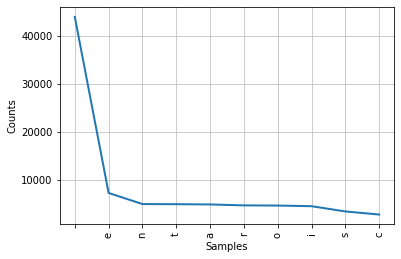

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [493]:
# Plotting
freqDist.plot(10)

In [494]:
lower_fd = nltk.FreqDist([f.lower() for f in FreqDist])
lower_fd

FreqDist({'e': 2, 'n': 2, 't': 2, 'a': 2, 'r': 2, 'o': 2, 'i': 2, 's': 2, 'c': 2, 'd': 2, ...})

In [495]:
>>> f = nltk.Text(nltk.corpus.state_union.words())
>>> f.concordance("GDP", lines=5)

no matches


In [496]:
>>> concordance_list = f.concordance_list("GDP", lines=2)
>>> for entry in concordance_list:
...     print(entry.line)

In [497]:
#words: list[str] = nltk.word_tokenize(f)
text = nltk.Text(f)
fd = text.vocab()  # Equivalent to fd = nltk.FreqDist(words)
fd.tabulate(15)

  the     .     ,    of    to   and    in     a   our    we  that   for    is     I  will 
19191 17501 17484 12854 11868 11748  6936  5837  5141  4338  4309  4070  3621  3394  2959 


In [498]:
#words = [f for f in nltk.corpus.state_union.words() if f.isalpha()]
finder = nltk.collocations.TrigramCollocationFinder.from_words(f)

In [499]:
finder.ngram_fd.most_common(10)

[(('(', 'Applause', '.)'), 385),
 (('.', '(', 'Applause'), 382),
 (('.', 'We', 'must'), 369),
 (('the', 'United', 'States'), 294),
 (('.', 'We', 'have'), 282),
 ((',', 'we', 'must'), 247),
 (('.', 'It', 'is'), 233),
 (('the', 'world', '.'), 206),
 (('.', 'In', 'the'), 200),
 (('America', "'", 's'), 192)]

In [500]:
finder.ngram_fd.tabulate(3)

('(', 'Applause', '.)')  ('.', '(', 'Applause')     ('.', 'We', 'must') 
                    385                     382                     369 


In [501]:
# Using NLTK’s Pre-Trained Sentiment Analyzer OPTION 1
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
k=sia.polarity_scores("    Monthly\n            Economic\n            Review\n            May\n            2021\n            Economic \n            Division1\n            Abstract\n            Provisional GDP estimates now available for January-March quarter (Q4) of FY 2020-21 confirm a \n            V-shaped recovery in India’s economic prospects in the second half of the year after an unprecedented \n            COVID-19 induced contraction. India’s real GDP is estimated to grow at 0.5 per cent in Q3 and 1.6 \n            per cent in Q4 of FY 2020-21 leading to an upward revision in annual real GDP growth from (-)8.0 \n            per cent (2nd Advance Estimates) to (-)7.3 per cent in FY 2020-21. Gross value added (GVA) at basic \n            prices for FY 2020-21 is estimated to grow at (-)6.2 per cent with agriculture & allied activities lending \n            its unwavering support for economic recovery throughout the year. Given the large contribution of \n            subsidies in Q3 and Q4, estimated GVA growth of 1.6 per cent in Q3 and 3.7 per cent in Q4 is more \n            representative of economic performance in the second half of FY 2020-21. India is one of the select few \n            economies that have witnessed positive YoY growth in the last two consecutive quarters.\n            With a strong policy focus on infrastructure spending and construction in latter half of FY 2020-21, the \n            ratio of Gross Fixed Capital Formation (GFCF) to GDP reached 34.3 per cent, among the highest in \n            over twenty-six quarters. Also, construction rebounded to grow at 14.5 per cent in Q4. As economic \n            activity resumed following gradual unlocking and policy support, private consumption grew at 2.7 per \n            cent after falling for three consecutive quarters. Moreover, contact-intensive hotels, trade and transport \n            sectors contracted by only 2.3 per cent in Q4 after large declines in previous quarters. \n            This momentum of economic recovery has, however, been moderated by the ravaging second wave of \n            COVID-19. Unlike the first wave, the effect of the second wave has been asynchronous in its onset \n            across states and wider in its spread as the second wave also entered the rural hinterland. This \n            necessitated a differentiated, state-level policy response in close coordination with the Central \n            Government for rapid rebooting of health infrastructure and effective implementation of ‘Test, Track, \n            Treat, Vaccinate and COVID-appropriate behaviour’. A continuous decline in the 7-day average of \n            active cases since 13th May 2021 and the 7-day average of daily new cases after 8th May marked the \n            declining phase of the second wave. \n            Simultaneously, the world’s largest vaccination drive is underway in India with 23.9 crore doses \n            administered as on date. To avoid or lower the ferocity of subsequent waves, an accelerated vaccination \n            drive is imperative. Vaccinating to achieve herd immunity (75-80 per cent of the population) will boost \n            consumer and producer confidence and reinvigorate the engines of economic growth. For this purpose, \n            challenges pertaining to vaccine supply, vaccine hesitancy, operational aspects to achieve high daily \n            throughput, and widespread reach must be anticipated and planned for in advance.\n            After declining during the second wave. high frequency indicators such as power consumption, E-way \n            bills and foreign portfolio investment (FPI) flows witnessed uptick in the second half of May 2021. \n            Agriculture sector continues to offer comfortable prospects amidst a normal monsoon forecast, smooth \n            food procurement and distribution, and MGNREGA employment. However, sequential slackening was \n            observed in eight core industrial output, PMI manufacturing, steel consumption, auto sales, tractor \n            sales, petroleum products consumption, rail freight, port and air traffic, PMI services, highway toll \n            collections, GST collections and UPI transactions. \n            CPI inflation eased to 4.3 per cent in April 2021 (as against 7.2 per cent in April 2020) from 5.5 per \n            cent in March 2021 driven by decline in food inflation and a favorable base effect. Going forward, the \n            trajectory for CPI inflation may derive comfort from the forecast of a normal south-west monsoon but\n            remains vulnerable to pressures arising from high international commodity prices and logistics costs \n            across manufacturing and services. WPI inflation, however, increased to 10.5 per cent in April 2021 as \n            compared to 7.4 per cent in March 2021 on account of increase in inflation of all major groups, viz, \n            Primary articles, Fuel & power and Manufactured products and base effect.2\n            On the external front, exports grew at 7.9 per cent in May 2021 over pre-COVID May 2019 levels, \n            thereby reflecting export resilience amidst global economic recovery. However, domestic demand \n            prospects remained tentative with imports declining by 17.5 per cent. India emerged as the preferred \n            investment destination, attracting highest ever FDI inflow of USD 81.7 billion during the pandemic \n            year FY 2020-21, particularly in computer software & hardware and infrastructure sectors. Bolstered \n            by resurgent net foreign inflows, easing of the second wave and weakening dollar, the Indian Rupee \n            made a strong comeback in May 2021 to reach INR/USD 72.8 and became the best performing Asian \n            currency in the month. \n            On the monetary side, money supply continued to rise by 9.9 per cent (YoY) as on 21st May 2021 driven \n            by growth in aggregate deposits. Monthly growth in currency-in-circulation (CiC) which had begun to \n            moderate in the second half of FY 20-21 picked up again in April and May 2021, suggestive of rise in \n            precautionary demand for cash during the second wave, albeit lower than first wave levels. Bank credit \n            YoY growth continued to remain muted at 6.0 per cent as on 21st May 2021. Growth of non-food credit \n            at over 12.4 per cent over the corresponding period in FY 2019-20 is noteworthy given the policy\x02driven focus on private investment. \n            Financial conditions in May 2021 have remained conducive for economic recovery with systemic \n            liquidity in surplus, continued accommodative monetary policy stance – as outlined in June 4 Monetary \n            Policy statement - and unhindered efforts towards smooth policy transmission. To mitigate challenges \n            of the second wave, RBI has further unveiled developmental and regulatory measures to ensure \n            equitable liquidity support for affected sectors and financial stability. \n            India’s dynamic public debt management strategy and RBI’s artillery of conventional and \n            unconventional instruments like G-SAP 1.0 has enabled Central and State governments to meet their \n            increasing financial needs amid the pandemic at low costs of borrowing and manageable levels of risk. \n            The 10-year G-Sec yield stayed below 6 per cent despite the uncertainty engendered by the second wave. \n            Corporate bond yields largely tracked G-sec market movements, reflecting policy rate transmission to \n            corporate bond market and surplus liquidity conditions. Primary corporate bond market issuances \n            increased by 13.4 per cent to a record Rs. 7.8 lakh crore during FY 2020-21. \n            Driven by buoyant and broad-based growth in Centre's net revenue collections of 5.9 per cent for 2020-\n            21 Provisional Actuals (PA) over 2020-21 Revised Estimates (RE) and nearly 5 per cent growth over \n            2019-20, Centre's fiscal deficit for FY 2020-21 stood at 9.2 per cent of GDP for 2020-21 (PA), 0.3 \n            percentage points lower than RE. Quality of expenditure crucially improved with capex in FY 2020-\n            21(PA) registering a growth of 26 per cent over 2019-20 and 66.5 per cent in April 2021 over April \n            2020.\n            As we cautiously recuperate from the second wave, rapid vaccination and frontloading of the fiscal \n            measures planned in the Union Budget hold key to invigorating the investment, and thereby \n            consumption, cycle in the coming quarters. As seen in Q4: FY 2020-21, where growth in capex \n            generated positive spillovers for consumption, including in the contact-sensitive sectors, these steps \n            would facilitate recovery post the second wave. Healthy monsoon forecasts bode well for continued \n            momentum in agricultural growth. With state-level lockdown restrictions being more adaptive to \n            learnings from the first wave, manufacturing and construction are expected to experience a softer \n            economic shock in the current quarter. Quickening the pace and coverage of vaccination is critical to \n            help India heal and regain the momentum of economic recovery.\n            ******3\n            India staged a V-shaped recovery in FY 2020-21\n            1. As per the Provisional Estimates released by NSO, India’s GDP contracted at 7.3 per \n            cent, which was an improvement over the Second Advance Estimate of a contraction of 8 per \n            cent growth released in February 2021. This was largely due to the steady V-shaped recovery \n            in India’s economy in the second half of FY: 2020-21. Monthly Economic Review, November \n            2020, had stated that “This V-shaped recovery, evident at the half-way stage of 2020-21, \n            reflects the resilience and robustness of the Indian economy”. This recovery is evident from \n            the movement in various high-frequency indicators over the last year.\n            2. The economy registered a YoY growth of 1.1 per cent in H2: FY 2020-21 as compared \n            to (-) 15.9 per cent in H1: FY 2020-21 – implying a growth of 25.5 per cent in H2 over H1. In \n            terms of Real GVA, the economy registered a contraction of 6.2 per cent in FY: 2020-21 with \n            a contraction of 14.9 per cent in H1: FY 2020-21 and growth of 2.4 per cent in H2: FY 2020-\n            21. The divergence in GDP and GVA growth in FY: 2020-21 reflects a sharp fall of 18.4 per \n            cent in net taxes that can be attributed to adjustment of food subsidy arrears in the last quarter \n            of the fiscal.\n            India’s GDP Growth: V-shaped recovery\n            Source: MOSPI\n            V-shaped Recovery also evident in movement of high frequency indicators\n            Source: Compiled from various sources\n            -30%\n            -25%\n            -20%\n            -15%\n            -10%\n            -5%\n            0%\n            5%\n            10%\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            35\n            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4\n            2017-18 2018-19 2019-20 2020-21\n            Rs. lakh crore\n            GDP YoY growth (RHS)\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            0\n            40\n            80\n            120\n            160\n            200\n            Apr 19\n            May 19\n            Jun 19\n            Jul 19\n            Aug 19\n            Sep 19\n            Oct 19\n            Nov 19\n            Dec 19\n            Jan 20\n            Feb 20\n            Mar 20\n            Apr 20\n            May 20\n            Jun 20\n            Jul 20\n            Aug 20\n            Sep 20\n            Oct 20\n            Nov 20\n            Dec 20\n            Jan 21\n            Feb 21\n            Mar 21\n            Apr 21\n            GST collection (Rs lakh crore) IIP Index\n            Power consumption ('000 Mega Units) Petroleum Products Consumption ('000 tonnes)\n            PMI Manufacturing (RHS) PMI Services (RHS)\n            Merchandise Imports (USD billion) (RHS)4\n            3. The country’s GDP grew by 1.6 per cent in Q4: FY 2020-21, an improvement over the \n            0.5 per cent growth in Q3: FY 2020-21 and the negative growth of 24.4 per cent and 7.4 per \n            cent in the first two quarters of FY 2020-21. In terms of GVA, the economy grew at 3.7 per \n            cent in Q4: FY 2020-21, an improvement over the 1.0 per cent growth in Q3: FY 2020-21 and \n            the negative growth of 22.4 per cent and 7.3 per cent in the first two quarters of FY 2020-Given \n            the large contribution of subsidies in Q3 and Q4, estimated GVA growth of 1.6 per cent in Q3 \n            and 3.7 per cent in Q4 is more representative of economic performance in the second half of \n            FY 2020-21. The higher economic growth during the fourth quarter can be linked to the \n            unlocking of the economy and revival in business and consumer confidence that was underway \n            during the period. India is one of the select few economies that have witnessed positive year\x02on-year growth in the last two consecutive quarters.\n            GDP Growth (YoY) in FY 2020-21 for Major Economies\n            Q1 Q2 Q3 Q4\n            G-20 Advanced Economies\n            Canada -12.7 -5.3 -3.2 0.3 \n            France -18.4 -3.5 -4.6 1.2 \n            Germany -11.2 -3.8 -3.3 -3.1 \n            Italy -18.1 -5.2 -6.5 -0.8 \n            Japan -10.2 -5.5 -1.0 -1.8 \n            Spain -21.6 -8.6 -8.9 -4.3 \n            UK -21.4 -8.5 -7.3 -6.1 \n            US -9.0 -2.8 -2.4 0.4 \n            G-20 Emerging Markets\n            Brazil -10.9 -3.9 -1.2 \n            China 3.2 4.9 6.5 18.3 \n            India -24.4 -7.3 0.5 1.6\n            Indonesia -5.4 -3.5 -2.3 -0.5\n            Mexico -18.7 -8.6 -4.6 -2.8\n            Russia -4.6 -3.0 -2.8 \n            South Africa -17.5 -5.9 -4.2 \n            Turkey -8.7 5.4 5.0 6.7\n             Source: OECD, MOSPI (for India)\n            4. The growth in output in Q4 FY:2020-21 was broad-based across sectors. Agriculture, \n            industry and services sector witnessed positive YoY growth during the quarter. The industrial \n            sector grew at a 11-quarter high of 7.9 per cent aided by the higher output in manufacturing \n            (6.9 per cent), electricity, gas, water & utility services (9.1 per cent) and construction (14.5 per \n            cent). Only the mining and quarrying sector recorded negative growth during the quarter (-5.7 \n            per cent). Agriculture sector grew by a strong 3.1 per cent in Q4 FY: 2020-21 which was over \n            a high base of 6.8 per cent growth in the same period last year. The services sector returned to \n            growth after a gap of three quarters in Q4 FY: 2020-21, recording a YoY growth of 1.5 per \n            cent. This improvement was led by finance, real estate & professional service (5.4 per cent \n            growth) along with public administration (2.3 per cent growth). Contact-intensive hotels, trade \n            and transport sectors contracted by only 2.3 per cent in Q4 after large declines in previous \n            quarters. Agriculture was the only sector which registered growth in FY: 2020-21 raising its \n            share in overall GVA.5\n            5. There has been a notable pick- up in investment and consumption (both government \n            and private consumption) in Q4: FY 2020-21 when compared with the preceding three quarters. \n            Private consumption which is the main driver of the economy (accounting for 60 per cent of \n            the GDP) witnessed a YoY growth of 2.7 per cent in Q4: FY 2020-21 as compared to (-)26.2 \n            per cent in Q1, (-)11.2 per cent in Q2 and (-)2.8 per cent in Q3: FY 2020-21. Government \n            consumption witnessed a sharp increase, growing by 28.3 per cent in Q4: FY 2020-21 over the \n            12.1 per cent growth in Q4: FY 2019-20. Investments measured as Gross Fixed Capital \n            Formation (GFCF) grew at a 7-quarter high of 10.9 per cent in Q4: FY 2020-21. With a strong \n            policy focus on infrastructure spending and construction in latter half of FY 2020-21, Gross \n            Fixed Capital Formation (GFCF) to GDP ratio reached one of its highest at 34.3 per cent in \n            over twenty-six quarters and construction rebounded to grow at 14.5 per cent in Q4. \n            6. The GDP estimates for the year 2020-21 corroborate that the Indian economy was \n            steadily recovering in the second half of the year. The recovery was supported by gradual \n            unlocking and normalization of economic activity manifested in growth of private consumption \n            Trends in India’s GVA\n            Source: MOSPI\n            Trends in India’s GDP – Demand Side\n            Source: MOSPI\n            -25\n            -20\n            -15\n            -10\n            -5\n            0\n            5\n            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4\n            2019-20 2020-21\n            Services\n            Industry\n            Agriculture, forestry & fishing\n            GVA at Basic Price\n            18.2 17.7 18.0 18.3 17.6 18.4 20.2\n            30.0 30.0 29.3 29.2 29.0 26.7 25.9\n            51.8 52.3 52.6 52.5 53.4 55.0 53.9\n            0\n            20\n            40\n            60\n            80\n            100\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Share in GVA (%)\n            Agriculture, forestry & fishing Industry Services\n            -35\n            -30\n            -25\n            -20\n            -15\n            -10\n            -5\n            0\n            5\n            10\n            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4\n            2019-20 2020-21\n            Percent\n             GFCE PFCE\n            GFCF Net Exports\n            GDP\n            10.4 10.4 10.3 10.8 10.8 11.2 12.5\n            58.1 59.0 59.3 58.7 59.4 60.5 58.6\n            34.3 32.1 30.2 31.0 32.1 30.7 29.3\n            -10\n            10\n            30\n            50\n            70\n            90\n            110\n            2014-\n            15\n            2015-\n            16\n            2016-\n            17\n            2017-\n            18\n            2018-\n            19\n            2019-\n            20\n            2020-\n            21\n            GFCE PFCE GCF Net Exports6\n            expenditure and investment returning to positive territory. Government Expenditure has served \n            as the cushion for the year growing at a rate of 28.3 per cent in Q4 and 2.9 percent in the whole \n            year. The onset of the second wave of COVID-19, however, has posed a downside risk to this \n            momentum in India’s economic recovery. With the peaking of the second wave in first half of \n            May 2021 and the localised restrictions adopted to combat its spread, its economic impact is \n            expected to be restricted to the first quarter of FY: 2021-22. Taking all these factors into \n            consideration, RBI has projected real GDP growth at 9.5 per cent in 2021-22 consisting of 18.5 \n            per cent in Q1; 7.9 per cent in Q2; 7.2 per cent in Q3; and 6.6 per cent in Q4 of 2021-22.\n            India past its Peak of Second wave – need to maintain the guard \n            7. In India, the pace of contagion in the second wave has been alarming, stretching the \n            health infrastructure in terms of the capacity to handle a surge of this size and speed. A decline \n            in seven days moving average of new cases since 8th May 2021 and seven days moving average \n            of active cases since 13th May 2021 marked the attainment of the peak of the second wave –\n            almost 4 times the peak in the first wave. India also attained the peak faster during the second \n            wave - in 79 days compared to 220 days in first wave – signifying how swiftly the second wave \n            enveloped the nation. Daily new cases have now trickled down from 4.1 lakh on 5th May 2021 \n            to less than 1 lakh as on date. The daily positivity rate has dropped from a peak of 24.9 percent \n            (on 9th May) to 4.6 percent as on date. The pace of spread has slowed down with increase in \n            doubling time to 54 days in May from 46 days in April. The daily recoveries continue to \n            outnumber daily new cases with recovery rate rising to 94.5 percent. As on date, India has 12.3\n            lakh active cases – down from a peak of 37.3 lakh cases on 13th May 2021 with cumulative \n            fatality rate at 1.2 percent. \n            Daily Cases and Positivity Rate Doubling Time (in Days)\n            Source: https://www.covid19india.org/\n            Note: Doubling rate defined as ln2/ ln (1 + r), where r is average of last 30 days of growth in cumulative cases\n            Note: Doubling rate is defined as ln2/ ln (1 + r), where r is the average of last seven days of \n            growth in cumulative cases.\n            8. The peak in infection rate has been asynchronous among states as evident from the table \n            below. High weekly case load is evident in states like Andhra Pradesh, Karnataka, Kerala, \n            Maharashtra, Tamil Nadu and West Bengal. Given the improvement in recovery rate, active \n            cases exhibited a declining trend across states barring Tamil Nadu and few north-eastern states. \n            0%\n            5%\n            10%\n            15%\n            20%\n            25%\n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            350\n            400\n            450\n            4/11/20\n            5/11/20\n            6/10/20\n            7/10/20\n            8/9/20\n            9/8/20\n            10/8/20\n            11/7/20\n            12/7/20\n            1/6/21\n            2/5/21\n            3/7/21\n            4/6/21\n            5/6/21\n            6/5/21\n            Thousands\n            Daily New Cases\n            Positivity rate (7DMA) RHS\n            3 7 12 19 20 27 39\n            80\n            143\n            249\n            463\n            643\n            219\n            46 54\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/217\n            State-Wise COVID-19 Weekly Trend\n            Weekly Cases Active Cases as on\n            States/UTs 26 Apr\x022 May 3-9 May 10-16 \n            May\n            17-23 \n            May\n            24-30 \n            May 02-May 09-May 16-May 23-May 30-May\n            A &N Islands 419 283 236 241 140 222 208 237 273 192\n            Andhra Pradesh 111462 142581 147888 145336 104315 143178 190632 210436 209237 165795\n            Arunachal P. 1132 1427 1637 2291 2857 1407 1934 2261 2900 3784\n            Assam 21428 33407 36261 40554 37685 25791 37245 44617 53004 53688\n            Bihar 94044 93836 60433 37667 16072 109946 110805 75090 40692 18378\n            Chandigarh 5614 5901 5160 3122 1433 7592 8511 7644 4874 2134\n            Chhattisgarh 104065 95049 61001 36523 20300 120367 126547 103593 65774 39261\n            Delhi 167231 128621 70300 23001 8724 92290 86232 62783 27610 12100\n            Goa 17908 23461 17010 10604 8604 24607 31875 28252 17277 14010\n            Gujarat 98569 86410 71607 35851 19018 146817 139613 104907 75133 35402\n            Haryana 90569 101009 78530 43601 17361 105271 116868 90067 42817 21088\n            HP 16990 26932 28817 18794 10431 20786 32505 36938 26003 14960\n            J&K 22731 33446 27676 26013 18319 32421 49248 51623 47437 37677\n            Jharkhand 42725 41871 29159 14915 6526 58493 58779 36513 19472 9878\n            Karnataka 262664 332513 269084 221442 162923 421448 564497 600160 472999 342023\n            Kerala 233123 263850 245339 199999 166313 339788 423868 441016 277978 224125\n            Lakshadweep 884 871 886 1844 1317 1260 1032 1138 2075 2163\n            MP 89064 83395 59622 32953 14487 87188 108912 94651 57765 27255\n            Maharashtra 427374 379336 276715 201445 151918 670460 618071 470596 351006 274602\n            Manipur 1740 3193 4375 4360 5793 1816 4273 6470 6527 8475\n            Meghalaya 1435 2291 3612 6349 5509 1912 2990 4625 7773 7587\n            Mizoram 896 1266 1129 1541 1768 1232 1786 1978 2358 3001\n            Nagaland 1167 1800 1926 1992 1495 1915 3292 4641 5252 5646\n            Odisha 55165 72220 77382 80158 64302 62926 84746 95326 100235 83385\n            Puducherry 8082 10348 12797 11554 7766 10622 14036 17668 16853 12169\n            Punjab 46180 56855 55580 41289 26421 60108 74343 75478 57505 39263\n            Rajasthan 119514 122756 102962 56373 22418 189178 200189 194382 112218 49224\n            Tamil Nadu 125124 173147 217957 244128 226236 120444 144547 219342 294143 305546\n            Telangana 55558 46571 31462 24454 22550 80221 65283 50495 40015 34568\n            Tripura 1060 1970 3257 5283 4640 1528 2809 4921 8071 7102\n            Uttar Pradesh 226736 190129 116155 50246 20125 295752 233981 163003 84880 41214\n            Uttarakhand 39819 52653 43013 26233 14819 57674 78911 83945 60111 36048\n            West Bengal 119443 129766 140271 133660 99150 118495 126027 131805 130525 94898\n            Source: https://www.covid19india.org/\n            9. Given the ferocity of the second wave, the spread of infection in rural areas has also \n            been rapid. The share of rural districts in new cases rose rapidly from 49.7 percent in April to \n            57.9 percent in May though lower than the first wave peak of 63.6 percent observed during \n            September 2020. The number of rural districts bearing 20 percent of new cases increased \n            sharply from 12 in March to 43 districts in April that rose further to 47 in May, which in turn \n            is 3.4 times greater than their share during the peak of the first wave.8\n            Share in new cases Number of rural districts with share of 20 \n            percent in new cases\n            Source: https://www.covid19india.org/\n            Note: Rural districts are classified using 2011 census data and defined as male population (75% and above) \n            engaged in non-agriculture activities and have population density of 400 persons per sq.km.\n            10. Keeping the focus on “Test, Track, Treat, Vaccinate and COVID-appropriate \n            Behaviour” strategy, India ramped up its average daily testing capacity from 15 lakh in April \n            to 19 lakh during May. 3-day moving average positivity rate has fallen from 20.8 per cent in \n            April 2021 to 7.9 per cent as on 31st May, though wide variation across states is noted. On the \n            positive side, by May end, around 50 percent of the states have managed to bring the positivity \n            rate below WHO recommended threshold of 5 percent. This is an enabling factor for a \n            calibrated and gradual relaxation of state-wide restrictions.\n            Positivity Rate (3 days moving average)\n            As on 30th April 2021 As on 31st May 2021\n            <5% 5%-15% >=15%\n            Source: https://www.covid19india.org/\n            63.6%\n            30.0%\n            45.2%\n            53.6%\n            49.7% 47.4%\n            57.9%\n            37.7%\n            R U R A L D IS T R IC T S U R B A N D IS T R IC T S\n            Sep-20 Mar-21 Apr-21 May-21\n            14 12\n            43 47\n            Sep/20 Mar/21 Apr/21 May/219\n            Vaccination on a Mission mode: Key to save both lives and livelihoods\n            11. Vaccination is an integral pillar of the comprehensive strategy of Government of India \n            for containment and management of the pandemic. The vaccination drive has been sequentially \n            expanded to cover the prioritized groups starting with Health Care Workers (HCWs) followed \n            by Front Line Workers (FLWs), then the persons aged 60 years and above and those aged 45-\n            59 years with identified 20 co-morbidities. Subsequently, from 1st April 2021, all persons aged \n            45 years and above were eligible for vaccination. Such an approach has yielded positive results \n            by achieving more than 81 per cent 1st dose coverage amongst registered HCWs and around 84 \n            per cent coverage of 1st dose amongst registered FLWs thereby protecting these cohorts who \n            are involved in providing Health Care Services, Surveillance and Containment activities amidst \n            the second wave of COVID-19 pandemic. \n            12. As part of the nationwide vaccination drive, the 'Liberalized Pricing and Accelerated \n            National COVID-19 Vaccination Strategy' was implemented from 1st May 2021 wherein all \n            above the age of 18 became eligible for vaccination. 50 per cent of the available doses were \n            earmarked for supply to States/UTs, as free of cost supply from the Central Government, while \n            25 per cent each was available for direct procurement from the vaccine manufacturers by \n            States/UTs and private hospitals. To streamline the process further, it has now been decided \n            that the 25 per cent vaccination that was with states will also now be undertaken by the Central \n            Government and provided free of cost to the State Government for rolling out wef 21st June. \n            25 per cent vaccines being procured directly by the private hospitals will continue with only \n            ₹150 service charge is levied by the private hospitals over the decided price of the vaccines. \n            13. India has crossed the 23.9 crore mark in its cumulative COVID vaccination coverage. \n            Around 14 percent of beneficiaries receiving the first dose are healthcare and frontline workers, \n            33 percent are senior citizens, 38 percent belong to 45 to 60 years age group and 15 percent \n            beneficiaries are of the age group 18-44 years. An analysis of the state wise proportion of \n            population vaccinated relative to its share in total population indicates that Bihar, Uttar \n            Pradesh, Tamil Nadu, West Bengal, Madhya Pradesh and Jharkhand need to ramp up their \n            vaccination drive. Vaccination remains the key guard against subsequent waves and the \n            coverage of the population needs to be enhanced across all States. \n            State wise share of vaccination relative to population share \n            Source: Ministry of Health and Family Welfare\n            AP\n            AS\n            BR\n            CT\n            DL\n            GJ\n            HR\n            JK JH\n            KA\n            KL\n            MP\n            MH\n            OR\n            PB\n            RJ\n            TN\n            TG\n            UT\n            WB\n            0%\n            2%\n            4%\n            6%\n            8%\n            10%\n            12%\n            0% 2% 4% 6% 8% 10% 12%\n            State share in total vaccination \n            State share in total population \n            On right track, keep going\n            Should vaccinate more \n            UP (17%,9%)10\n            14. Global research on high efficacy of first dose of vaccine, non-depletion of the impact \n            of the first dose despite a longer gap1\n            , reduction of both symptomatic and asymptomatic \n            infections after the first dose2\n            and higher benefits accruing from first-dose-vaccination of a \n            larger population to render community protection can help design an effective inoculation \n            strategy. Canada’s approach of prioritising ‘first dose for all’ has been a successful one with \n            only 0.15 per cent of Canadians getting infected after getting vaccinated3\n            . \n            Need to achieve herd immunity at the earliest for economic recovery\n            Herd immunity is accomplished when 80 percent of the population is immune or less \n            susceptible to infection. The key to regain the momentum of economic recovery is attainment \n            of herd immunity at the earliest possible. As per India’s demographic distribution, 86.5 crore \n            people or 63.1 per cent of the population is above 18 years of age. Assuming herd immunity \n            at 80 per cent, the target population to be vaccinated is 70 crore. As on date, 19.2 crore people \n            have got the first dose while 4.7 crore have been fully vaccinated. If 70 crore people must be \n            vaccinated by September 2021, it is estimated that around 113 crore doses are needed (19\n            crore for the second dose + 47 crore for two doses). \n            With around 120 days to 31st September 2021, around 93 lakh vaccinations are required per \n            day to achieve the herd immunity. The peak daily vaccination rate attained till date is 42.65 \n            lakh. This peak was achieved using one shift of 8-9 hours of vaccination. So, doubling the \n            shifts and possibly vaccinating 24x7 for a couple of months – particularly in August and \n            September when supply is expected to increase significantly – can enable the ambitious, but \n            possible, throughput of 1 crore shots a day.\n            The challenges of the ‘push’ factors of ensuring adequate and timely supplies for the target \n            population size and efficient and equitable distribution of sourced vaccines; ‘pull’ factors of \n            overcoming vaccine hesitancy and streamlining of ‘operational issues’ in administering the \n            vaccine at scale with the right guidelines and technology as the enabler, are required to be \n            handled upfront.\n            Vaccine manufacturers have been ramping up capacity and over 216 crore of doses are \n            estimated to be manufactured in India during August-December 2021. Attempts are being \n            made to fast-track procurement efforts of vaccines from the international market. The supply \n            can be aligned with the target of September 2021 with people already having antibodies \n            vaccinated later while people who have not been exposed given priority. \n            Communication efforts ought to be ramped up to minimise vaccination hesitancy especially \n            in rural areas. Using the principles of behavioural economics via tailored messaging to spur \n            vaccination demand, outreach campaigns to show how only vaccination can help India get \n            out of the current crisis, mass mobilisation to address concerns around vaccination and \n            improved ease of access to availability of vaccine can go a long way in ‘pulling’ vaccination \n            demand. A process may be created to send alerts for instant appointments for leftovers/ no\x02shows will enable reduced wastages and efficient usage of the supply available.\n            1 https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3777268\n            2 https://www.bmj.com/content/373/bmj.n1068\n            3 https://globalnews.ca/news/7902177/covid-canada-infection-vaccination-effectiveness/11\n            The operational challenges can be met by careful planning and upscaling of transportation, \n            storage and vaccine administration capacity. Use of technology to ease the administration \n            of the vaccine, increased shifts at vaccination centres and integration of mass vaccination \n            sites e.g., shopping areas, drive-ins, with schools and primary health care centres will \n            enhance faster coverage under vaccination.\n            Expansion of vaccination to achieve herd immunity (75-80 per cent of the population) will \n            boost consumer and producer confidence and reinvigorate the engines of economic growth. \n            Vaccination of the target population (70 crore) with atleast the first dose till September 2021, \n            therefore, becomes paramount and must be taken up on a mission mode.\n            15. Globally, the increased coverage of population under vaccination has been effective \n            both in controlling the spread of covid and boosting mobility. It was emphasized in the Monthly \n            Economic Review, March 2021, that ‘Vaccines are a key macro lever for domestic and global \n            economic growth’. The second wave enveloped India with its severity and swiftness of spread \n            signifying that quickening the pace and coverage of vaccination is critical. With a focus to \n            avoid or lower the ferocity of any subsequent third wave, an accelerated vaccination drive is \n            imperative. \n            Global Overview – mixed trends giving reasons to both cheer and fear\n            16. The waning of the second wave in India mirrored the trend across the globe. In May, \n            COVID-19 new cases declined both in advanced economies (AEs) and emerging and \n            developing economies (EMDEs). Vaccination progress remains highly uneven and as of now, \n            around 11 percent and 6 percent of total world’s population have been partially and fully \n            inoculated respectively. Advanced economies have administered more than 36 doses per\n            hundred people, compared to only 6 in EMDEs till May 2021. \n            17. Global economic recovery accelerated further in May with European economies \n            opening, vaccinations soaring, and US and China leading the recovery. Strong demand for \n            goods and rebound in services, buttressed by fiscal support by few large economies and easy \n            monetary conditions, have kept investors optimistic and eased job markets. That said, the \n            divergence in recovery and vaccinations, with Latin America, Africa, and some Asian countries \n            lagging behind threatens an across-the-board recovery. Moreover, continued rise in prices (both \n            for producers and consumers) signal need to avert overheating of economies.\n            18. Global PMI continued its broad-based rise in May and accelerated to 15-year high at \n            58.4, as new orders and international trade rose at stronger rates. US and UK led output growth \n            rankings and output prices rose at series-record pace, offsetting the subdued activity in Asia \n            region. The rate of increase in services activity outpaced that of manufacturing production for \n            the second month in May since the current revival in global activity began last July. UK PMI \n            saw the fastest private sector growth since 1998, with pent-up demand and labour market easing \n            with loosening of movement restrictions. Eurozone PMI rose to a 39-months high, to 56.9, as \n            economies mobility restrictions and demand surged to fastest in 15 years. Japanese PMI \n            returned to contractionary zone as resurge in COVID Cases and reimposition of restrictions led \n            to deterioration in business conditions, the decline being led by contraction in services sector.12\n            Global PMI Composite Indices Commodity Prices\n            Source: IHS Markit; May numbers are Flash Estimates Source: IMF\n            Commodity and Inflation\n            19. Commodity prices rose further due to rising demand and supply chain disruptions, with \n            increasing signs of high input costs being passed to consumers. The IMF All Commodities \n            index grew by 71.6 per cent YoY in April, led by rise in crude oil and natural gas prices. On a \n            sequential basis, all commodities rose by 2.2 per cent, crude oil prices declined by a slight 1.5 \n            per cent, while natural gas rose by 14 per cent, backed by lower than average temperatures in \n            Europe. World food prices rose in May at their fastest monthly rate in more than a decade to \n            hit their highest level since September 2011. Gold prices started rising on back of weakening \n            dollar and lowering yields. Base metals prices rose consecutively for the twelfth month, with \n            global manufacturing activity steadily expanding, dollar weakening, and concerns over \n            resurging COVID-19 cases in South America (affecting copper prices). Rise in consumer price \n            inflation in major economies occurred with the background of recovery in advanced \n            economies, commodity price rise, supply disruptions, and easy fiscal and monetary conditions, \n            fuelling concerns of overheating and future increase in interest rates. A prolonged rise in \n            inflation poses threat to investor sentiment and thereby to global financial stability.\n            Global Inflation Trend (YoY)\n            Source: OECD\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            80\n            Jan-20\n            Feb-20\n            Mar-20\n            Apr-20\n            May-20\n            Jun-20\n            Jul-20\n            Aug-20\n            Sep-20\n            Oct-20\n            Nov-20\n            Dec-20\n            Jan-21\n            Feb-21\n            Mar-21\n            Apr-21\n            May-21\n            Global (RHS) China US\n            Eurozone Japan UK\n            1000\n            1500\n            2000\n            0\n            50\n            100\n            150\n            200\n            250\n            Apr/19\n            Jul/19\n            Oct/19\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            US$ per troy ounce\n            Index \n            All Commodity Base Metals\n            Natural Gas Coal Price\n            Crude Oil (petroleum) Food\n            Gold (RHS)\n            -2%\n            0%\n            2%\n            4%\n            6%\n            8%\n            Jan/19\n            Feb/19\n            Mar/19\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            US China Euro Area Japan\n            Canada Germany UK Brazil13\n            Global Trade\n            20. Global trade remained resilient, with global commercial flight activity moderating \n            slightly in May remaining broadly stable, and port activity improving further into April. The \n            average daily number of international commercial flights in May was 132 per cent of previous \n            year level. Global port activity in April rose by 4 per cent MoM and 19 per cent YoY, led by \n            upturn in Europe as lockdowns opened up. However, high freight rates and container shortages \n            continue to be supply-side challenges. WTO’s Goods Trade Barometer also points to an \n            acceleration in trade recovery in March 2021, with export orders, electronic components, and \n            air freight booking major gains, as indicated by commercial flight and port activity numbers \n            earlier. \n            21. UNCTAD’s Global Trade Update, May 2021 underscores the resilience of international \n            trade, recovering steadily after a steep fall in Q2 2020, further rebounding in Q1 of 2021. Trade \n            has rebounded more quickly for developing countries compared to developed countries. \n            However, East Asian economies strong export performance constitute a large chunk of this \n            growth, driving much of the trade recovery for developing countries. Trade in goods surpassed \n            its pre-pandemic levels in Q1 2021, however, trade in services remains below Q1 2019 levels. \n            During Q1 2021, trade continued to rebound not only in sectors related to COVID-19 (e.g. \n            pharmaceuticals, communication and office equipment) but also increased for most other \n            sectors, such as minerals and agri-food. For 2021, global trade is projected to grow by 16 per \n            cent, but the outlook remains uncertain in view of uneven economic recovery, COVID induced \n            additional borrowings by government and private parties, trade policy developments, reshoring \n            and nearshoring trends, among others. \n            Financial markets \n            22. Global financial conditions fluctuated in May and stabilised around the last week. This \n            was mainly due to inflationary pressures in the US and surging commodity prices, stoking \n            anxieties of upcoming rise in interest rates and bond yields. Advanced economies recorded \n            modest gains at May end, as US job data uplifted investors’ spirit, with Dow Jones closing 2 \n            per cent higher. Asian stocks, as measured with MSCI Asia Pacific Index, dipped around mid\x02May, with inflationary pressures and resurgence in COVID-19 cases taking a toll on investor \n            sentiment, wiping off the year’s gains so far.\n            International Commercial Flights (Nos.) Container Throughput Index\n            Source: Flightradar24 Source: RWI/ISL-Containerumschlag\n            0\n            20000\n            40000\n            60000\n            80000\n            100000\n            120000\n            140000\n            1/Jan/20\n            1/Mar/20\n            1/May/20\n            1/Jul/20\n            1/Sep/20\n            1/Nov/20\n            1/Jan/21\n            1/Mar/21\n            1/May/21\n            Current COPPY\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            140\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            COPPY Current14\n            23. In the currency markets, US dollar index weakened by 1.4 per cent MoM in May against \n            defined basket of currencies, as yields continued to be low. Euro appreciated on back of \n            weakened dollar, economic recovery and reopening of economies, while Japanese Yen, \n            dampened by resurge in COVID-19 cases, ended up a tad weaker on end of May. The Chinese \n            Yuan climbed to a 3-year high against the USD, with Chinese economy’s strong performance, \n            and high interest rates.\n            Domestic Macro-economic overview: Moderation in the momentum of recovery in the \n            face of the impact of the second wave \n            Agricultural Sector\n            24. Emerging as the silver lining among the pandemic-hit economy, agricultural sector has \n            cushioned the economic impact being the only sector posting growth in FY 2020-21. India's \n            foodgrain production is estimated to rise 2.7 per cent to a new record of 305.43 million tonnes \n            in the current crop year 2020-21, on record output of rice, wheat, maize and gram. Total pulses \n            production has also posted a record at 25.58 million tonnes – a rise of 11.2 per cent over last \n            year. In the non-foodgrain category, based on record production of groundnut and Rapeseed & \n            Mustard, total oilseeds production touched a record of 36.57 million tonnes – 10.1 per cent rise \n            over last year. With the prediction of a ‘normal’ monsoons this year, the government has set a \n            record target to raise foodgrain production further to 307.31 million tonnes during 2021-22 \n            crop year, starting July. The south-west monsoon knocked on the doors of India by hitting the \n            coast of Kerala on June 3. \n            25. Public procurement of rice and wheat during the year 2020-21 has been going smoothly. \n            Against the target to buy 427.4 LMT of wheat for the central pool during 2021, a record \n            procurement of 411.12 LMT has already been done with Punjab accounting for 33 per cent of \n            the same. All States, including Punjab and Haryana, have switched from the system of indirect \n            payment of MSP to direct online transfers of benefit to farmers bank accounts against sale of \n            their crops – enabling the proceeds of public procurement of foodgrains directly into the bank \n            accounts of the farmers under “One Nation, One MSP, One DBT”. About 44.43 Lakh farmers \n            have been benefitted from the ongoing procurement operations with MSP value of Rs. \n            Financial Market Performance Exchange Rates\n            Source: Compiled using various agencies \n            0\n            10000\n            20000\n            30000\n            40000\n            Jan/19\n            Mar/19\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Nikkei 225\n            Shanghai Composite\n            FTSE 100\n            Dow Jones\n            84\n            86\n            88\n            90\n            92\n            94\n            96\n            98\n            100\n            0\n            0.2\n            0.4\n            0.6\n            0.8\n            1\n            1.2\n            1.4\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Japanese Yen/USD Euro/USD\n            Chinese Yuan/USD Dollar Index (RHS)15\n            81,196.20 Crore, out of which an amount of Rs 76,055.71 crore has already been transferred \n            to farmers across the country. \n            26. Under the Pradhan Mantri Garib Kalyan Anna Yojana (PM-GKAY - III) scheme, \n            additional food grains, @ 5 kg per person per month, free of cost to around 79.39 crore \n            beneficiaries covered under National Food Security Act (NFSA) which was provided initially \n            for a period of two months i.e., May-June 2021 and has been extended till November 2021. All \n            36 States/UTs have lifted 63.67 LMT of food grains from FCI depots. FCI currently has \n            adequate availability of stocks of food grain with more than 100 million tonnes of food grain, \n            4.8 times the mandatory stock requirement for May. ‘One Nation One Ration Card’ (ONORC), \n            14445 toll-free number and ‘Mera Ration’ Mobile application has been seamlessly enabled in \n            32 States/UTs, covering about 69 Crore beneficiaries (86 per cent NFSA population) in these \n            States/UTs. MGNREGS has been a critical support in providing rural employment during the \n            last year and in the wake of the second wave of the pandemic. The demand for work continues \n            to be high with 4.14 crore persons demanding work in May 2021 and the number of person \n            days generated at 24.2 crore person days in the same month. \n            Industry\n            27. The Index of Industrial Production (IIP) posted a robust double-digit expansion of 22.4 \n            per cent YoY in March 2021 against a decline of 18.7 per cent in March 2020 and registering \n            a growth of 4.7 per cent over March 2019 - largely due to the lockdown induced favourable \n            base from last year. During FY 2020-21, IIP has de-grown by 8.6 per cent compared with \n            negative growth of 0.8 per cent in FY 2019-20. Industrial output in first half fell by 20.8 per \n            cent while in the second half the growth has been steady at 3.5 per cent. All sectoral and use\x02based components manifested a de-growth in FY 2020-21. Manufacturing sector fell by 9.8 per \n            cent in FY 2020-21 as compared to a decline of 1.4 per cent in FY 2019-20; followed by \n            significant decline in Mining at 7.8 per cent (against a growth of 1.6 per cent in FY 2019-20) \n            and a decline of 0.5 percent in Electricity (against a growth of 1.0 per cent in FY 2019-20). \n            Under the use-based classification, capital goods and consumer-durables showed a sharp \n            double digit decline at 19.2 per cent and 15.2 percent respectively followed by de-growth of \n            9.7 percent in intermediate and 9.1 per cent in infrastructure goods. \n            Agricultural Production in India Procurement of Wheat in RMS 2021-22\n            Source: Department of Agriculture and Farmers Welfare, FCI\n            Note: Units are Lakh bales for Jute and Cotton, Lakh tonnes for pulses and oilseeds, million tonnes for cereals \n            305\n            256\n            366\n            393\n            365\n            96\n            Cereals\n            Pulses\n            Oilseeds\n            Sugarcane\n            Cotton\n            Jute\n            2019-20 2020-21\n            Punjab\n            33%\n            MP\n            31%\n            Haryana\n            21%\n            Rajasthan\n            5% UP\n            10%16\n            Trends in IIP Growth (Annual)\n            Source: MoSPI\n            28. In April 2021, the eight core sectors registered a double-digit output growth of 56.1 per \n            cent over last year and (-)3.0 per cent as compared to April 2019 compared with 11.4 per cent \n            growth in March 2021. The high growth in output can be attributed to a low base effect (-37.9 \n            per cent in April 2020) as the nation-wide lockdown was imposed last year during this month. \n            The expansion in April has been led by an exponential growth in output of steel and cement. \n            Eight Core Industries (Monthly)\n            Source: Office of Economic Advisor, DPIIT\n            29. Manufacturing Purchasing Managers’ Index (PMI) declined to 50.8 in May 2021 from \n            55.5 in April 2021. The concerns surrounding the pandemic restricted business confidence \n            -9\n            -6\n            -3\n            0\n            3\n            2012-13\n            2013-14\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Per cent\n            Mining Manufacturing Electricity IIP\n            -9.0\n            -6.0\n            -3.0\n            0.0\n            3.0\n            2013-14\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Per cent\n            Primary Capital\n            Intermediate Infra\n            Consumer durables Consumer non- durables\n            (70)\n            (60)\n            (50)\n            (40)\n            (30)\n            (20)\n            (10)\n            0\n            10\n            20\n            30\n            (10)\n            10\n            30\n            50\n            70\n            90\n            110\n            130\n            150\n            Jan/19\n            Feb/19\n            Mar/19\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Per cent\n            Index\n            IIP General IIP growth (RHS)\n            -40%\n            -20%\n            0%\n            20%\n            40%\n            60%\n            0\n            25\n            50\n            75\n            100\n            125\n            150\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            Index\n            Index of Core Industries YoY Growth (RHS)17\n            towards the year-ahead outlook for production. Firms scaled up production volumes during \n            May, but the pace of expansion was modest. New export orders increased at a softer rate and \n            outpaced the long-run series trend.\n            30. India’s power consumption, one of the bright spots of the economic recovery since \n            September 2020, registered a growth rate of 7.3 per cent in May 2021 over May 2020. Local \n            lockdown restrictions imposed by state governments, impact of cyclones Tauktae and Yaas \n            hitting the West and East coasts respectively, and rains over North Indian regions, led to the \n            moderation in power consumption in the month of May. It dimmed in the first half of May \n            followed by an uptick in the second half. With COVID-19 cases on the downhill, unlocking of \n            mobility restrictions is expected to refuel industrial activity and power demand. \n            Power Consumption\n            Source: POSOCO\n            31. E-way bills for May echoed the localized movement restrictions affecting inter and intra \n            state goods movement, through channels of supply and demand. The sustained recovery in \n            interstate movement of goods since May 2020, both in terms of YoY and sequential movement,\n            underwent a loss of momentum, with 31.2 per cent MoM decline in the number of E-way bills \n            in May 2021. Total e-way bills generated stood at 3.99 crore in May 2021, 56.5 per cent YoY \n            growth over May 2020, and 26.5 per cent contraction compared to May 2019. In terms of value, \n            e-way bills generated reached ₹14.16 lakh crore in May 2021 compared to ₹ 9 lakh crore in \n            May 2020 and ₹15 lakh crore in May 2019. Gross GST revenue collection for May 2021, not \n            untouched by the May-moderation, declined to ₹1,02,709 crore after attaining record high of \n            ₹1.41 lakh crore in April 2021. Albeit being the lowest in eight months, the collections \n            remained above 1 lakh crore despite lockdowns in several states. The moderation in sequential \n            momentum of highway traffic movement as captured in average daily electronic toll collection \n            (ETC) both in terms of value and volume continued into May, owing to localised lockdowns\n            imposed to contain second wave of the pandemic.\n            -40\n            -30\n            -20\n            -10\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            0\n            500\n            1000\n            1500\n            2000\n            2500\n            3000\n            3500\n            4000\n            4500\n            6/Jan/20\n            5/Feb/20\n            6/Mar/20\n            5/Apr/20\n            5/May/20\n            4/Jun/20\n            4/Jul/20\n            3/Aug/20\n            2/Sep/20\n            2/Oct/20\n            1/Nov/20\n            1/Dec/20\n            31/Dec/20\n            30/Jan/21\n            1/Mar/21\n            31/Mar/21\n            30/Apr/21\n            30/May/21\n            Per cent\n            Mega Units (MUs)\n            COPPY Current 7 day MA growth (YoY, RHS)18\n            GST revenue collection Daily Average ETC Collection and Count\n            Source: GSTN\n            32. The localized lockdowns and mobility restrictions had an especially detrimental impact \n            on automobile sales, a key indicator of economy’s performance. April data underscore a sharp \n            fall of 34 per cent MoM in two and three-wheelers sales along with a 10 per cent MoM decline \n            in passenger vehicles, albeit tremendous growth in YoY terms, with April 2020 having \n            registered near-zero sales. Tractor sales, reflective of resilient rural demand since June 2020, \n            contracted by 25 per cent MoM in April, mainly attributable to localized restrictions and rural \n            spread of second wave. \n            All India Auto Sales All India Tractor Sales \n            Source: SIAM Source: Tractor and Mechanization Association \n            (TMA)\n            33. Freight and Traffic Activity indicators moderated sequentially in April 2021\n            representative of localized nature of lockdowns and resilience of industrial activity. Port traffic \n            registered a contraction of 14.5 per cent MoM and a 29.5 per cent YoY growth, softening a \n            sequential momentum of preceding 5 months. Railway freight also underwent sequential \n            decline (14.4 per cent MoM) in April, while registering 70.7 per cent YoY growth compared to \n            April 2020. However, rail freight in May 2021 stood at 114.8 MT, registering a growth of 9.7\n            per cent compared to May 2019 despite second wave challenges. Air cargo growth also \n            0.0\n            0.5\n            1.0\n            1.5\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Rs. Lakh Crore\n            COPPY Current\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Lakh\n            Rs Crore\n            Collection Count (RHS)\n            0\n            5\n            10\n            15\n            20\n            25\n            0\n            0.5\n            1\n            1.5\n            2\n            2.5\n            3\n            3.5\n            Jan/19\n            Apr/19\n            Jul/19\n            Oct/19\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            Numbers in Lakhs\n            Numbers in Lakhs\n             Passenger Vehicle Sales\n            Two and Three Wheelers Sales RHS\n            -200%\n            -100%\n            0%\n            100%\n            200%\n            300%\n            400%\n            500%\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            140\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            Thousands\n            Domestic Sales YoY Growth (RHS)19\n            witnessed modest sequential contraction of 6.9 per cent coupled, at more than four-fold of April \n            2020 level. Air passenger traffic for domestic airlines was 1.24 crore in April 2021, compared \n            to only 60 thousand in April 2020. \n            Freight and Traffic Activity\n            Region-wise Port Traffic\n            Source: Ministry of Railways, Indian Ports Association, Airports Authority of India\n            Services\n            34. PMI Services dipped to 46.4 in May from 54 in April, entering the contraction territory \n            after eight months. The lingering localized restrictions and high case count in May dampened \n            business sentiments, aggravated by a lower demand for India’s service exports due to \n            international travel restrictions and business closures. The decline, nevertheless, was far muted \n            compared to its plunge between March and September last year, when PMI services touched \n            single digits in April 2020, rising only moderately to 12.4 in May 2020. While real estate and \n            business services were the worst affected this May, services such as transport and storage \n            witnessed substantial uptick in activity. \n            35. During FY: 2020-21, the value of UPI digital transactions was almost double at Rs 41.0\n            lakh crore as compared to Rs 21.3 lakh crore in FY: 2019-20. However, digital payments’ \n            momentum moderated in April and May. UPI transactions, in terms of value, stood at Rs 4.90 \n            lakh crore in May 2021, more than twice compared to the same month in the previous year. \n            UPI transaction volume moderated to 253.7 crore in May 2021 from 264 crore in April 2021, \n            while more than double the volume in May 2020. Sequentially, however, UPI payment volumes \n            decreased by 3.9 per cent and transaction value declined by 0.7 per cent in May 2021 over \n            April 2021. \n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            350\n            0\n            20000\n            40000\n            60000\n            80000\n            100000\n            120000\n            140000\n            Jan-19\n            Mar-19\n            May-19\n            Jul-19\n            Sep-19\n            Nov-19\n            Jan-20\n            Mar-20\n            May-20\n            Jul-20\n            Sep-20\n            Nov-20\n            Jan-21\n            Mar-21\n            May-21\n            '000 Tonnes\n            '000 Tonnes/Numbers\n            Revenue Earning Rail Freight Traffic ('000 Tonnes) Port Traffic ('000 Tonnes)\n            Total Air Passenger Traffic ('000 Numbers) Air Cargo Traffic ('000 Tonnes) RHS20\n            UPI Transactions \n            Source: National Payments Corporation of India\n            36. Indian basket of crude oil prices stood at 66.7 USD/bbl in May 2021 compared to an \n            average of 63.1 USD/bbl in April 2021 and 64.8 USD/bbl in March 2021 - driven by global \n            demand build up with slight easing of production cuts by OPEC plus. Domestic prices of petrol \n            and diesel rose slightly in May 2021 on the back of rising international crude oil prices. \n            Domestic consumption of petroleum products declined by 9.3 per cent in April 2021 compared \n            to March 2021.\n            Crude Oil Price (Indian basket), Domestic \n            price of Petrol* and Diesel*\n            Petroleum Products Consumption\n            Source: PPAC, M/o Petroleum & Natural Gas; COPPY: Corresponding Period of previous Year\n            * Average of prices in Delhi, Mumbai, Chennai & Kolkata\n            Merchandise Trade resilient and gaining from global recovery\n            37. According to preliminary data, during May 2021, India’s merchandise exports was \n            valued at US$ 32.2 billion, an increase of 67.4 per cent over US$ 19.2 billion in May 2020 and \n            an increase of 7.9 per cent over US$ 29.8 billion in May 2019. India’s merchandise imports in \n            May 2021 were US$ 38.5 billion, an increase of 68.5 per cent over May 2020 and a contraction \n            of 17.5 per cent over May 2019. India is thus a net importer in May with a trade deficit of US$ \n            6.3 billion, as compared to US$ 3.6 billion in May 2020 and US$ 16.8 billion in May 2019.\n            The resilience in export performance due to strong recovery in advanced economies has \n            cushioned the trade balance. Major export commodities which have recorded growth in May \n            include other Cereals, Iron Ore, Cereal Preparations and Miscellaneous Processed Item, Cotton \n            yarn, handloom products etc. Overall, the trade data corroborates moderation in recovery in \n            demand, while export possibilities abound with expectations of a strong global economic \n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            0\n            1\n            2\n            3\n            4\n            5\n            6\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Crore\n            Rs. Lakh Crore\n            Value Volume (RHS)\n            15\n            35\n            55\n            75\n            95\n            115\n            15\n            25\n            35\n            45\n            55\n            65\n            75\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            USD/bbl\n            Rs./litre\n            Crude oil Petrol (RHS)\n            Diesel (RHS)\n            0\n            5000\n            10000\n            15000\n            20000\n            25000\n            Jan 20\n            Feb 20\n            Mar 20\n            Apr 20\n            May 20\n            Jun 20\n            Jul 20\n            Aug 20\n            Sep 20\n            Oct 20\n            Nov 20\n            Dec 20\n            Jan 21\n            Feb 21\n            Mar 21\n            Apr 21\n            '000 metric tonnes\n            Current COPPY21\n            performance. A strong elasticity of India’s exports to global growth should drive a strong \n            export rebound in India this year.\n            India's Merchandise Exports, Imports and Trade Balance\n            Source: Ministry of Commerce & Industry\n            Mixed trends on inflation\n            38. Overall CPI-C inflation eased to 4.29 per cent in April 2021 (as against 7.2 per cent in \n            April 2020) from 5.52 per cent in March 2021 mainly on account of decline in food inflation \n            and a favorable base effect. Food inflation based on Consumer Food Price Index (CFPI) \n            dropped to 2.02 per cent in April 2021 as compared to 4.87 per cent in March 2021, mainly on \n            account of decline in inflation of ‘cereals & products’, ‘milk & products’, ‘vegetables’, ‘pulses \n            & products’, sugar and spices. CPI Core inflation declined to a 10-month low 5.41 per cent in \n            April 2021 as compared to 5.95 per cent in March 2021, on account of decline in inflation of \n            ‘clothing & footwear’, ‘pan, tobacco & intoxicants’ and Miscellaneous group.\n            39. WPI inflation increased to 10.49 per cent in April 2021 as compared to 7.39 per cent in \n            March 2021 on account of increase in inflation of all major groups, viz, Primary articles, Fuel \n            & power and Manufactured products and base effect. WPI food inflation increased to 7.58 per \n            cent in April 2021 as compared to 5.28 per cent in the previous month, on account of increase \n            in inflation of cereals, fruits, ‘egg, meat & fish’, ‘other food articles’, edible oils and sugar. \n            Inflation in cereals although increased, it remained negative since August 2020After a gap of \n            22-months, the WPI inflation exceeded the CPI inflation by 190 basis points in March 2021. \n            40. Going forward, forecast of a normal south-west monsoon may soften food inflationary \n            pressures respectively. However, a combination of high international commodity prices and \n            logistics costs may push up input price pressures across manufacturing and services. The \n            outlook for core inflation is likely to be impacted by the disruptions in supply chains due to \n            localised restrictions across States.\n            -100\n            -50\n            0\n            50\n            100\n            150\n            200\n            250\n            -20.0\n            -15.0\n            -10.0\n            -5.0\n            0.0\n            5.0\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Per cent\n            Billion USD\n            Merchandise trade balance Bn USD Exports growth YoY% (RHS)\n            Imports growth YoY% (RHS)22\n            Inflation Dynamics\n            Source: MoSPI, DPIIT\n            Note: The red bars indicate inflation more than 6 per cent\n            Financial conditions remain conducive for economic recovery with accommodative monetary \n            policy stance and unhindered efforts towards smooth policy transmission.\n            41. Since the adoption of a new liquidity management framework by RBI in February 2020 \n            with requirement based interventions and no fixed daily liquidity injection operations, the \n            weighted average call rate (WACR) has remained the operating target of monetary policy with \n            RBI’s efforts aimed at providing adequate liquidity to anchor the call rate at around the repo \n            rate. After remaining within the policy corridor till mid-October 2020, WACR slipped below \n            the reverse repo rate of 3.35 per cent, reflecting surplus liquidity conditions. The average spread \n            of the WACR over the policy repo rate increased to (-)63 bps in 2020-21 from (-)9 bps in 2019-\n            20. During April and May 2021, WACR traded below the reverse repo rate by 22 bps on \n            average. Among other key money market instruments, interest rates on 3 month T-Bills, \n            certificates of deposit (CDs) and commercial papers (CPs) generally softened on account of \n            surplus liquidity during 2020-21. In May 2021, the 3-month T-bill rate and 3-month CD rate \n            traded below or close to the reverse repo rate, while the interest rate on 3-month CP rates inched \n            above the reverse repo rate.\n            42. The average daily volume in the money market, i.e., call money, triparty repo and \n            market repo taken together, excluding Saturdays, increased by 39 per cent to ₹3,36,371 crore \n            during FY 2020-21 from ₹2,42,658 crore in FY 2019-20. Triparty repo and market repo \n            segments accounted for 69 per cent and 28 per cent of the total money market volume \n            respectively as compared with 68 per cent and 25 per cent in 2019-20. In May 2021, average \n            daily volume in the money market stood at ₹2,20,415 crore compared to ₹2,74,676 in April \n            2021.\n            43. In the primary market, fresh issuance of CDs decreased to ₹1.3 lakh crore during 2020-\n            21 as compared with ₹3.9 lakh crore in the previous year. New issuance of CPs in the primary \n            market also decreased to ₹17.4 lakh crore in 2020-21 from ₹22.0 lakh crore in 2019-20. In May \n            2021, fresh issuances of CDs and CPs stood at Rs 0.05 lakh crore (as on 7th May 2021) and Rs. \n            1.30 lakh crore (as on 31st May 2021) respectively, compared to Rs. 0.08 lakh crore and Rs. \n            0.89 lakh crore in April 2021 (corresponding periods).\n            -4%\n            -2%\n            0%\n            2%\n            4%\n            6%\n            8%\n            10%\n            Jan/19\n            Mar/19\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            CPI Inflation WPI Inflation\n            -5%\n            0%\n            5%\n            10%\n            15%\n            Jan/19\n            Apr/19\n            Jul/19\n            Oct/19\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            CPI Food Inflation WPI Food Inflation\n            WPI - Core CPI-Core23\n            Money Market Rates\n            Source: RBI\n            Systemic liquidity remains in surplus, additional measures announced for equitable liquidity \n            support and financial stability\n            44. During FY 2020-21, net liquidity adjustment facility (LAF) position remained in \n            reverse repo mode supplemented by repayment of LTROs (availed during February-March \n            2020) and TLTROs amounting ₹1,23,572 crore and ₹37,348 crore, respectively. System \n            liquidity continues to remain in surplus in the first two months of FY 2021-22 with average \n            daily net absorption under LAF at ₹5.78 lakh crore in April 2021 and ₹5.52 lakh crore in May \n            2021. Total liquidity support provided by the RBI for the economy since February 6, 2020 (up \n            to May 5, 2021) stood at ₹15.7 lakh crore (equivalent to 8.0 per cent of 2020-21 nominal GDP). \n            During FY 2021-22, in addition to ₹60,000 crore under G-SAP 1.0, RBI has undertaken regular \n            Open Market Operations (OMO) and injected additional liquidity of ₹36,545 crore (up to May \n            31). \n            45. In its effort to continue lending liquidity comfort to banks, RBI further extended the \n            facility for availing funds by banks under MSF of up to 3 per cent of net demand and time \n            liabilities (NDTL) up to 30 September 2021. The cash reserve ratio (CRR) would be restored \n            in two phases to 3.5 per cent effective from 27 March 2021 and 4.0 per cent effective from 22 \n            May 2021, thereby creating room for various market operations of the RBI to provide \n            additional liquidity. However, G-SAP enabled redemption of government securities worth \n            around ₹52,000 crore during the last week of May, neutralising the CRR restoration.\n            46. In its latest June 4 Monetary Policy Statement, RBI has unveiled additional \n            developmental and regulatory measures to mitigate the second wave’s impact which, inter-alia, \n            include on-tap liquidity window of ₹15000 crore for contact-intensive sectors, special liquidity \n            facility of ₹16,000 crore to SIDBI, enhancement of the exposure thresholds under Resolution \n            Framework 2.0 from ₹25 crore to ₹50 crore for MSMEs, non-MSME small businesses and \n            loans to individuals for business purposes, placement of margins for government securities \n            transactions on behalf of FPIs to encourage FPI investment in debt markets, facilitating \n            flexibility in liquidity management by issuers of CDs and permitting Regional Rural Banks to \n            issue CDs and ensuring availability of National Automated Clearing House (NACH) on all \n            days of the week.\n            1.8\n            2.3\n            2.8\n            3.3\n            3.8\n            4.3\n            26/Mar/21\n            29/Mar/21\n            1/Apr/21\n            4/Apr/21\n            7/Apr/21\n            10/Apr/21\n            13/Apr/21\n            16/Apr/21\n            19/Apr/21\n            22/Apr/21\n            25/Apr/21\n            28/Apr/21\n            1/May/21\n            4/May/21\n            7/May/21\n            10/May/21\n            13/May/21\n            16/May/21\n            19/May/21\n            22/May/21\n            25/May/21\n            28/May/21\n            31/May/21\n            Per cent\n            Repo Rate Reverse repo rate\n            Marginal Standing Facility WACR\n            3 month TB Triparty Repo24\n            47. The banking system saw a rise in precautionary demand for currency led by COVID\x0219 pandemic induced uncertainty. Demand for Currency in circulation (CiC), which constitutes \n            about 82 per cent of Reserve Money (RM), normally expands during the first fortnight owing \n            to transactions by households, followed by contraction in the second fortnight due to flow back \n            of currency from households to the banking system. However, the unusual rise in month-over\x02month CiC variation during April-June 2020 compared to the corresponding period of previous \n            years clearly signalled an uncertainty-driven surge in precautionary demand for cash during a \n            crisis situation. Subsequently, with the continuous decline in COVID-19 cases from mid\x02September to February 2021, relaxation of COVID-19 related restrictions and optimism \n            surrounding vaccination, movements in CiC were primarily due to seasonal factors like \n            agricultural sowing and harvesting, festivals, state elections, etc. In May 21, CiC increased by \n            1.92 per cent over April 21 compared to an increase of 1.1 per cent during the same period in \n            pre-COVID year FY 2019-20, reflecting increase in demand for cash. \n            Reserve Money and its components\n            Source: RBI\n            Money supply growth bolstered by aggregate deposits, bank credit growth remains muted\n            48. Broad money(M3) rose by 11.8 per cent in FY 2020-21 as compared to 8.7 per cent in \n            FY 2019-20, driven by aggregate deposits (11.4 per cent YoY) and time deposits (10.9 per cent \n            YoY) in particular, suggestive of depositor risk-aversion. Trends in demand deposits (15.1 per \n            cent YoY) tracked changes in currency with the public with the latter rising by 17.8 per cent in \n            the pandemic year of FY 2020-21 compared to 14 per cent in FY 2019-20. Owing to shifting \n            preferences towards precautionary cash savings in the uncertain pandemic year, currency\x02deposit ratio stood at 17.3 per cent in FY 2020-21 as compared to 16.3 per cent in FY 2019-20 \n            and slightly above its decennial average (2011-20) of 15.2 per cent. On the sources side of M3, \n            net bank credit to government grew by 14.8 per cent in FY 2020-21 as compared to 13.0 per \n            cent in FY 2019-20 owing to increase in growth of bank SLR investments by 8 percentage \n            points during the year. As on 21st May 2021, money supply growth stood at 9.9 per cent as \n            compared to 10.2 per cent as on 7th May 2021. Growth in currency with public, demand \n            deposits and time deposits fell in May to reach 13.9 per cent, 16.3 per cent and 8.3 per cent \n            respectively as on 21st May 2021 as compared to respective component growths of 14.8 per \n            cent, 17.8 per cent and 8.4 per cent as on 7th May 2021. \n            49. FY 2020-21 was characterised by mellow credit conditions with bank credit to \n            commercial sector, the biggest component of M3 from the sources side, growing at a lower rate \n            -2\n            -1\n            0\n            1\n            2\n            3\n            4\n            5\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            35\n            May/18\n            Jul/18\n            Sep/18\n            Nov/18\n            Jan/19\n            Mar/19\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            MoM growth (%)\n            Rs. lakh crore\n            RM (M0) CiC RM_MoM growth (RHS) CiC_MoM growth (RHS)25\n            of 5.18 per cent compared to 6.32 per cent in FY 2019-20. SCBs’ credit-deposit ratio declined\n            to 72.4 per cent in FY 2020-21 compared to 76.4 per cent a year ago. Bank credit growth started \n            picking pace gradually in the second half of the year as the economy unlocked and the RBI and \n            Government led stimulus measures started demonstrating positive effects. Bank credit stood at \n            5.6 per cent on a YoY basis for FY 2020-21 as compared with 6.1 per cent a year ago. While \n            decline in credit growth in the year was broad-based on a sectoral basis, credit growth to \n            agriculture (12.3 per cent), medium industries (28.8 per cent) and wholesale trade services \n            (21.2 per cent) remained healthy. Credit to infrastructure also improved marginally (3.6 per \n            cent) while personal loans growth remained in double digits (10.2 per cent). As on 21st May \n            2021, bank credit growth stood at ₹108.34 lakh crore, declining by 0.3 per cent over the \n            previous fortnight and growing at 6.0 per cent over the previous year. \n            Bond yields softened across market segments and spreads narrowed\n            Government Securities Market\n            50. Tracking the continuum of unprecedented measures announced by RBI during FY \n            2020-21 towards ensuring smooth monetary transmission, credit flows and fostering orderly \n            market conditions, bond yields softened across market segments and spreads narrowed to pre\x02COVID levels by end of January 2021. The benchmark 10-year yield, which had averaged 5.97 \n            per cent from April 2020 to January 2021, surged to 6.22 per cent at end February 2021 and \n            remained elevated at 6.13 per cent at end March 2021. This was driven by Central \n            government’s announcement of additional borrowing of ₹80,000 crore for FY 2020-21 and \n            elevated borrowing of ₹12.06 lakh crore for FY 2021-22. Additionally, increase in US Treasury \n            yields and hardening of crude oil prices also contributed to the elevated bond yields. \n            51. Introduction of the secondary market G-sec acquisition programme (G-SAP) in \n            FY 2021-22 with an upfront commitment to a specific amount for open market purchases of \n            G-secs exemplifies RBI’s continued efforts at ensuring a stable and orderly evolution of the \n            yield curve under supportive financial conditions. Under G-SAP 1.0, RBI conducted the first \n            tranche on 15 April 2021 in which it bought the entire notified amount of ₹25,000 crore. RBI \n            conducted the second purchase for an aggregate amount of ₹35,000 crore on 20 May 2021. \n            Enabled by G-SAP, India’s benchmark 10-year G-Sec yield eased to 5.99 per cent at end-May \n            2021. RBI has announced another G-SAP 1.0 auction for purchase of G-Secs of ₹40,000 crore \n            to be conducted on June 17, 2021 of which ₹10,000 crore would constitute purchase of state \n            development loans (SDLs). Under G-SAP 2.0, secondary market purchase operations of ₹1.2 \n            lakh crore will be conducted in Q2 of FY 2021-22. Apart from G-SAP, the RBI also introduced \n            several regulatory measures to promote financial inclusion and enable payments banks to reach \n            a wider subscriber base by enhancing the operational and liquidity limits allotted to them. \n            Corporate bond market\n            52. Triggered by COVID-19 outbreak, corporate bond yields stiffened in March-April 2020 \n            with AAA rated 10-year bond yield reaching 7.3 per cent in April 2020. However, corporate \n            bond yields significantly eased during FY 2020-21 to reach 6.7 per cent in January 2021 and \n            closed at 7.1 per cent in March 2021. Movements in corporate bond markets largely mirrored \n            G-sec market movements, reflecting the transmission of policy rate cuts to the corporate bond \n            yields, surplus liquidity conditions and the effect of Government and RBI’s targeted measures. \n            Tracking the movement in 10 year G-sec yield, 10 year AAA rated corporate bond yields too \n            eased to reach 6.7 per cent in May 2021. The spread between corporate bond yields and 26\n            corresponding G-sec yields also witnessed moderation across all periods of residual maturity. \n            On the back of softening yields and easy financing conditions, primary corporate bond market \n            issuances increased by 13.4 per cent to a record ₹7.8 lakh crore during FY 2020-21. Private \n            placements constituted 98.7 per cent of the total resources mobilised by corporates. \n            G-Sec yields AAA Corporate Bond yields\n            Yield spread between AAA-rated corporate bonds & corresponding G-Secs\n            Source: CCIL, RBI, Extracted from CMIE\n            External Sector\n            53. India emerged as the preferred investment destination in the year, attracting highest \n            ever FDI inflow of USD 81.72 billion during FY 2020-21 as compared to USD 74.39 billion \n            in FY 2019-20. This reflected the confidence of the foreign investors in India’s fundamentals.\n            Record FDI Flows in India in 2020-21 \n            Global Trends\n            As per UNCTAD Investment Trends Monitor, in 2020, global FDI collapsed by 42 per cent \n            to an estimated US$ 859 billion, as against US$ 1.5 trillion in 2019. The decline is largely \n            concentrated in developed countries, where FDI fell by 69 per cent raising the share of \n            developing countries in global FDI to 72 per cent – the highest share on record. In 2020, China \n            was the largest recipient of FDI, with FDI inflow of US$ 163 billion, with an increase of 4 \n            per cent. United States recorded 49 per cent fall in FDI, though it was the second largest \n            recipient of FDI at US$ 134 billion. With zero FDI to UK, FDI in EU fell by two third. \n            ASEAN region which was the engine of FDI growth throughout the last decade recorded 31 \n            per cent fall in the FDI. FDI in India rose the highest by 13 per cent in 2020. \n            3\n            4\n            5\n            6\n            7\n            8\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Per cent\n            1 yr 3 yrs 5 yrs 10 yrs\n            3\n            4\n            5\n            6\n            7\n            8\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Per cent\n            1 yr 3 yrs 5yrs 10 yrs\n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Basis points (bps)\n            1 yr 3 yrs 5 yrs 10 yrs27\n            FDI Inflows into India\n            FDI inflows into India grew at the rate of 9.9 percent to reach a record US$ 81.7 billion in \n            2020-21, as against US$ 74.4 billion in 2019-20. FDI equity inflows formed 70 per cent of \n            the total FDI inflows in India. FDI equity inflows grew at an impressive rate of 19.3 per cent \n            in 2020-21 at US$ 59.6 billion, as against a growth rate of 12.6 percent in 2019-20 at US$ \n            50.0 billion.\n            FDI Inflows into India FDI Equity Inflows into India\n            Source: Department for Promotion of Industry and Internal Trade (DPIIT)\n            Note: Total FDI inflows include equity, reinvested earnings and other capital.\n            Singapore and USA were the two top investing countries in India in 2020-21, jointly \n            accounting for more than 52 per cent of total FDI equity inflows. Besides these two, there is \n            significantly higher FDI equity flows from UAE and Saudi Arabia in 2020-21 compared to \n            2019-20. \n            Share of Top 10 Investing countries in FDI Equity Inflows in 2019-20 and 2020-21 \n            (In Per cent)\n            45.1\n            55.6\n            60.2 61.0 62.0\n            74.4\n            81.7 25.3\n            23.1\n            8.4\n            1.3 1.7\n            20.0\n            9.9\n            -5\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            80\n            90\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Growth rate (Y-o-Y), Percent\n            US$ Billion\n            FDI (US$ Billions)\n            Growth rate of FDI\n            30.9\n            40.0\n            43.5 44.9 44.4\n            50.0\n            59.6\n            27.3\n            29.3\n            8.7\n            3.2\n            -1.1\n            12.6\n            19.3\n            -5\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            35\n            -10\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Growth rate (Y-o-Y), Per cent\n            US$ Billion\n            FDI Equity Inflow (US$ Billion)\n            Growth rate of FDI Equity Inflow\n            29.4\n            8.5\n            16.5\n            0.7\n            7.4 0.2\n            13.0\n            2.8\n            6.5\n            3.8\n            29.2\n            23.2\n            9.5\n            7.0\n            4.7\n            4.7\n            4.7\n            3.4\n            3.3 2.2 Singapore\n            U.S.A\n            Mauritius\n            UAE\n            Saudi Arabia\n            Cayman Islands\n            Netherland\n            United Kingdom\n            Japan\n            France\n            2020-21\n            2019-2028\n            Computer software and hardware sector recorded robust FDI equity inflows in 2020-21, \n            accounting for 43.8 per cent share alone in total FDI equity inflows, as against 15.4 per cent \n            in 2019-20. Several factors such as production linked incentive scheme, increased demand \n            for digitization due to working from home and India’s aggressive efforts to attract foreign \n            investments have led to this sector gaining importance over others in terms of FDI equity \n            inflows. The share of construction activities also rose to 13.2 per cent in 2020-21, vis-a-vis\n            4.1 per cent a year ago. Drugs and Pharmaceuticals sector witnessed a high FDI inflow in \n            2020-21 vis-a-vis a year ago, due to high demand of pharmaceutical products owing to \n            pandemic. Services sector slipped to the third place in 2020-21 from being the sector \n            attracting the highest inflows last year. Trading and automobile industry are other sectors that \n            were adversely hit due to COVID-19 pandemic, resulting into lower FDI into these sectors. \n            The top 10 sectors together constitute 84.1 per cent in 2020-21, compared to 58.8 per cent in \n            2019-20. \n            Share of Top 10 Sectors in total FDI Equity Inflows in 2019-20 and 2020-21 \n            (In Per cent)\n            Gujarat has the highest share of FDI inflows (36.8 per cent), followed by Maharashtra (27.1 \n            per cent) and Karnataka (12.9 per cent) among all states in 2020-21. These three states \n            together account for about 77 per cent of total FDI equity inflows, which reflect the skewed \n            distribution of FDI equity inflows among the states.\n            Percentage of FDI equity inflows in states (2020-21)\n            15.4\n            4.1\n            15.7\n            9.2\n            5.7\n            1.0\n            1.1 4.2 0.91.5\n            43.8\n            13.2\n            8.5\n            4.4\n            2.7\n            2.5\n            2.4\n            2.2 2.2 2.1\n            Computer Software &\n            Hardware\n            Construction (Infra)\n            Activities\n            Services Sector\n            Trading\n            Automobile Industry\n            Drugs & Pharmaceuticals\n            Electrical Equipments\n            Metallurgical Industries\n            Retail Trading\n            Education\n            2020-21\n            2019-20\n            2.4\n            0.7\n            1.1\n            1.4\n            2.0\n            2.8\n            3.9\n            9.1\n            12.9\n            27.1\n            36.8\n            0 5 10 15 20 25 30 35 40\n            Others\n            Punjab\n            Telangana\n            Tamil Nadu\n            Karnataka\n            Gujarat\n            Per cent29\n            Risks related to the latest wave of the pandemic, emergence of mutant strains, the pace of the \n            roll-out of vaccination programmes and economic support packages, fragile macroeconomic \n            situations in major emerging markets, and the uncertainty about the global policy environment \n            for investment will continue to affect FDI in 2021. The key reforms undertaken in this regard \n            such as change in MSME definition, Production Linked Incentive scheme (PLI), investor\x02friendly FDI policy, higher emphasis on capital expenditure, reforms in the factor markets –\n            labour through the labour reforms and capital through the measures announced for the \n            financial sector in this budget – were all well-received by the domestic and overseas investors. \n            Indian Rupee’s strong comeback in May 2021 driven by easing of second wave, weakening \n            dollar and resurgent net foreign inflows\n            54. Post an unprecedented decline in March 2020, Indian equity markets made a quick \n            come-back in FY 2020-21 owing to global monetary and fiscal stimulus measures, healthy FPI \n            flows, vaccine optimism and risk-on emerging market sentiment. BSE Sensex and Nifty 50 \n            closed at decade record highs of 49509 and 14691 respectively and grew by 68.01 per cent and \n            70.87 per cent YoY respectively in FY 2020-21. India received record net FPI inflows of USD \n            36.18 billion and net FPI equity inflows of USD 103.72 billion in FY 2020-21 over FY 2019-\n            20. RBI’s net purchase of dollars increased to USD 68.31 billion in FY 2020-21 as compared \n            to outflows of USD 6.44 billion in FY 2019-20. The markets have sustained their rally in April \n            and May, despite the second wave – the volatility index has remained low as compared to the \n            first wave. India’s market capitalization to gross domestic product (GDP) surged to a 13-year \n            high of 115 per cent as of May end - signalling the hopes of a recovery in near future. \n            FPI, Equity market indices and Volatility\n            Source: BSE, NSE\n            * NIFTY 50 scaled down by 100, **SENSEX scaled down by 400\n            55. Owing to robust foreign inflows, current account surplus in second half of FY 2020-21 \n            and prudent exchange rate stability measures pursued by RBI, India’s foreign exchange \n            reserves increased by USD 63.32 billion in FY 2020-21 over FY 2019-20. RBI’s net purchase \n            of dollars increased to USD 103.72 billion in FY 2020-21 as compared to USD 45.10 billion \n            in FY 2019-20. Rupee’s appreciating momentum was dented in April 2021 with the surge in \n            COVID-19 second wave and consequent FPI outflows of USD 1.7 billion in the month. Rupee \n            depreciated from USD/INR 72.8 in March 2021 to USD/INR 74.5 in April 2021, its lowest \n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            80\n            90\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            140\n            160\n            180\n            1/1/20\n            1/20/20\n            2/8/20\n            2/27/20\n            3/17/20\n            4/5/20\n            4/24/20\n            5/13/20\n            6/1/20\n            6/20/20\n            7/9/20\n            7/28/20\n            8/16/20\n            9/4/20\n            9/23/20\n            10/12/20\n            10/31/20\n            11/19/20\n            12/8/20\n            12/27/20\n            1/15/21\n            2/3/21\n            2/22/21\n            3/13/21\n            4/1/21\n            4/20/21\n            5/9/21\n            5/28/21\n            Index\n            VIX (RHS) NIFTY 50* SENSEX**30\n            level since August 2020. In terms of the 40-currency real effective exchange rate, (REER) \n            index, rupee depreciated by 2.6 per cent in April over its level a month ago. \n            Exchange rate (INR/USD), Dollar Index and MSCI Emerging Markets Currency Index\n            Exchange rate (INR/USD), FPI flows and RBI’s Net Purchase of USD\n            Source: RBI and Investing.com\n            56. After underperforming against Asian and emerging market peers in FY 2020-21 and \n            April 2021, rupee made a strong comeback in May 2021 on signs of easing of the second wave, \n            weakening dollar, IPO related inflows and highest carry trade returns on rupee in Asia. \n            Compared to April, rupee appreciated by 2.09 per cent against the dollar in May to reach \n            USD/INR 72.47 as on 28th May, 2021 and emerged as Asia’s best performing currency in the\n            month. The month witnessed net FPI inflow of USD 0.27 billion. RBI made net purchase of \n            USD 1.2 billion dollars in May 2021 as compared to 0.6 billion dollars in April 2021. \n            57. While forward premia on dollar mostly remained stable in H1: FY 2020-21 owing to \n            surplus systemic liquidity, there was some hardening in second half of the year, and particularly \n            in Q4: FY 2020-21 owing to stiffening of government bond yields. The forward premia curve \n            witnessed mixed trends during the month of May 2021 with the 1-month rate falling by 20 bps \n            compared to April 2021 and the 3-month and 6-month rate rising by 30 bps and 40 bps \n            respectively. \n            85\n            90\n            95\n            100\n            105\n            110\n            115\n            31/03/2020\n            14/04/2020\n            28/04/2020\n            12/05/2020\n            26/05/2020\n            09/06/2020\n            23/06/2020\n            07/07/2020\n            21/07/2020\n            04/08/2020\n            18/08/2020\n            01/09/2020\n            15/09/2020\n            29/09/2020\n            13/10/2020\n            27/10/2020\n            10/11/2020\n            24/11/2020\n            08/12/2020\n            22/12/2020\n            05/01/2021\n            19/01/2021\n            02/02/2021\n            16/02/2021\n            02/03/2021\n            16/03/2021\n            30/03/2021\n            13/04/2021\n            27/04/2021\n            11/05/2021\n            31st March 2020=100\n            INR/USD US Dollar Index MSCI EM Currency Index\n            64\n            66\n            68\n            70\n            72\n            74\n            76\n            78\n            (20)\n            (15)\n            (10)\n            (5)\n            0\n            5\n            10\n            15\n            20\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            INR/USD\n            USD Billion\n            Net FPI RBI's Net Purchase of USD INR/USD (RHS)31\n            Forward Premia, G-Sec Yields and INR/USD\n            Source: FBIL and Investing.com\n            Fiscal Outlook based on the 2019-20 Provisional Actuals \n            58. The Provisional Actuals (PA) data for the year 2020-21 released by the O/o of CGA \n            highlights that the fiscal deficit for 2020-21 stood at ₹18.2 lakh crore which is 9.2 per cent of \n            GDP – 0.3 points lower than estimated at RE stage. This lower Fiscal deficit is clearly due to \n            buoyant revenue collections. The Net tax Revenue to the Centre showed an increase of 5.9 per \n            cent in 2020-21 PA over RE. This was due to an improved collection observed under all the \n            major tax revenue heads compared to the Revised estimates. Among the direct taxes, \n            Corporation tax registered a growth of 2.5 per cent over RE and other taxes on income \n            registered a growth of 5.9 per cent over RE. The improvement in indirect taxes (PA) over the \n            Revised estimates, was also broad-based, as Customs, Excise duties and GST collections \n            (Centre) turned out to be 120.3 per cent, 107.9 per cent and 106.5 per cent of RE respectively. \n            Growth in fiscal indicators for 2020-21 (PA) over 2020-21 RE\n            Source: CGA\n            59. The YoY comparison of the fiscal data shows that Net tax Revenue to the Centre during \n            2020-21(PA) increased by nearly 5 per cent over 2019-20 – largely due to buoyant indirect tax \n            collections during the year, primarily Excise Duties and Customs. The share of indirect taxes \n            in GDP grew to a four-year high of 5.5 per cent in 2020-21 with the share of direct taxes falling \n            to a 15-year low at 4.8 per cent. The direct taxes registered a shortfall during 2020-21 (PA) vis\x0268\n            69\n            70\n            71\n            72\n            73\n            74\n            75\n            76\n            77\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Per cent\n            INR/USD\n            Forward Premia (1 Month) Forward Premia (3 Month)\n            Forward Premia (6 Month) G-Sec Yield (10 Year)\n            INR/USD (RHS)\n            -3.3\n            2.5\n            1.8\n            7.9\n            20.3\n            6.5\n            5.9\n            2.5\n            5.9\n            -10 0 10 20 30\n            Capex\n            Revenue Expenditure\n            Total Expenditure\n            Excise Duty\n            Customs\n            GST (Centre)\n            Other income taxes\n            Corporation Tax\n            Net Tax Revenue (Centre)\n            Per cent32\n            à-vis 2019-20. Income tax collections for 2020-21 surpassed corporate tax collections by a \n            marginal amount. The non-tax revenue also displayed a negative growth of 36.4 per cent in \n            2020-21(PA) over 2019-20, largely led by dividends and profits which were 48 per cent lower \n            than previous year. The disinvestment receipts during 2020-21(PA), which stood at nearly \n            three-fourth of its corresponding collection during 2019-20, showed a marginal improvement \n            of around ₹6000 crore over the target envisaged in the RE.\n            60. On the expenditure side, the 2.5 per cent growth in revenue expenditure in 2020-21(PA) \n            over the RE level, was largely driven by growth in expenditure on Food subsidy. The subsidy \n            bill for the Centre went up by 202 per cent during 2020-21 PA over the previous year, on \n            account of higher requirements of food and fertilizer subsidy due to the pandemic. Further, the \n            emphasis on improving the quality of expenditure during the pandemic year can be seen as the \n            capex in 2020-21(PA) registered a growth of 26 per cent over 2019-20 and reached 2.2 per cent \n            of GDP. On comparing the accounts of 2020-21(PA) with 2019-20, it may be seen that the \n            Fiscal deficit has doubled from 4.6 per cent of GDP in 2019-20 to 9.2 per cent of GDP in 2020-\n            21 PA. In terms of per cent of GDP, this entire increase in Fiscal deficit is equal to the increase \n            in total expenditure in 2020-21(PA) over 2019-20. The higher expenditure requirements in FY \n            2020-21 can be attributed towards various support/relief measures to mitigate the impact of \n            pandemic and to the steps taken for enhancing the transparency in fiscal accounts.\n            Fiscal indicators as a per cent of GDP\n            Source: CGA\n            61. During April 2021, the Centre’s fiscal deficit stood at ₹78,699 crore, which is 5.2 per \n            cent of BE and is lower than 5 year -moving average of 29 per cent of BE. Both the tax and \n            non-tax revenue collection during April 2021 was much higher than April 2020 due to \n            resumption of economic activities, and a lower base effect. The Net Tax Revenue to the Centre \n            stood at ₹1.3 lakh crore in April 2021, relative to ₹21,412 crore in April 2020. Moreover, on \n            the expenditure side, the total expenditure in April 2021 contracted by 26 percent relative to \n            April last year. However, the focus on capital expenditure continued as it registered a 66.5 per \n            cent YoY growth during April 2021. This will be pivotal in bringing back the economy on a \n            high growth trajectory, thereby facilitating buoyant revenues and a sustainable fiscal path in \n            the medium term. \n            4.6\n            6.7\n            1.6\n            11.6\n            1.60\n            9.2\n            7.2\n            1.1\n            15.6\n            2.2\n            0\n            2\n            4\n            6\n            8\n            10\n            12\n            14\n            16\n            18\n            Fiscal Deficit Net Tax Revenue NonTax Revenue Revenue\n            Expenditure\n            Capital Expenditure\n            As a per cent of GDP\n            2019-20 2020-21PA33\n            India’s dynamic public debt management strategy enabled Central and State \n            governments to meet their increasing financial needs\n            62. Underpinning Government’s market borrowing program amid the COVID-19 \n            pandemic induced heightened uncertainty is a carefully designed strategy based on cost \n            minimisation, risk mitigation and market development. The combined gross market borrowings \n            of the Central and State governments during FY 2020-21 increased by 39 per cent to \n            ₹21,69,140 crore compared to ₹15,62,191 in FY 2019-20. In FY 2021-22 (up to May 28, 2021), \n            combined gross market borrowings stood at ₹2,43,735 crore compared to ₹2,85,205 in the \n            corresponding period of previous year. \n            Central Government\n            63. As per RBI, the planned market borrowings of Central government increased initially \n            by ₹4.20 lakh crore, which was further increased twice during the year, first, by ₹1.10 lakh \n            crore under the special window given to States/UTs towards shortfall in GST compensation \n            cess, and second, by ₹80,000 crore during the announcement of the Union Budget for FY 2021-\n            22. About 49.0 per cent of the market borrowings were raised through issuance of dated \n            securities with a residual maturity of 10 years and above in the year, as compared with 54.2 per \n            cent in the previous year. The weighted average yield (WAY) of G-sec issuances during the \n            year declined by 106 basis points (bps) to 5.79 per cent as compared to 6.85 per cent in the \n            previous year, its lowest since 2004- 05.\n            64. Further, government in consultation with RBI ensured that the cash balance of the \n            Centre was comfortable throughout FY 2020-21 by increasing WMA limit from ₹1,25,000 \n            crore to ₹2,00,000 crore for H1 of FY 2020-21 and issuing cash management bills of ₹80,000 \n            crore of 84-days tenor to resolve short term mismatches in cash flows during the whole year. \n            WMA limit was reset at ₹1,25,000 crore for the second half of the year. During the first six \n            months of the year 2021-22, the Centre has planned to borrow 60 per cent of the annual target \n            of net market borrowings of ₹12.05 lakh crore. Gross borrowings by the Central government \n            stood at ₹1.84 lakh crore till 28th May 2021 - 25.4 per cent of gross borrowings of ₹7.24 lakh \n            crore slated for the first half of the year. Net amount raised during the same period stood at \n            ₹92,062 crore compared to ₹92,429 crore in the corresponding period of previous year. \n            State Government\n            65. Gross and net market borrowings of states were also higher in FY 2020-21 than the \n            previous year owing to COVID-19 induced vulnerabilities. Gross market borrowings of states \n            stood at 97.5 per cent of the amount indicated in the quarterly indicative calendar for market \n            borrowings by the state governments. WAY of State Development Loan (SDL) issuances \n            during FY 2020-21 was lower at 6.55 per cent than 7.24 per cent in the previous year. In FY \n            2021-22 (up to May 28, 2021), gross borrowings by States stood at ₹59,700 crore compared to \n            ₹107,205 in the corresponding period of previous year. Net amount raised by States stood at \n            ₹40,777 crore compared to ₹89,098 crore in the corresponding period of previous year.34\n            Centre’s market borrowings State’s market borrowings\n            Source: RBI\n            Outlook\n            66. As per fourth quarterly GDP estimates released by NSO, it is clearly evident that growth \n            recovered steadily in H2: FY 2020-21, on the back of higher government expenditure, revival \n            in private consumption and investment in the fourth quarter. The service sector too re-entered \n            the positive territory of growth in the fourth quarter. The onset of the second wave of COVID\x0219 since mid-February 2021 and localized or state-wide restrictions adopted to combat its \n            spread, have posed a probable downside risk to the momentum in India’s economic recovery \n            in the first quarter of 2021-22. With state-level lockdown restrictions being more adaptive to \n            learnings from the first wave, manufacturing and construction activities are expected to \n            experience a softer economic shock in the current quarter. However, the speed and scale of the \n            second wave has created some downside risk as economy was still recovering from last year’s \n            supply and demand shocks.\n            67. India’s COVID-19 second wave situation has been improving lately with a continuous \n            decline in 7-day average of active cases since 13th May 2021. Data shows that the second wave \n            reached its peak of 7-day average of daily new cases around 8th May, with the pace of decline \n            being as fast as the rise. The daily case positivity rate has plummeted sharply from 24.9 per \n            cent in early May to reach 3.6 per cent as on 2nd June 2021 – below the WHO standard of 5 \n            per cent. Concomitantly, high frequency indicators in real and financial sectors like power \n            consumption, E-way bills and foreign portfolio investment (FPI) flows witnessed slight uptick \n            in the second half of May 2021 after enduring the second wave driven contraction during April \n            and first half of May. \n            68. Economic activity is inextricably linked to the path of the pandemic. The intensity of \n            the second wave could not be predicted by epidemiologists, which lends uncertainty to the \n            trajectory of the pandemic in the subsequent part of the year. The continuous upscaling of \n            India’s vaccination drive, meticulous observation of COVID-appropriate behaviour and pro\x02active application of India’s successful first-wave pandemic management policies raises hopes \n            that the impact of the second wave on the economy may not be very large. As we cautiously \n            recuperate from the second wave, rapidly improving vaccination delivery and frontloading the \n            fiscal measures planned in the Union Budget hold key to invigorating the investment cycle in \n            the coming quarters. As seen in Q4: FY 2020-21, where growth in capex generated positive \n            0\n            1\n            2\n            3\n            4\n            5\n            6\n            7\n            8\n            9\n            10\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            (upto May 28)\n            Rs. lakh crore\n            Gross Net\n            0\n            1\n            2\n            3\n            4\n            5\n            6\n            7\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            (upto May 28)\n            Rs. lakh crore\n            Gross Net35\n            spillovers for consumption, including in the contact-sensitive sectors, these steps would \n            facilitate recovery post the second wave. Healthy monsoon forecasts bode well for continued \n            momentum in agricultural growth. \n            69. A ramp up in the pace and spread of vaccination on a war footing is critical to help \n            India restrain the impact of the pandemic. Continued vigilance in terms of pandemic \n            preparedness, upscaling health spending and health infrastructure, faster rollout of vaccines \n            and vaccination; investing in research and development to guard against possible mutants of \n            the virus, prudent and pre-emptive restrictions, and strict observance of COVID-appropriate \n            behaviour are essential to maintain the delicate balance of lives and livelihoods. \n            ****\n            For any queries, you may contact the team: \n            1. Ms. Surbhi Jain, Economic Adviser (E-mail: surbhi.jain@nic.in) \n            2. Ms. Tulsipriya Rajkumari, Deputy Director (E-mail: tulsipriya.rk@nic.in) \n            3. Ms. Sanjana Kadyan, Deputy Director (E-mail: sanjana.kadyan@gov.in) \n            4. Ms. Deeksha Supyaal Bisht, Assistant Director (E-mail: deeksha.bisht@gov.in) \n            5. Ms. Sonali Chowdhry, Consultant (E-mail: sonali.chowdhry@nic.in) \n            6. Shri Narendra Jena, Economic Officer (E-mail: jena.narendra@nic.in)Movement in India’s high frequency indicators\n            Indicator Mar-20 Jun-20 Sep-20 Dec-20 Jan-21 Feb-21 Mar\x0221*\n            Apr\x0221*\n            May\x0221*\n            Agriculture\n            Tractor sales (Numbers) 31232 92888 108585 61249 78345 75645 85076 63422\n            Fertilisers sales (Lakh MT) 29 69 47 74 61 46 42 20 31\n            Industry\n            8-Core Industries (Index) 134 116 121 136 139 128 149.2 126.7\n            IIP-Consumer Durable goods 83 78 129 124 124 125 128.9\n            IIP-Consumer Non-Durable goods 122 148 147 159 148 147 155.2\n            Domestic Auto sales#\n            (Lakh) 10 11 21 14 17 17 18 12.7\n            Passenger vehicles sales (Lakh) 1.4 1.1 2.7 2.5 2.8 2.8 2.9 2.6\n            PMI Manufacturing (Index) 51.8 47.2 56.8 56.4 57.7 57.5 55.4 55.5 50.8\n            Power supply (Mega Units) 107 114 122 115 111 105 123 119 110\n            Natural gas production (Mn. Cu. Mt) 2327 2250 2228 2355 2478 2235 2612 2583\n            Cement production (‘000 Tonnes) 24818 26358 24244 28266 29563 29038 32874 27932\n            Steel consumption (‘000 Tonnes) 6742 6350 8179 10163 10025 9515 9354 7341 7280\n            Services\n            Domestic air passenger traffic (Lakh) 150 39 78 144 152 154 153 111\n            Port cargo traffic (Million Tonnes) 61 49 54 63 64 59 72 62\n            Rail freight traffic (Tonnes) 103070 93580 102300 118290 119790 112330 122190 111470 114800\n            PMI Services (Index) 49.3 33.7 49.8 52.3 52.8 55.3 54.6 54.0 46.4\n            Fuel consumption (Thousand MT) 15931 16093 15477 18618 18010 17212 18775 17013\n            UPI Digital Payments (Rs Lakh Crore) 2.1 2.6 3.3 4.2 4.3 4.3 5 4.9 4.9\n            UPI Digital Payments (Crore) 125 134 180 223 230 229 273 264 254\n            Scale\n            YoY \n            growth -305 0 7759Indicator Mar-20 Jun-20 Sep-20 Dec-20 Jan-21 Feb-21 Mar\x0221*\n            Apr\x0221*\n            May\x0221*\n            Inflation\n            WPI (Base 2012=100) 120.4 119.3 122.9 125.4 126.5 127.3 129.3 131.7\n            CPI (Base 2012=100) 148.6 151.8 156.4 157.3 156.3 156.6 156.8 157.9\n            CPI food (Base 2012=100) 147.8 153.4 161.6 160.6 156.4 155.5 155.1 156.5\n            Crude price Brent Dubai WTI (USD/ \n            Barrel) 32.2 39.5 40.6 48.7 53.6 60.5 63.8 63.0 66.4\n            Crude oil Indian basket (USD/ Barrel) 33.3 40.6 41.4 49.9 54.6 61.2 64.7 63.3 67.0\n            External Sector\n            Merch Exports (USD Billion) 21.5 22 27.6 27.1 27.4 27.9 34.5 30.2 32.2\n            Non-oil exports (USD Billion) 19 20.1 24 24.8 25.3 25.2 30.8 26.9 26.9\n            Non-oil non gold imports (USD Bn) 20.2 15.7 24.1 28.5 28.5 26.3 29.6 26.1 26.1\n            Baltic Dry Index 601 1146 1399 1244 1658 1500 2018 2475 2965\n            Exchange Rate (INR/USD) 74.4 75.7 73.5 73.6 73.1 72.7 72.8 74.5 73.4\n            NEER (40 currency, trade based, 2015-\n            16=100) 95.2 93.1 94.8 93 93.7 94.2 95.0 92.6\n            Net FDI (USD Billion) 4 -0.8 2.9 6.5 3.5 -2.9 2.0\n            Net FPI (USD Billion) -15.2 3.1 -0.3 8.6 1.2 2.7 3.6 -1.7 -0.3\n            Fiscal\n            Gross tax revenue (Rs. Lakh crore) -14.5 -22.7 -16.2 49.4 4.4 -13.3 2.6 1.5\n            Capital Expenditure (Rs. Crore) 32091 33067 31389 67816 53134 43160 19552 47126\n            GST collection (Rs. Lakh Crore) 0.98 0.91 0.95 1.15 1.20 1.13 1.24 1.41 1.03\n            Monetary and Financial Markets\n            M3 (Rs. Lakh crore) 168 173 177 181 184 186 188 188\n            Non-food credit (Rs. Lakh crore) 103 102 102 105 106 107 107 108\n            Sensex (Index) 29468 34916 38068 47751 46286 49100 49509 48782 51937\n            Nifty 50 (Index) 8598 10302 11248 13982 13635 14529 14691 14631 15583\n             Note: * Growth calculated over 2019 value") 
                                                                                                 
   

In [502]:
# Create a SentimentIntensityAnalyzer object. Option 2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
sentence ='''Monthly\n            Economic\n            Review\n            May\n            2021\n            Economic \n            Division1\n            Abstract\n            Provisional GDP estimates now available for January-March quarter (Q4) of FY 2020-21 confirm a \n            V-shaped recovery in India’s economic prospects in the second half of the year after an unprecedented \n            COVID-19 induced contraction. India’s real GDP is estimated to grow at 0.5 per cent in Q3 and 1.6 \n            per cent in Q4 of FY 2020-21 leading to an upward revision in annual real GDP growth from (-)8.0 \n            per cent (2nd Advance Estimates) to (-)7.3 per cent in FY 2020-21. Gross value added (GVA) at basic \n            prices for FY 2020-21 is estimated to grow at (-)6.2 per cent with agriculture & allied activities lending \n            its unwavering support for economic recovery throughout the year. Given the large contribution of \n            subsidies in Q3 and Q4, estimated GVA growth of 1.6 per cent in Q3 and 3.7 per cent in Q4 is more \n            representative of economic performance in the second half of FY 2020-21. India is one of the select few \n            economies that have witnessed positive YoY growth in the last two consecutive quarters.\n            With a strong policy focus on infrastructure spending and construction in latter half of FY 2020-21, the \n            ratio of Gross Fixed Capital Formation (GFCF) to GDP reached 34.3 per cent, among the highest in \n            over twenty-six quarters. Also, construction rebounded to grow at 14.5 per cent in Q4. As economic \n            activity resumed following gradual unlocking and policy support, private consumption grew at 2.7 per \n            cent after falling for three consecutive quarters. Moreover, contact-intensive hotels, trade and transport \n            sectors contracted by only 2.3 per cent in Q4 after large declines in previous quarters. \n            This momentum of economic recovery has, however, been moderated by the ravaging second wave of \n            COVID-19. Unlike the first wave, the effect of the second wave has been asynchronous in its onset \n            across states and wider in its spread as the second wave also entered the rural hinterland. This \n            necessitated a differentiated, state-level policy response in close coordination with the Central \n            Government for rapid rebooting of health infrastructure and effective implementation of ‘Test, Track, \n            Treat, Vaccinate and COVID-appropriate behaviour’. A continuous decline in the 7-day average of \n            active cases since 13th May 2021 and the 7-day average of daily new cases after 8th May marked the \n            declining phase of the second wave. \n            Simultaneously, the world’s largest vaccination drive is underway in India with 23.9 crore doses \n            administered as on date. To avoid or lower the ferocity of subsequent waves, an accelerated vaccination \n            drive is imperative. Vaccinating to achieve herd immunity (75-80 per cent of the population) will boost \n            consumer and producer confidence and reinvigorate the engines of economic growth. For this purpose, \n            challenges pertaining to vaccine supply, vaccine hesitancy, operational aspects to achieve high daily \n            throughput, and widespread reach must be anticipated and planned for in advance.\n            After declining during the second wave. high frequency indicators such as power consumption, E-way \n            bills and foreign portfolio investment (FPI) flows witnessed uptick in the second half of May 2021. \n            Agriculture sector continues to offer comfortable prospects amidst a normal monsoon forecast, smooth \n            food procurement and distribution, and MGNREGA employment. However, sequential slackening was \n            observed in eight core industrial output, PMI manufacturing, steel consumption, auto sales, tractor \n            sales, petroleum products consumption, rail freight, port and air traffic, PMI services, highway toll \n            collections, GST collections and UPI transactions. \n            CPI inflation eased to 4.3 per cent in April 2021 (as against 7.2 per cent in April 2020) from 5.5 per \n            cent in March 2021 driven by decline in food inflation and a favorable base effect. Going forward, the \n            trajectory for CPI inflation may derive comfort from the forecast of a normal south-west monsoon but\n            remains vulnerable to pressures arising from high international commodity prices and logistics costs \n            across manufacturing and services. WPI inflation, however, increased to 10.5 per cent in April 2021 as \n            compared to 7.4 per cent in March 2021 on account of increase in inflation of all major groups, viz, \n            Primary articles, Fuel & power and Manufactured products and base effect.2\n            On the external front, exports grew at 7.9 per cent in May 2021 over pre-COVID May 2019 levels, \n            thereby reflecting export resilience amidst global economic recovery. However, domestic demand \n            prospects remained tentative with imports declining by 17.5 per cent. India emerged as the preferred \n            investment destination, attracting highest ever FDI inflow of USD 81.7 billion during the pandemic \n            year FY 2020-21, particularly in computer software & hardware and infrastructure sectors. Bolstered \n            by resurgent net foreign inflows, easing of the second wave and weakening dollar, the Indian Rupee \n            made a strong comeback in May 2021 to reach INR/USD 72.8 and became the best performing Asian \n            currency in the month. \n            On the monetary side, money supply continued to rise by 9.9 per cent (YoY) as on 21st May 2021 driven \n            by growth in aggregate deposits. Monthly growth in currency-in-circulation (CiC) which had begun to \n            moderate in the second half of FY 20-21 picked up again in April and May 2021, suggestive of rise in \n            precautionary demand for cash during the second wave, albeit lower than first wave levels. Bank credit \n            YoY growth continued to remain muted at 6.0 per cent as on 21st May 2021. Growth of non-food credit \n            at over 12.4 per cent over the corresponding period in FY 2019-20 is noteworthy given the policy\x02driven focus on private investment. \n            Financial conditions in May 2021 have remained conducive for economic recovery with systemic \n            liquidity in surplus, continued accommodative monetary policy stance – as outlined in June 4 Monetary \n            Policy statement - and unhindered efforts towards smooth policy transmission. To mitigate challenges \n            of the second wave, RBI has further unveiled developmental and regulatory measures to ensure \n            equitable liquidity support for affected sectors and financial stability. \n            India’s dynamic public debt management strategy and RBI’s artillery of conventional and \n            unconventional instruments like G-SAP 1.0 has enabled Central and State governments to meet their \n            increasing financial needs amid the pandemic at low costs of borrowing and manageable levels of risk. \n            The 10-year G-Sec yield stayed below 6 per cent despite the uncertainty engendered by the second wave. \n            Corporate bond yields largely tracked G-sec market movements, reflecting policy rate transmission to \n            corporate bond market and surplus liquidity conditions. Primary corporate bond market issuances \n            increased by 13.4 per cent to a record Rs. 7.8 lakh crore during FY 2020-21. \n            Driven by buoyant and broad-based growth in Centre's net revenue collections of 5.9 per cent for 2020-\n            21 Provisional Actuals (PA) over 2020-21 Revised Estimates (RE) and nearly 5 per cent growth over \n            2019-20, Centre's fiscal deficit for FY 2020-21 stood at 9.2 per cent of GDP for 2020-21 (PA), 0.3 \n            percentage points lower than RE. Quality of expenditure crucially improved with capex in FY 2020-\n            21(PA) registering a growth of 26 per cent over 2019-20 and 66.5 per cent in April 2021 over April \n            2020.\n            As we cautiously recuperate from the second wave, rapid vaccination and frontloading of the fiscal \n            measures planned in the Union Budget hold key to invigorating the investment, and thereby \n            consumption, cycle in the coming quarters. As seen in Q4: FY 2020-21, where growth in capex \n            generated positive spillovers for consumption, including in the contact-sensitive sectors, these steps \n            would facilitate recovery post the second wave. Healthy monsoon forecasts bode well for continued \n            momentum in agricultural growth. With state-level lockdown restrictions being more adaptive to \n            learnings from the first wave, manufacturing and construction are expected to experience a softer \n            economic shock in the current quarter. Quickening the pace and coverage of vaccination is critical to \n            help India heal and regain the momentum of economic recovery.\n            ******3\n            India staged a V-shaped recovery in FY 2020-21\n            1. As per the Provisional Estimates released by NSO, India’s GDP contracted at 7.3 per \n            cent, which was an improvement over the Second Advance Estimate of a contraction of 8 per \n            cent growth released in February 2021. This was largely due to the steady V-shaped recovery \n            in India’s economy in the second half of FY: 2020-21. Monthly Economic Review, November \n            2020, had stated that “This V-shaped recovery, evident at the half-way stage of 2020-21, \n            reflects the resilience and robustness of the Indian economy”. This recovery is evident from \n            the movement in various high-frequency indicators over the last year.\n            2. The economy registered a YoY growth of 1.1 per cent in H2: FY 2020-21 as compared \n            to (-) 15.9 per cent in H1: FY 2020-21 – implying a growth of 25.5 per cent in H2 over H1. In \n            terms of Real GVA, the economy registered a contraction of 6.2 per cent in FY: 2020-21 with \n            a contraction of 14.9 per cent in H1: FY 2020-21 and growth of 2.4 per cent in H2: FY 2020-\n            21. The divergence in GDP and GVA growth in FY: 2020-21 reflects a sharp fall of 18.4 per \n            cent in net taxes that can be attributed to adjustment of food subsidy arrears in the last quarter \n            of the fiscal.\n            India’s GDP Growth: V-shaped recovery\n            Source: MOSPI\n            V-shaped Recovery also evident in movement of high frequency indicators\n            Source: Compiled from various sources\n            -30%\n            -25%\n            -20%\n            -15%\n            -10%\n            -5%\n            0%\n            5%\n            10%\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            35\n            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4\n            2017-18 2018-19 2019-20 2020-21\n            Rs. lakh crore\n            GDP YoY growth (RHS)\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            0\n            40\n            80\n            120\n            160\n            200\n            Apr 19\n            May 19\n            Jun 19\n            Jul 19\n            Aug 19\n            Sep 19\n            Oct 19\n            Nov 19\n            Dec 19\n            Jan 20\n            Feb 20\n            Mar 20\n            Apr 20\n            May 20\n            Jun 20\n            Jul 20\n            Aug 20\n            Sep 20\n            Oct 20\n            Nov 20\n            Dec 20\n            Jan 21\n            Feb 21\n            Mar 21\n            Apr 21\n            GST collection (Rs lakh crore) IIP Index\n            Power consumption ('000 Mega Units) Petroleum Products Consumption ('000 tonnes)\n            PMI Manufacturing (RHS) PMI Services (RHS)\n            Merchandise Imports (USD billion) (RHS)4\n            3. The country’s GDP grew by 1.6 per cent in Q4: FY 2020-21, an improvement over the \n            0.5 per cent growth in Q3: FY 2020-21 and the negative growth of 24.4 per cent and 7.4 per \n            cent in the first two quarters of FY 2020-21. In terms of GVA, the economy grew at 3.7 per \n            cent in Q4: FY 2020-21, an improvement over the 1.0 per cent growth in Q3: FY 2020-21 and \n            the negative growth of 22.4 per cent and 7.3 per cent in the first two quarters of FY 2020-Given \n            the large contribution of subsidies in Q3 and Q4, estimated GVA growth of 1.6 per cent in Q3 \n            and 3.7 per cent in Q4 is more representative of economic performance in the second half of \n            FY 2020-21. The higher economic growth during the fourth quarter can be linked to the \n            unlocking of the economy and revival in business and consumer confidence that was underway \n            during the period. India is one of the select few economies that have witnessed positive year\x02on-year growth in the last two consecutive quarters.\n            GDP Growth (YoY) in FY 2020-21 for Major Economies\n            Q1 Q2 Q3 Q4\n            G-20 Advanced Economies\n            Canada -12.7 -5.3 -3.2 0.3 \n            France -18.4 -3.5 -4.6 1.2 \n            Germany -11.2 -3.8 -3.3 -3.1 \n            Italy -18.1 -5.2 -6.5 -0.8 \n            Japan -10.2 -5.5 -1.0 -1.8 \n            Spain -21.6 -8.6 -8.9 -4.3 \n            UK -21.4 -8.5 -7.3 -6.1 \n            US -9.0 -2.8 -2.4 0.4 \n            G-20 Emerging Markets\n            Brazil -10.9 -3.9 -1.2 \n            China 3.2 4.9 6.5 18.3 \n            India -24.4 -7.3 0.5 1.6\n            Indonesia -5.4 -3.5 -2.3 -0.5\n            Mexico -18.7 -8.6 -4.6 -2.8\n            Russia -4.6 -3.0 -2.8 \n            South Africa -17.5 -5.9 -4.2 \n            Turkey -8.7 5.4 5.0 6.7\n             Source: OECD, MOSPI (for India)\n            4. The growth in output in Q4 FY:2020-21 was broad-based across sectors. Agriculture, \n            industry and services sector witnessed positive YoY growth during the quarter. The industrial \n            sector grew at a 11-quarter high of 7.9 per cent aided by the higher output in manufacturing \n            (6.9 per cent), electricity, gas, water & utility services (9.1 per cent) and construction (14.5 per \n            cent). Only the mining and quarrying sector recorded negative growth during the quarter (-5.7 \n            per cent). Agriculture sector grew by a strong 3.1 per cent in Q4 FY: 2020-21 which was over \n            a high base of 6.8 per cent growth in the same period last year. The services sector returned to \n            growth after a gap of three quarters in Q4 FY: 2020-21, recording a YoY growth of 1.5 per \n            cent. This improvement was led by finance, real estate & professional service (5.4 per cent \n            growth) along with public administration (2.3 per cent growth). Contact-intensive hotels, trade \n            and transport sectors contracted by only 2.3 per cent in Q4 after large declines in previous \n            quarters. Agriculture was the only sector which registered growth in FY: 2020-21 raising its \n            share in overall GVA.5\n            5. There has been a notable pick- up in investment and consumption (both government \n            and private consumption) in Q4: FY 2020-21 when compared with the preceding three quarters. \n            Private consumption which is the main driver of the economy (accounting for 60 per cent of \n            the GDP) witnessed a YoY growth of 2.7 per cent in Q4: FY 2020-21 as compared to (-)26.2 \n            per cent in Q1, (-)11.2 per cent in Q2 and (-)2.8 per cent in Q3: FY 2020-21. Government \n            consumption witnessed a sharp increase, growing by 28.3 per cent in Q4: FY 2020-21 over the \n            12.1 per cent growth in Q4: FY 2019-20. Investments measured as Gross Fixed Capital \n            Formation (GFCF) grew at a 7-quarter high of 10.9 per cent in Q4: FY 2020-21. With a strong \n            policy focus on infrastructure spending and construction in latter half of FY 2020-21, Gross \n            Fixed Capital Formation (GFCF) to GDP ratio reached one of its highest at 34.3 per cent in \n            over twenty-six quarters and construction rebounded to grow at 14.5 per cent in Q4. \n            6. The GDP estimates for the year 2020-21 corroborate that the Indian economy was \n            steadily recovering in the second half of the year. The recovery was supported by gradual \n            unlocking and normalization of economic activity manifested in growth of private consumption \n            Trends in India’s GVA\n            Source: MOSPI\n            Trends in India’s GDP – Demand Side\n            Source: MOSPI\n            -25\n            -20\n            -15\n            -10\n            -5\n            0\n            5\n            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4\n            2019-20 2020-21\n            Services\n            Industry\n            Agriculture, forestry & fishing\n            GVA at Basic Price\n            18.2 17.7 18.0 18.3 17.6 18.4 20.2\n            30.0 30.0 29.3 29.2 29.0 26.7 25.9\n            51.8 52.3 52.6 52.5 53.4 55.0 53.9\n            0\n            20\n            40\n            60\n            80\n            100\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Share in GVA (%)\n            Agriculture, forestry & fishing Industry Services\n            -35\n            -30\n            -25\n            -20\n            -15\n            -10\n            -5\n            0\n            5\n            10\n            Q1 Q2 Q3 Q4 Q1 Q2 Q3 Q4\n            2019-20 2020-21\n            Percent\n             GFCE PFCE\n            GFCF Net Exports\n            GDP\n            10.4 10.4 10.3 10.8 10.8 11.2 12.5\n            58.1 59.0 59.3 58.7 59.4 60.5 58.6\n            34.3 32.1 30.2 31.0 32.1 30.7 29.3\n            -10\n            10\n            30\n            50\n            70\n            90\n            110\n            2014-\n            15\n            2015-\n            16\n            2016-\n            17\n            2017-\n            18\n            2018-\n            19\n            2019-\n            20\n            2020-\n            21\n            GFCE PFCE GCF Net Exports6\n            expenditure and investment returning to positive territory. Government Expenditure has served \n            as the cushion for the year growing at a rate of 28.3 per cent in Q4 and 2.9 percent in the whole \n            year. The onset of the second wave of COVID-19, however, has posed a downside risk to this \n            momentum in India’s economic recovery. With the peaking of the second wave in first half of \n            May 2021 and the localised restrictions adopted to combat its spread, its economic impact is \n            expected to be restricted to the first quarter of FY: 2021-22. Taking all these factors into \n            consideration, RBI has projected real GDP growth at 9.5 per cent in 2021-22 consisting of 18.5 \n            per cent in Q1; 7.9 per cent in Q2; 7.2 per cent in Q3; and 6.6 per cent in Q4 of 2021-22.\n            India past its Peak of Second wave – need to maintain the guard \n            7. In India, the pace of contagion in the second wave has been alarming, stretching the \n            health infrastructure in terms of the capacity to handle a surge of this size and speed. A decline \n            in seven days moving average of new cases since 8th May 2021 and seven days moving average \n            of active cases since 13th May 2021 marked the attainment of the peak of the second wave –\n            almost 4 times the peak in the first wave. India also attained the peak faster during the second \n            wave - in 79 days compared to 220 days in first wave – signifying how swiftly the second wave \n            enveloped the nation. Daily new cases have now trickled down from 4.1 lakh on 5th May 2021 \n            to less than 1 lakh as on date. The daily positivity rate has dropped from a peak of 24.9 percent \n            (on 9th May) to 4.6 percent as on date. The pace of spread has slowed down with increase in \n            doubling time to 54 days in May from 46 days in April. The daily recoveries continue to \n            outnumber daily new cases with recovery rate rising to 94.5 percent. As on date, India has 12.3\n            lakh active cases – down from a peak of 37.3 lakh cases on 13th May 2021 with cumulative \n            fatality rate at 1.2 percent. \n            Daily Cases and Positivity Rate Doubling Time (in Days)\n            Source: https://www.covid19india.org/\n            Note: Doubling rate defined as ln2/ ln (1 + r), where r is average of last 30 days of growth in cumulative cases\n            Note: Doubling rate is defined as ln2/ ln (1 + r), where r is the average of last seven days of \n            growth in cumulative cases.\n            8. The peak in infection rate has been asynchronous among states as evident from the table \n            below. High weekly case load is evident in states like Andhra Pradesh, Karnataka, Kerala, \n            Maharashtra, Tamil Nadu and West Bengal. Given the improvement in recovery rate, active \n            cases exhibited a declining trend across states barring Tamil Nadu and few north-eastern states. \n            0%\n            5%\n            10%\n            15%\n            20%\n            25%\n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            350\n            400\n            450\n            4/11/20\n            5/11/20\n            6/10/20\n            7/10/20\n            8/9/20\n            9/8/20\n            10/8/20\n            11/7/20\n            12/7/20\n            1/6/21\n            2/5/21\n            3/7/21\n            4/6/21\n            5/6/21\n            6/5/21\n            Thousands\n            Daily New Cases\n            Positivity rate (7DMA) RHS\n            3 7 12 19 20 27 39\n            80\n            143\n            249\n            463\n            643\n            219\n            46 54\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/217\n            State-Wise COVID-19 Weekly Trend\n            Weekly Cases Active Cases as on\n            States/UTs 26 Apr\x022 May 3-9 May 10-16 \n            May\n            17-23 \n            May\n            24-30 \n            May 02-May 09-May 16-May 23-May 30-May\n            A &N Islands 419 283 236 241 140 222 208 237 273 192\n            Andhra Pradesh 111462 142581 147888 145336 104315 143178 190632 210436 209237 165795\n            Arunachal P. 1132 1427 1637 2291 2857 1407 1934 2261 2900 3784\n            Assam 21428 33407 36261 40554 37685 25791 37245 44617 53004 53688\n            Bihar 94044 93836 60433 37667 16072 109946 110805 75090 40692 18378\n            Chandigarh 5614 5901 5160 3122 1433 7592 8511 7644 4874 2134\n            Chhattisgarh 104065 95049 61001 36523 20300 120367 126547 103593 65774 39261\n            Delhi 167231 128621 70300 23001 8724 92290 86232 62783 27610 12100\n            Goa 17908 23461 17010 10604 8604 24607 31875 28252 17277 14010\n            Gujarat 98569 86410 71607 35851 19018 146817 139613 104907 75133 35402\n            Haryana 90569 101009 78530 43601 17361 105271 116868 90067 42817 21088\n            HP 16990 26932 28817 18794 10431 20786 32505 36938 26003 14960\n            J&K 22731 33446 27676 26013 18319 32421 49248 51623 47437 37677\n            Jharkhand 42725 41871 29159 14915 6526 58493 58779 36513 19472 9878\n            Karnataka 262664 332513 269084 221442 162923 421448 564497 600160 472999 342023\n            Kerala 233123 263850 245339 199999 166313 339788 423868 441016 277978 224125\n            Lakshadweep 884 871 886 1844 1317 1260 1032 1138 2075 2163\n            MP 89064 83395 59622 32953 14487 87188 108912 94651 57765 27255\n            Maharashtra 427374 379336 276715 201445 151918 670460 618071 470596 351006 274602\n            Manipur 1740 3193 4375 4360 5793 1816 4273 6470 6527 8475\n            Meghalaya 1435 2291 3612 6349 5509 1912 2990 4625 7773 7587\n            Mizoram 896 1266 1129 1541 1768 1232 1786 1978 2358 3001\n            Nagaland 1167 1800 1926 1992 1495 1915 3292 4641 5252 5646\n            Odisha 55165 72220 77382 80158 64302 62926 84746 95326 100235 83385\n            Puducherry 8082 10348 12797 11554 7766 10622 14036 17668 16853 12169\n            Punjab 46180 56855 55580 41289 26421 60108 74343 75478 57505 39263\n            Rajasthan 119514 122756 102962 56373 22418 189178 200189 194382 112218 49224\n            Tamil Nadu 125124 173147 217957 244128 226236 120444 144547 219342 294143 305546\n            Telangana 55558 46571 31462 24454 22550 80221 65283 50495 40015 34568\n            Tripura 1060 1970 3257 5283 4640 1528 2809 4921 8071 7102\n            Uttar Pradesh 226736 190129 116155 50246 20125 295752 233981 163003 84880 41214\n            Uttarakhand 39819 52653 43013 26233 14819 57674 78911 83945 60111 36048\n            West Bengal 119443 129766 140271 133660 99150 118495 126027 131805 130525 94898\n            Source: https://www.covid19india.org/\n            9. Given the ferocity of the second wave, the spread of infection in rural areas has also \n            been rapid. The share of rural districts in new cases rose rapidly from 49.7 percent in April to \n            57.9 percent in May though lower than the first wave peak of 63.6 percent observed during \n            September 2020. The number of rural districts bearing 20 percent of new cases increased \n            sharply from 12 in March to 43 districts in April that rose further to 47 in May, which in turn \n            is 3.4 times greater than their share during the peak of the first wave.8\n            Share in new cases Number of rural districts with share of 20 \n            percent in new cases\n            Source: https://www.covid19india.org/\n            Note: Rural districts are classified using 2011 census data and defined as male population (75% and above) \n            engaged in non-agriculture activities and have population density of 400 persons per sq.km.\n            10. Keeping the focus on “Test, Track, Treat, Vaccinate and COVID-appropriate \n            Behaviour” strategy, India ramped up its average daily testing capacity from 15 lakh in April \n            to 19 lakh during May. 3-day moving average positivity rate has fallen from 20.8 per cent in \n            April 2021 to 7.9 per cent as on 31st May, though wide variation across states is noted. On the \n            positive side, by May end, around 50 percent of the states have managed to bring the positivity \n            rate below WHO recommended threshold of 5 percent. This is an enabling factor for a \n            calibrated and gradual relaxation of state-wide restrictions.\n            Positivity Rate (3 days moving average)\n            As on 30th April 2021 As on 31st May 2021\n            <5% 5%-15% >=15%\n            Source: https://www.covid19india.org/\n            63.6%\n            30.0%\n            45.2%\n            53.6%\n            49.7% 47.4%\n            57.9%\n            37.7%\n            R U R A L D IS T R IC T S U R B A N D IS T R IC T S\n            Sep-20 Mar-21 Apr-21 May-21\n            14 12\n            43 47\n            Sep/20 Mar/21 Apr/21 May/219\n            Vaccination on a Mission mode: Key to save both lives and livelihoods\n            11. Vaccination is an integral pillar of the comprehensive strategy of Government of India \n            for containment and management of the pandemic. The vaccination drive has been sequentially \n            expanded to cover the prioritized groups starting with Health Care Workers (HCWs) followed \n            by Front Line Workers (FLWs), then the persons aged 60 years and above and those aged 45-\n            59 years with identified 20 co-morbidities. Subsequently, from 1st April 2021, all persons aged \n            45 years and above were eligible for vaccination. Such an approach has yielded positive results \n            by achieving more than 81 per cent 1st dose coverage amongst registered HCWs and around 84 \n            per cent coverage of 1st dose amongst registered FLWs thereby protecting these cohorts who \n            are involved in providing Health Care Services, Surveillance and Containment activities amidst \n            the second wave of COVID-19 pandemic. \n            12. As part of the nationwide vaccination drive, the 'Liberalized Pricing and Accelerated \n            National COVID-19 Vaccination Strategy' was implemented from 1st May 2021 wherein all \n            above the age of 18 became eligible for vaccination. 50 per cent of the available doses were \n            earmarked for supply to States/UTs, as free of cost supply from the Central Government, while \n            25 per cent each was available for direct procurement from the vaccine manufacturers by \n            States/UTs and private hospitals. To streamline the process further, it has now been decided \n            that the 25 per cent vaccination that was with states will also now be undertaken by the Central \n            Government and provided free of cost to the State Government for rolling out wef 21st June. \n            25 per cent vaccines being procured directly by the private hospitals will continue with only \n            ₹150 service charge is levied by the private hospitals over the decided price of the vaccines. \n            13. India has crossed the 23.9 crore mark in its cumulative COVID vaccination coverage. \n            Around 14 percent of beneficiaries receiving the first dose are healthcare and frontline workers, \n            33 percent are senior citizens, 38 percent belong to 45 to 60 years age group and 15 percent \n            beneficiaries are of the age group 18-44 years. An analysis of the state wise proportion of \n            population vaccinated relative to its share in total population indicates that Bihar, Uttar \n            Pradesh, Tamil Nadu, West Bengal, Madhya Pradesh and Jharkhand need to ramp up their \n            vaccination drive. Vaccination remains the key guard against subsequent waves and the \n            coverage of the population needs to be enhanced across all States. \n            State wise share of vaccination relative to population share \n            Source: Ministry of Health and Family Welfare\n            AP\n            AS\n            BR\n            CT\n            DL\n            GJ\n            HR\n            JK JH\n            KA\n            KL\n            MP\n            MH\n            OR\n            PB\n            RJ\n            TN\n            TG\n            UT\n            WB\n            0%\n            2%\n            4%\n            6%\n            8%\n            10%\n            12%\n            0% 2% 4% 6% 8% 10% 12%\n            State share in total vaccination \n            State share in total population \n            On right track, keep going\n            Should vaccinate more \n            UP (17%,9%)10\n            14. Global research on high efficacy of first dose of vaccine, non-depletion of the impact \n            of the first dose despite a longer gap1\n            , reduction of both symptomatic and asymptomatic \n            infections after the first dose2\n            and higher benefits accruing from first-dose-vaccination of a \n            larger population to render community protection can help design an effective inoculation \n            strategy. Canada’s approach of prioritising ‘first dose for all’ has been a successful one with \n            only 0.15 per cent of Canadians getting infected after getting vaccinated3\n            . \n            Need to achieve herd immunity at the earliest for economic recovery\n            Herd immunity is accomplished when 80 percent of the population is immune or less \n            susceptible to infection. The key to regain the momentum of economic recovery is attainment \n            of herd immunity at the earliest possible. As per India’s demographic distribution, 86.5 crore \n            people or 63.1 per cent of the population is above 18 years of age. Assuming herd immunity \n            at 80 per cent, the target population to be vaccinated is 70 crore. As on date, 19.2 crore people \n            have got the first dose while 4.7 crore have been fully vaccinated. If 70 crore people must be \n            vaccinated by September 2021, it is estimated that around 113 crore doses are needed (19\n            crore for the second dose + 47 crore for two doses). \n            With around 120 days to 31st September 2021, around 93 lakh vaccinations are required per \n            day to achieve the herd immunity. The peak daily vaccination rate attained till date is 42.65 \n            lakh. This peak was achieved using one shift of 8-9 hours of vaccination. So, doubling the \n            shifts and possibly vaccinating 24x7 for a couple of months – particularly in August and \n            September when supply is expected to increase significantly – can enable the ambitious, but \n            possible, throughput of 1 crore shots a day.\n            The challenges of the ‘push’ factors of ensuring adequate and timely supplies for the target \n            population size and efficient and equitable distribution of sourced vaccines; ‘pull’ factors of \n            overcoming vaccine hesitancy and streamlining of ‘operational issues’ in administering the \n            vaccine at scale with the right guidelines and technology as the enabler, are required to be \n            handled upfront.\n            Vaccine manufacturers have been ramping up capacity and over 216 crore of doses are \n            estimated to be manufactured in India during August-December 2021. Attempts are being \n            made to fast-track procurement efforts of vaccines from the international market. The supply \n            can be aligned with the target of September 2021 with people already having antibodies \n            vaccinated later while people who have not been exposed given priority. \n            Communication efforts ought to be ramped up to minimise vaccination hesitancy especially \n            in rural areas. Using the principles of behavioural economics via tailored messaging to spur \n            vaccination demand, outreach campaigns to show how only vaccination can help India get \n            out of the current crisis, mass mobilisation to address concerns around vaccination and \n            improved ease of access to availability of vaccine can go a long way in ‘pulling’ vaccination \n            demand. A process may be created to send alerts for instant appointments for leftovers/ no\x02shows will enable reduced wastages and efficient usage of the supply available.\n            1 https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3777268\n            2 https://www.bmj.com/content/373/bmj.n1068\n            3 https://globalnews.ca/news/7902177/covid-canada-infection-vaccination-effectiveness/11\n            The operational challenges can be met by careful planning and upscaling of transportation, \n            storage and vaccine administration capacity. Use of technology to ease the administration \n            of the vaccine, increased shifts at vaccination centres and integration of mass vaccination \n            sites e.g., shopping areas, drive-ins, with schools and primary health care centres will \n            enhance faster coverage under vaccination.\n            Expansion of vaccination to achieve herd immunity (75-80 per cent of the population) will \n            boost consumer and producer confidence and reinvigorate the engines of economic growth. \n            Vaccination of the target population (70 crore) with atleast the first dose till September 2021, \n            therefore, becomes paramount and must be taken up on a mission mode.\n            15. Globally, the increased coverage of population under vaccination has been effective \n            both in controlling the spread of covid and boosting mobility. It was emphasized in the Monthly \n            Economic Review, March 2021, that ‘Vaccines are a key macro lever for domestic and global \n            economic growth’. The second wave enveloped India with its severity and swiftness of spread \n            signifying that quickening the pace and coverage of vaccination is critical. With a focus to \n            avoid or lower the ferocity of any subsequent third wave, an accelerated vaccination drive is \n            imperative. \n            Global Overview – mixed trends giving reasons to both cheer and fear\n            16. The waning of the second wave in India mirrored the trend across the globe. In May, \n            COVID-19 new cases declined both in advanced economies (AEs) and emerging and \n            developing economies (EMDEs). Vaccination progress remains highly uneven and as of now, \n            around 11 percent and 6 percent of total world’s population have been partially and fully \n            inoculated respectively. Advanced economies have administered more than 36 doses per\n            hundred people, compared to only 6 in EMDEs till May 2021. \n            17. Global economic recovery accelerated further in May with European economies \n            opening, vaccinations soaring, and US and China leading the recovery. Strong demand for \n            goods and rebound in services, buttressed by fiscal support by few large economies and easy \n            monetary conditions, have kept investors optimistic and eased job markets. That said, the \n            divergence in recovery and vaccinations, with Latin America, Africa, and some Asian countries \n            lagging behind threatens an across-the-board recovery. Moreover, continued rise in prices (both \n            for producers and consumers) signal need to avert overheating of economies.\n            18. Global PMI continued its broad-based rise in May and accelerated to 15-year high at \n            58.4, as new orders and international trade rose at stronger rates. US and UK led output growth \n            rankings and output prices rose at series-record pace, offsetting the subdued activity in Asia \n            region. The rate of increase in services activity outpaced that of manufacturing production for \n            the second month in May since the current revival in global activity began last July. UK PMI \n            saw the fastest private sector growth since 1998, with pent-up demand and labour market easing \n            with loosening of movement restrictions. Eurozone PMI rose to a 39-months high, to 56.9, as \n            economies mobility restrictions and demand surged to fastest in 15 years. Japanese PMI \n            returned to contractionary zone as resurge in COVID Cases and reimposition of restrictions led \n            to deterioration in business conditions, the decline being led by contraction in services sector.12\n            Global PMI Composite Indices Commodity Prices\n            Source: IHS Markit; May numbers are Flash Estimates Source: IMF\n            Commodity and Inflation\n            19. Commodity prices rose further due to rising demand and supply chain disruptions, with \n            increasing signs of high input costs being passed to consumers. The IMF All Commodities \n            index grew by 71.6 per cent YoY in April, led by rise in crude oil and natural gas prices. On a \n            sequential basis, all commodities rose by 2.2 per cent, crude oil prices declined by a slight 1.5 \n            per cent, while natural gas rose by 14 per cent, backed by lower than average temperatures in \n            Europe. World food prices rose in May at their fastest monthly rate in more than a decade to \n            hit their highest level since September 2011. Gold prices started rising on back of weakening \n            dollar and lowering yields. Base metals prices rose consecutively for the twelfth month, with \n            global manufacturing activity steadily expanding, dollar weakening, and concerns over \n            resurging COVID-19 cases in South America (affecting copper prices). Rise in consumer price \n            inflation in major economies occurred with the background of recovery in advanced \n            economies, commodity price rise, supply disruptions, and easy fiscal and monetary conditions, \n            fuelling concerns of overheating and future increase in interest rates. A prolonged rise in \n            inflation poses threat to investor sentiment and thereby to global financial stability.\n            Global Inflation Trend (YoY)\n            Source: OECD\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            80\n            Jan-20\n            Feb-20\n            Mar-20\n            Apr-20\n            May-20\n            Jun-20\n            Jul-20\n            Aug-20\n            Sep-20\n            Oct-20\n            Nov-20\n            Dec-20\n            Jan-21\n            Feb-21\n            Mar-21\n            Apr-21\n            May-21\n            Global (RHS) China US\n            Eurozone Japan UK\n            1000\n            1500\n            2000\n            0\n            50\n            100\n            150\n            200\n            250\n            Apr/19\n            Jul/19\n            Oct/19\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            US$ per troy ounce\n            Index \n            All Commodity Base Metals\n            Natural Gas Coal Price\n            Crude Oil (petroleum) Food\n            Gold (RHS)\n            -2%\n            0%\n            2%\n            4%\n            6%\n            8%\n            Jan/19\n            Feb/19\n            Mar/19\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            US China Euro Area Japan\n            Canada Germany UK Brazil13\n            Global Trade\n            20. Global trade remained resilient, with global commercial flight activity moderating \n            slightly in May remaining broadly stable, and port activity improving further into April. The \n            average daily number of international commercial flights in May was 132 per cent of previous \n            year level. Global port activity in April rose by 4 per cent MoM and 19 per cent YoY, led by \n            upturn in Europe as lockdowns opened up. However, high freight rates and container shortages \n            continue to be supply-side challenges. WTO’s Goods Trade Barometer also points to an \n            acceleration in trade recovery in March 2021, with export orders, electronic components, and \n            air freight booking major gains, as indicated by commercial flight and port activity numbers \n            earlier. \n            21. UNCTAD’s Global Trade Update, May 2021 underscores the resilience of international \n            trade, recovering steadily after a steep fall in Q2 2020, further rebounding in Q1 of 2021. Trade \n            has rebounded more quickly for developing countries compared to developed countries. \n            However, East Asian economies strong export performance constitute a large chunk of this \n            growth, driving much of the trade recovery for developing countries. Trade in goods surpassed \n            its pre-pandemic levels in Q1 2021, however, trade in services remains below Q1 2019 levels. \n            During Q1 2021, trade continued to rebound not only in sectors related to COVID-19 (e.g. \n            pharmaceuticals, communication and office equipment) but also increased for most other \n            sectors, such as minerals and agri-food. For 2021, global trade is projected to grow by 16 per \n            cent, but the outlook remains uncertain in view of uneven economic recovery, COVID induced \n            additional borrowings by government and private parties, trade policy developments, reshoring \n            and nearshoring trends, among others. \n            Financial markets \n            22. Global financial conditions fluctuated in May and stabilised around the last week. This \n            was mainly due to inflationary pressures in the US and surging commodity prices, stoking \n            anxieties of upcoming rise in interest rates and bond yields. Advanced economies recorded \n            modest gains at May end, as US job data uplifted investors’ spirit, with Dow Jones closing 2 \n            per cent higher. Asian stocks, as measured with MSCI Asia Pacific Index, dipped around mid\x02May, with inflationary pressures and resurgence in COVID-19 cases taking a toll on investor \n            sentiment, wiping off the year’s gains so far.\n            International Commercial Flights (Nos.) Container Throughput Index\n            Source: Flightradar24 Source: RWI/ISL-Containerumschlag\n            0\n            20000\n            40000\n            60000\n            80000\n            100000\n            120000\n            140000\n            1/Jan/20\n            1/Mar/20\n            1/May/20\n            1/Jul/20\n            1/Sep/20\n            1/Nov/20\n            1/Jan/21\n            1/Mar/21\n            1/May/21\n            Current COPPY\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            140\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            COPPY Current14\n            23. In the currency markets, US dollar index weakened by 1.4 per cent MoM in May against \n            defined basket of currencies, as yields continued to be low. Euro appreciated on back of \n            weakened dollar, economic recovery and reopening of economies, while Japanese Yen, \n            dampened by resurge in COVID-19 cases, ended up a tad weaker on end of May. The Chinese \n            Yuan climbed to a 3-year high against the USD, with Chinese economy’s strong performance, \n            and high interest rates.\n            Domestic Macro-economic overview: Moderation in the momentum of recovery in the \n            face of the impact of the second wave \n            Agricultural Sector\n            24. Emerging as the silver lining among the pandemic-hit economy, agricultural sector has \n            cushioned the economic impact being the only sector posting growth in FY 2020-21. India's \n            foodgrain production is estimated to rise 2.7 per cent to a new record of 305.43 million tonnes \n            in the current crop year 2020-21, on record output of rice, wheat, maize and gram. Total pulses \n            production has also posted a record at 25.58 million tonnes – a rise of 11.2 per cent over last \n            year. In the non-foodgrain category, based on record production of groundnut and Rapeseed & \n            Mustard, total oilseeds production touched a record of 36.57 million tonnes – 10.1 per cent rise \n            over last year. With the prediction of a ‘normal’ monsoons this year, the government has set a \n            record target to raise foodgrain production further to 307.31 million tonnes during 2021-22 \n            crop year, starting July. The south-west monsoon knocked on the doors of India by hitting the \n            coast of Kerala on June 3. \n            25. Public procurement of rice and wheat during the year 2020-21 has been going smoothly. \n            Against the target to buy 427.4 LMT of wheat for the central pool during 2021, a record \n            procurement of 411.12 LMT has already been done with Punjab accounting for 33 per cent of \n            the same. All States, including Punjab and Haryana, have switched from the system of indirect \n            payment of MSP to direct online transfers of benefit to farmers bank accounts against sale of \n            their crops – enabling the proceeds of public procurement of foodgrains directly into the bank \n            accounts of the farmers under “One Nation, One MSP, One DBT”. About 44.43 Lakh farmers \n            have been benefitted from the ongoing procurement operations with MSP value of Rs. \n            Financial Market Performance Exchange Rates\n            Source: Compiled using various agencies \n            0\n            10000\n            20000\n            30000\n            40000\n            Jan/19\n            Mar/19\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Nikkei 225\n            Shanghai Composite\n            FTSE 100\n            Dow Jones\n            84\n            86\n            88\n            90\n            92\n            94\n            96\n            98\n            100\n            0\n            0.2\n            0.4\n            0.6\n            0.8\n            1\n            1.2\n            1.4\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Japanese Yen/USD Euro/USD\n            Chinese Yuan/USD Dollar Index (RHS)15\n            81,196.20 Crore, out of which an amount of Rs 76,055.71 crore has already been transferred \n            to farmers across the country. \n            26. Under the Pradhan Mantri Garib Kalyan Anna Yojana (PM-GKAY - III) scheme, \n            additional food grains, @ 5 kg per person per month, free of cost to around 79.39 crore \n            beneficiaries covered under National Food Security Act (NFSA) which was provided initially \n            for a period of two months i.e., May-June 2021 and has been extended till November 2021. All \n            36 States/UTs have lifted 63.67 LMT of food grains from FCI depots. FCI currently has \n            adequate availability of stocks of food grain with more than 100 million tonnes of food grain, \n            4.8 times the mandatory stock requirement for May. ‘One Nation One Ration Card’ (ONORC), \n            14445 toll-free number and ‘Mera Ration’ Mobile application has been seamlessly enabled in \n            32 States/UTs, covering about 69 Crore beneficiaries (86 per cent NFSA population) in these \n            States/UTs. MGNREGS has been a critical support in providing rural employment during the \n            last year and in the wake of the second wave of the pandemic. The demand for work continues \n            to be high with 4.14 crore persons demanding work in May 2021 and the number of person \n            days generated at 24.2 crore person days in the same month. \n            Industry\n            27. The Index of Industrial Production (IIP) posted a robust double-digit expansion of 22.4 \n            per cent YoY in March 2021 against a decline of 18.7 per cent in March 2020 and registering \n            a growth of 4.7 per cent over March 2019 - largely due to the lockdown induced favourable \n            base from last year. During FY 2020-21, IIP has de-grown by 8.6 per cent compared with \n            negative growth of 0.8 per cent in FY 2019-20. Industrial output in first half fell by 20.8 per \n            cent while in the second half the growth has been steady at 3.5 per cent. All sectoral and use\x02based components manifested a de-growth in FY 2020-21. Manufacturing sector fell by 9.8 per \n            cent in FY 2020-21 as compared to a decline of 1.4 per cent in FY 2019-20; followed by \n            significant decline in Mining at 7.8 per cent (against a growth of 1.6 per cent in FY 2019-20) \n            and a decline of 0.5 percent in Electricity (against a growth of 1.0 per cent in FY 2019-20). \n            Under the use-based classification, capital goods and consumer-durables showed a sharp \n            double digit decline at 19.2 per cent and 15.2 percent respectively followed by de-growth of \n            9.7 percent in intermediate and 9.1 per cent in infrastructure goods. \n            Agricultural Production in India Procurement of Wheat in RMS 2021-22\n            Source: Department of Agriculture and Farmers Welfare, FCI\n            Note: Units are Lakh bales for Jute and Cotton, Lakh tonnes for pulses and oilseeds, million tonnes for cereals \n            305\n            256\n            366\n            393\n            365\n            96\n            Cereals\n            Pulses\n            Oilseeds\n            Sugarcane\n            Cotton\n            Jute\n            2019-20 2020-21\n            Punjab\n            33%\n            MP\n            31%\n            Haryana\n            21%\n            Rajasthan\n            5% UP\n            10%16\n            Trends in IIP Growth (Annual)\n            Source: MoSPI\n            28. In April 2021, the eight core sectors registered a double-digit output growth of 56.1 per \n            cent over last year and (-)3.0 per cent as compared to April 2019 compared with 11.4 per cent \n            growth in March 2021. The high growth in output can be attributed to a low base effect (-37.9 \n            per cent in April 2020) as the nation-wide lockdown was imposed last year during this month. \n            The expansion in April has been led by an exponential growth in output of steel and cement. \n            Eight Core Industries (Monthly)\n            Source: Office of Economic Advisor, DPIIT\n            29. Manufacturing Purchasing Managers’ Index (PMI) declined to 50.8 in May 2021 from \n            55.5 in April 2021. The concerns surrounding the pandemic restricted business confidence \n            -9\n            -6\n            -3\n            0\n            3\n            2012-13\n            2013-14\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Per cent\n            Mining Manufacturing Electricity IIP\n            -9.0\n            -6.0\n            -3.0\n            0.0\n            3.0\n            2013-14\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Per cent\n            Primary Capital\n            Intermediate Infra\n            Consumer durables Consumer non- durables\n            (70)\n            (60)\n            (50)\n            (40)\n            (30)\n            (20)\n            (10)\n            0\n            10\n            20\n            30\n            (10)\n            10\n            30\n            50\n            70\n            90\n            110\n            130\n            150\n            Jan/19\n            Feb/19\n            Mar/19\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Per cent\n            Index\n            IIP General IIP growth (RHS)\n            -40%\n            -20%\n            0%\n            20%\n            40%\n            60%\n            0\n            25\n            50\n            75\n            100\n            125\n            150\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            Index\n            Index of Core Industries YoY Growth (RHS)17\n            towards the year-ahead outlook for production. Firms scaled up production volumes during \n            May, but the pace of expansion was modest. New export orders increased at a softer rate and \n            outpaced the long-run series trend.\n            30. India’s power consumption, one of the bright spots of the economic recovery since \n            September 2020, registered a growth rate of 7.3 per cent in May 2021 over May 2020. Local \n            lockdown restrictions imposed by state governments, impact of cyclones Tauktae and Yaas \n            hitting the West and East coasts respectively, and rains over North Indian regions, led to the \n            moderation in power consumption in the month of May. It dimmed in the first half of May \n            followed by an uptick in the second half. With COVID-19 cases on the downhill, unlocking of \n            mobility restrictions is expected to refuel industrial activity and power demand. \n            Power Consumption\n            Source: POSOCO\n            31. E-way bills for May echoed the localized movement restrictions affecting inter and intra \n            state goods movement, through channels of supply and demand. The sustained recovery in \n            interstate movement of goods since May 2020, both in terms of YoY and sequential movement,\n            underwent a loss of momentum, with 31.2 per cent MoM decline in the number of E-way bills \n            in May 2021. Total e-way bills generated stood at 3.99 crore in May 2021, 56.5 per cent YoY \n            growth over May 2020, and 26.5 per cent contraction compared to May 2019. In terms of value, \n            e-way bills generated reached ₹14.16 lakh crore in May 2021 compared to ₹ 9 lakh crore in \n            May 2020 and ₹15 lakh crore in May 2019. Gross GST revenue collection for May 2021, not \n            untouched by the May-moderation, declined to ₹1,02,709 crore after attaining record high of \n            ₹1.41 lakh crore in April 2021. Albeit being the lowest in eight months, the collections \n            remained above 1 lakh crore despite lockdowns in several states. The moderation in sequential \n            momentum of highway traffic movement as captured in average daily electronic toll collection \n            (ETC) both in terms of value and volume continued into May, owing to localised lockdowns\n            imposed to contain second wave of the pandemic.\n            -40\n            -30\n            -20\n            -10\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            0\n            500\n            1000\n            1500\n            2000\n            2500\n            3000\n            3500\n            4000\n            4500\n            6/Jan/20\n            5/Feb/20\n            6/Mar/20\n            5/Apr/20\n            5/May/20\n            4/Jun/20\n            4/Jul/20\n            3/Aug/20\n            2/Sep/20\n            2/Oct/20\n            1/Nov/20\n            1/Dec/20\n            31/Dec/20\n            30/Jan/21\n            1/Mar/21\n            31/Mar/21\n            30/Apr/21\n            30/May/21\n            Per cent\n            Mega Units (MUs)\n            COPPY Current 7 day MA growth (YoY, RHS)18\n            GST revenue collection Daily Average ETC Collection and Count\n            Source: GSTN\n            32. The localized lockdowns and mobility restrictions had an especially detrimental impact \n            on automobile sales, a key indicator of economy’s performance. April data underscore a sharp \n            fall of 34 per cent MoM in two and three-wheelers sales along with a 10 per cent MoM decline \n            in passenger vehicles, albeit tremendous growth in YoY terms, with April 2020 having \n            registered near-zero sales. Tractor sales, reflective of resilient rural demand since June 2020, \n            contracted by 25 per cent MoM in April, mainly attributable to localized restrictions and rural \n            spread of second wave. \n            All India Auto Sales All India Tractor Sales \n            Source: SIAM Source: Tractor and Mechanization Association \n            (TMA)\n            33. Freight and Traffic Activity indicators moderated sequentially in April 2021\n            representative of localized nature of lockdowns and resilience of industrial activity. Port traffic \n            registered a contraction of 14.5 per cent MoM and a 29.5 per cent YoY growth, softening a \n            sequential momentum of preceding 5 months. Railway freight also underwent sequential \n            decline (14.4 per cent MoM) in April, while registering 70.7 per cent YoY growth compared to \n            April 2020. However, rail freight in May 2021 stood at 114.8 MT, registering a growth of 9.7\n            per cent compared to May 2019 despite second wave challenges. Air cargo growth also \n            0.0\n            0.5\n            1.0\n            1.5\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Rs. Lakh Crore\n            COPPY Current\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Lakh\n            Rs Crore\n            Collection Count (RHS)\n            0\n            5\n            10\n            15\n            20\n            25\n            0\n            0.5\n            1\n            1.5\n            2\n            2.5\n            3\n            3.5\n            Jan/19\n            Apr/19\n            Jul/19\n            Oct/19\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            Numbers in Lakhs\n            Numbers in Lakhs\n             Passenger Vehicle Sales\n            Two and Three Wheelers Sales RHS\n            -200%\n            -100%\n            0%\n            100%\n            200%\n            300%\n            400%\n            500%\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            140\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            Thousands\n            Domestic Sales YoY Growth (RHS)19\n            witnessed modest sequential contraction of 6.9 per cent coupled, at more than four-fold of April \n            2020 level. Air passenger traffic for domestic airlines was 1.24 crore in April 2021, compared \n            to only 60 thousand in April 2020. \n            Freight and Traffic Activity\n            Region-wise Port Traffic\n            Source: Ministry of Railways, Indian Ports Association, Airports Authority of India\n            Services\n            34. PMI Services dipped to 46.4 in May from 54 in April, entering the contraction territory \n            after eight months. The lingering localized restrictions and high case count in May dampened \n            business sentiments, aggravated by a lower demand for India’s service exports due to \n            international travel restrictions and business closures. The decline, nevertheless, was far muted \n            compared to its plunge between March and September last year, when PMI services touched \n            single digits in April 2020, rising only moderately to 12.4 in May 2020. While real estate and \n            business services were the worst affected this May, services such as transport and storage \n            witnessed substantial uptick in activity. \n            35. During FY: 2020-21, the value of UPI digital transactions was almost double at Rs 41.0\n            lakh crore as compared to Rs 21.3 lakh crore in FY: 2019-20. However, digital payments’ \n            momentum moderated in April and May. UPI transactions, in terms of value, stood at Rs 4.90 \n            lakh crore in May 2021, more than twice compared to the same month in the previous year. \n            UPI transaction volume moderated to 253.7 crore in May 2021 from 264 crore in April 2021, \n            while more than double the volume in May 2020. Sequentially, however, UPI payment volumes \n            decreased by 3.9 per cent and transaction value declined by 0.7 per cent in May 2021 over \n            April 2021. \n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            350\n            0\n            20000\n            40000\n            60000\n            80000\n            100000\n            120000\n            140000\n            Jan-19\n            Mar-19\n            May-19\n            Jul-19\n            Sep-19\n            Nov-19\n            Jan-20\n            Mar-20\n            May-20\n            Jul-20\n            Sep-20\n            Nov-20\n            Jan-21\n            Mar-21\n            May-21\n            '000 Tonnes\n            '000 Tonnes/Numbers\n            Revenue Earning Rail Freight Traffic ('000 Tonnes) Port Traffic ('000 Tonnes)\n            Total Air Passenger Traffic ('000 Numbers) Air Cargo Traffic ('000 Tonnes) RHS20\n            UPI Transactions \n            Source: National Payments Corporation of India\n            36. Indian basket of crude oil prices stood at 66.7 USD/bbl in May 2021 compared to an \n            average of 63.1 USD/bbl in April 2021 and 64.8 USD/bbl in March 2021 - driven by global \n            demand build up with slight easing of production cuts by OPEC plus. Domestic prices of petrol \n            and diesel rose slightly in May 2021 on the back of rising international crude oil prices. \n            Domestic consumption of petroleum products declined by 9.3 per cent in April 2021 compared \n            to March 2021.\n            Crude Oil Price (Indian basket), Domestic \n            price of Petrol* and Diesel*\n            Petroleum Products Consumption\n            Source: PPAC, M/o Petroleum & Natural Gas; COPPY: Corresponding Period of previous Year\n            * Average of prices in Delhi, Mumbai, Chennai & Kolkata\n            Merchandise Trade resilient and gaining from global recovery\n            37. According to preliminary data, during May 2021, India’s merchandise exports was \n            valued at US$ 32.2 billion, an increase of 67.4 per cent over US$ 19.2 billion in May 2020 and \n            an increase of 7.9 per cent over US$ 29.8 billion in May 2019. India’s merchandise imports in \n            May 2021 were US$ 38.5 billion, an increase of 68.5 per cent over May 2020 and a contraction \n            of 17.5 per cent over May 2019. India is thus a net importer in May with a trade deficit of US$ \n            6.3 billion, as compared to US$ 3.6 billion in May 2020 and US$ 16.8 billion in May 2019.\n            The resilience in export performance due to strong recovery in advanced economies has \n            cushioned the trade balance. Major export commodities which have recorded growth in May \n            include other Cereals, Iron Ore, Cereal Preparations and Miscellaneous Processed Item, Cotton \n            yarn, handloom products etc. Overall, the trade data corroborates moderation in recovery in \n            demand, while export possibilities abound with expectations of a strong global economic \n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            0\n            1\n            2\n            3\n            4\n            5\n            6\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Crore\n            Rs. Lakh Crore\n            Value Volume (RHS)\n            15\n            35\n            55\n            75\n            95\n            115\n            15\n            25\n            35\n            45\n            55\n            65\n            75\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            USD/bbl\n            Rs./litre\n            Crude oil Petrol (RHS)\n            Diesel (RHS)\n            0\n            5000\n            10000\n            15000\n            20000\n            25000\n            Jan 20\n            Feb 20\n            Mar 20\n            Apr 20\n            May 20\n            Jun 20\n            Jul 20\n            Aug 20\n            Sep 20\n            Oct 20\n            Nov 20\n            Dec 20\n            Jan 21\n            Feb 21\n            Mar 21\n            Apr 21\n            '000 metric tonnes\n            Current COPPY21\n            performance. A strong elasticity of India’s exports to global growth should drive a strong \n            export rebound in India this year.\n            India's Merchandise Exports, Imports and Trade Balance\n            Source: Ministry of Commerce & Industry\n            Mixed trends on inflation\n            38. Overall CPI-C inflation eased to 4.29 per cent in April 2021 (as against 7.2 per cent in \n            April 2020) from 5.52 per cent in March 2021 mainly on account of decline in food inflation \n            and a favorable base effect. Food inflation based on Consumer Food Price Index (CFPI) \n            dropped to 2.02 per cent in April 2021 as compared to 4.87 per cent in March 2021, mainly on \n            account of decline in inflation of ‘cereals & products’, ‘milk & products’, ‘vegetables’, ‘pulses \n            & products’, sugar and spices. CPI Core inflation declined to a 10-month low 5.41 per cent in \n            April 2021 as compared to 5.95 per cent in March 2021, on account of decline in inflation of \n            ‘clothing & footwear’, ‘pan, tobacco & intoxicants’ and Miscellaneous group.\n            39. WPI inflation increased to 10.49 per cent in April 2021 as compared to 7.39 per cent in \n            March 2021 on account of increase in inflation of all major groups, viz, Primary articles, Fuel \n            & power and Manufactured products and base effect. WPI food inflation increased to 7.58 per \n            cent in April 2021 as compared to 5.28 per cent in the previous month, on account of increase \n            in inflation of cereals, fruits, ‘egg, meat & fish’, ‘other food articles’, edible oils and sugar. \n            Inflation in cereals although increased, it remained negative since August 2020After a gap of \n            22-months, the WPI inflation exceeded the CPI inflation by 190 basis points in March 2021. \n            40. Going forward, forecast of a normal south-west monsoon may soften food inflationary \n            pressures respectively. However, a combination of high international commodity prices and \n            logistics costs may push up input price pressures across manufacturing and services. The \n            outlook for core inflation is likely to be impacted by the disruptions in supply chains due to \n            localised restrictions across States.\n            -100\n            -50\n            0\n            50\n            100\n            150\n            200\n            250\n            -20.0\n            -15.0\n            -10.0\n            -5.0\n            0.0\n            5.0\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Per cent\n            Billion USD\n            Merchandise trade balance Bn USD Exports growth YoY% (RHS)\n            Imports growth YoY% (RHS)22\n            Inflation Dynamics\n            Source: MoSPI, DPIIT\n            Note: The red bars indicate inflation more than 6 per cent\n            Financial conditions remain conducive for economic recovery with accommodative monetary \n            policy stance and unhindered efforts towards smooth policy transmission.\n            41. Since the adoption of a new liquidity management framework by RBI in February 2020 \n            with requirement based interventions and no fixed daily liquidity injection operations, the \n            weighted average call rate (WACR) has remained the operating target of monetary policy with \n            RBI’s efforts aimed at providing adequate liquidity to anchor the call rate at around the repo \n            rate. After remaining within the policy corridor till mid-October 2020, WACR slipped below \n            the reverse repo rate of 3.35 per cent, reflecting surplus liquidity conditions. The average spread \n            of the WACR over the policy repo rate increased to (-)63 bps in 2020-21 from (-)9 bps in 2019-\n            20. During April and May 2021, WACR traded below the reverse repo rate by 22 bps on \n            average. Among other key money market instruments, interest rates on 3 month T-Bills, \n            certificates of deposit (CDs) and commercial papers (CPs) generally softened on account of \n            surplus liquidity during 2020-21. In May 2021, the 3-month T-bill rate and 3-month CD rate \n            traded below or close to the reverse repo rate, while the interest rate on 3-month CP rates inched \n            above the reverse repo rate.\n            42. The average daily volume in the money market, i.e., call money, triparty repo and \n            market repo taken together, excluding Saturdays, increased by 39 per cent to ₹3,36,371 crore \n            during FY 2020-21 from ₹2,42,658 crore in FY 2019-20. Triparty repo and market repo \n            segments accounted for 69 per cent and 28 per cent of the total money market volume \n            respectively as compared with 68 per cent and 25 per cent in 2019-20. In May 2021, average \n            daily volume in the money market stood at ₹2,20,415 crore compared to ₹2,74,676 in April \n            2021.\n            43. In the primary market, fresh issuance of CDs decreased to ₹1.3 lakh crore during 2020-\n            21 as compared with ₹3.9 lakh crore in the previous year. New issuance of CPs in the primary \n            market also decreased to ₹17.4 lakh crore in 2020-21 from ₹22.0 lakh crore in 2019-20. In May \n            2021, fresh issuances of CDs and CPs stood at Rs 0.05 lakh crore (as on 7th May 2021) and Rs. \n            1.30 lakh crore (as on 31st May 2021) respectively, compared to Rs. 0.08 lakh crore and Rs. \n            0.89 lakh crore in April 2021 (corresponding periods).\n            -4%\n            -2%\n            0%\n            2%\n            4%\n            6%\n            8%\n            10%\n            Jan/19\n            Mar/19\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            CPI Inflation WPI Inflation\n            -5%\n            0%\n            5%\n            10%\n            15%\n            Jan/19\n            Apr/19\n            Jul/19\n            Oct/19\n            Jan/20\n            Apr/20\n            Jul/20\n            Oct/20\n            Jan/21\n            Apr/21\n            CPI Food Inflation WPI Food Inflation\n            WPI - Core CPI-Core23\n            Money Market Rates\n            Source: RBI\n            Systemic liquidity remains in surplus, additional measures announced for equitable liquidity \n            support and financial stability\n            44. During FY 2020-21, net liquidity adjustment facility (LAF) position remained in \n            reverse repo mode supplemented by repayment of LTROs (availed during February-March \n            2020) and TLTROs amounting ₹1,23,572 crore and ₹37,348 crore, respectively. System \n            liquidity continues to remain in surplus in the first two months of FY 2021-22 with average \n            daily net absorption under LAF at ₹5.78 lakh crore in April 2021 and ₹5.52 lakh crore in May \n            2021. Total liquidity support provided by the RBI for the economy since February 6, 2020 (up \n            to May 5, 2021) stood at ₹15.7 lakh crore (equivalent to 8.0 per cent of 2020-21 nominal GDP). \n            During FY 2021-22, in addition to ₹60,000 crore under G-SAP 1.0, RBI has undertaken regular \n            Open Market Operations (OMO) and injected additional liquidity of ₹36,545 crore (up to May \n            31). \n            45. In its effort to continue lending liquidity comfort to banks, RBI further extended the \n            facility for availing funds by banks under MSF of up to 3 per cent of net demand and time \n            liabilities (NDTL) up to 30 September 2021. The cash reserve ratio (CRR) would be restored \n            in two phases to 3.5 per cent effective from 27 March 2021 and 4.0 per cent effective from 22 \n            May 2021, thereby creating room for various market operations of the RBI to provide \n            additional liquidity. However, G-SAP enabled redemption of government securities worth \n            around ₹52,000 crore during the last week of May, neutralising the CRR restoration.\n            46. In its latest June 4 Monetary Policy Statement, RBI has unveiled additional \n            developmental and regulatory measures to mitigate the second wave’s impact which, inter-alia, \n            include on-tap liquidity window of ₹15000 crore for contact-intensive sectors, special liquidity \n            facility of ₹16,000 crore to SIDBI, enhancement of the exposure thresholds under Resolution \n            Framework 2.0 from ₹25 crore to ₹50 crore for MSMEs, non-MSME small businesses and \n            loans to individuals for business purposes, placement of margins for government securities \n            transactions on behalf of FPIs to encourage FPI investment in debt markets, facilitating \n            flexibility in liquidity management by issuers of CDs and permitting Regional Rural Banks to \n            issue CDs and ensuring availability of National Automated Clearing House (NACH) on all \n            days of the week.\n            1.8\n            2.3\n            2.8\n            3.3\n            3.8\n            4.3\n            26/Mar/21\n            29/Mar/21\n            1/Apr/21\n            4/Apr/21\n            7/Apr/21\n            10/Apr/21\n            13/Apr/21\n            16/Apr/21\n            19/Apr/21\n            22/Apr/21\n            25/Apr/21\n            28/Apr/21\n            1/May/21\n            4/May/21\n            7/May/21\n            10/May/21\n            13/May/21\n            16/May/21\n            19/May/21\n            22/May/21\n            25/May/21\n            28/May/21\n            31/May/21\n            Per cent\n            Repo Rate Reverse repo rate\n            Marginal Standing Facility WACR\n            3 month TB Triparty Repo24\n            47. The banking system saw a rise in precautionary demand for currency led by COVID\x0219 pandemic induced uncertainty. Demand for Currency in circulation (CiC), which constitutes \n            about 82 per cent of Reserve Money (RM), normally expands during the first fortnight owing \n            to transactions by households, followed by contraction in the second fortnight due to flow back \n            of currency from households to the banking system. However, the unusual rise in month-over\x02month CiC variation during April-June 2020 compared to the corresponding period of previous \n            years clearly signalled an uncertainty-driven surge in precautionary demand for cash during a \n            crisis situation. Subsequently, with the continuous decline in COVID-19 cases from mid\x02September to February 2021, relaxation of COVID-19 related restrictions and optimism \n            surrounding vaccination, movements in CiC were primarily due to seasonal factors like \n            agricultural sowing and harvesting, festivals, state elections, etc. In May 21, CiC increased by \n            1.92 per cent over April 21 compared to an increase of 1.1 per cent during the same period in \n            pre-COVID year FY 2019-20, reflecting increase in demand for cash. \n            Reserve Money and its components\n            Source: RBI\n            Money supply growth bolstered by aggregate deposits, bank credit growth remains muted\n            48. Broad money(M3) rose by 11.8 per cent in FY 2020-21 as compared to 8.7 per cent in \n            FY 2019-20, driven by aggregate deposits (11.4 per cent YoY) and time deposits (10.9 per cent \n            YoY) in particular, suggestive of depositor risk-aversion. Trends in demand deposits (15.1 per \n            cent YoY) tracked changes in currency with the public with the latter rising by 17.8 per cent in \n            the pandemic year of FY 2020-21 compared to 14 per cent in FY 2019-20. Owing to shifting \n            preferences towards precautionary cash savings in the uncertain pandemic year, currency\x02deposit ratio stood at 17.3 per cent in FY 2020-21 as compared to 16.3 per cent in FY 2019-20 \n            and slightly above its decennial average (2011-20) of 15.2 per cent. On the sources side of M3, \n            net bank credit to government grew by 14.8 per cent in FY 2020-21 as compared to 13.0 per \n            cent in FY 2019-20 owing to increase in growth of bank SLR investments by 8 percentage \n            points during the year. As on 21st May 2021, money supply growth stood at 9.9 per cent as \n            compared to 10.2 per cent as on 7th May 2021. Growth in currency with public, demand \n            deposits and time deposits fell in May to reach 13.9 per cent, 16.3 per cent and 8.3 per cent \n            respectively as on 21st May 2021 as compared to respective component growths of 14.8 per \n            cent, 17.8 per cent and 8.4 per cent as on 7th May 2021. \n            49. FY 2020-21 was characterised by mellow credit conditions with bank credit to \n            commercial sector, the biggest component of M3 from the sources side, growing at a lower rate \n            -2\n            -1\n            0\n            1\n            2\n            3\n            4\n            5\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            35\n            May/18\n            Jul/18\n            Sep/18\n            Nov/18\n            Jan/19\n            Mar/19\n            May/19\n            Jul/19\n            Sep/19\n            Nov/19\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            MoM growth (%)\n            Rs. lakh crore\n            RM (M0) CiC RM_MoM growth (RHS) CiC_MoM growth (RHS)25\n            of 5.18 per cent compared to 6.32 per cent in FY 2019-20. SCBs’ credit-deposit ratio declined\n            to 72.4 per cent in FY 2020-21 compared to 76.4 per cent a year ago. Bank credit growth started \n            picking pace gradually in the second half of the year as the economy unlocked and the RBI and \n            Government led stimulus measures started demonstrating positive effects. Bank credit stood at \n            5.6 per cent on a YoY basis for FY 2020-21 as compared with 6.1 per cent a year ago. While \n            decline in credit growth in the year was broad-based on a sectoral basis, credit growth to \n            agriculture (12.3 per cent), medium industries (28.8 per cent) and wholesale trade services \n            (21.2 per cent) remained healthy. Credit to infrastructure also improved marginally (3.6 per \n            cent) while personal loans growth remained in double digits (10.2 per cent). As on 21st May \n            2021, bank credit growth stood at ₹108.34 lakh crore, declining by 0.3 per cent over the \n            previous fortnight and growing at 6.0 per cent over the previous year. \n            Bond yields softened across market segments and spreads narrowed\n            Government Securities Market\n            50. Tracking the continuum of unprecedented measures announced by RBI during FY \n            2020-21 towards ensuring smooth monetary transmission, credit flows and fostering orderly \n            market conditions, bond yields softened across market segments and spreads narrowed to pre\x02COVID levels by end of January 2021. The benchmark 10-year yield, which had averaged 5.97 \n            per cent from April 2020 to January 2021, surged to 6.22 per cent at end February 2021 and \n            remained elevated at 6.13 per cent at end March 2021. This was driven by Central \n            government’s announcement of additional borrowing of ₹80,000 crore for FY 2020-21 and \n            elevated borrowing of ₹12.06 lakh crore for FY 2021-22. Additionally, increase in US Treasury \n            yields and hardening of crude oil prices also contributed to the elevated bond yields. \n            51. Introduction of the secondary market G-sec acquisition programme (G-SAP) in \n            FY 2021-22 with an upfront commitment to a specific amount for open market purchases of \n            G-secs exemplifies RBI’s continued efforts at ensuring a stable and orderly evolution of the \n            yield curve under supportive financial conditions. Under G-SAP 1.0, RBI conducted the first \n            tranche on 15 April 2021 in which it bought the entire notified amount of ₹25,000 crore. RBI \n            conducted the second purchase for an aggregate amount of ₹35,000 crore on 20 May 2021. \n            Enabled by G-SAP, India’s benchmark 10-year G-Sec yield eased to 5.99 per cent at end-May \n            2021. RBI has announced another G-SAP 1.0 auction for purchase of G-Secs of ₹40,000 crore \n            to be conducted on June 17, 2021 of which ₹10,000 crore would constitute purchase of state \n            development loans (SDLs). Under G-SAP 2.0, secondary market purchase operations of ₹1.2 \n            lakh crore will be conducted in Q2 of FY 2021-22. Apart from G-SAP, the RBI also introduced \n            several regulatory measures to promote financial inclusion and enable payments banks to reach \n            a wider subscriber base by enhancing the operational and liquidity limits allotted to them. \n            Corporate bond market\n            52. Triggered by COVID-19 outbreak, corporate bond yields stiffened in March-April 2020 \n            with AAA rated 10-year bond yield reaching 7.3 per cent in April 2020. However, corporate \n            bond yields significantly eased during FY 2020-21 to reach 6.7 per cent in January 2021 and \n            closed at 7.1 per cent in March 2021. Movements in corporate bond markets largely mirrored \n            G-sec market movements, reflecting the transmission of policy rate cuts to the corporate bond \n            yields, surplus liquidity conditions and the effect of Government and RBI’s targeted measures. \n            Tracking the movement in 10 year G-sec yield, 10 year AAA rated corporate bond yields too \n            eased to reach 6.7 per cent in May 2021. The spread between corporate bond yields and 26\n            corresponding G-sec yields also witnessed moderation across all periods of residual maturity. \n            On the back of softening yields and easy financing conditions, primary corporate bond market \n            issuances increased by 13.4 per cent to a record ₹7.8 lakh crore during FY 2020-21. Private \n            placements constituted 98.7 per cent of the total resources mobilised by corporates. \n            G-Sec yields AAA Corporate Bond yields\n            Yield spread between AAA-rated corporate bonds & corresponding G-Secs\n            Source: CCIL, RBI, Extracted from CMIE\n            External Sector\n            53. India emerged as the preferred investment destination in the year, attracting highest \n            ever FDI inflow of USD 81.72 billion during FY 2020-21 as compared to USD 74.39 billion \n            in FY 2019-20. This reflected the confidence of the foreign investors in India’s fundamentals.\n            Record FDI Flows in India in 2020-21 \n            Global Trends\n            As per UNCTAD Investment Trends Monitor, in 2020, global FDI collapsed by 42 per cent \n            to an estimated US$ 859 billion, as against US$ 1.5 trillion in 2019. The decline is largely \n            concentrated in developed countries, where FDI fell by 69 per cent raising the share of \n            developing countries in global FDI to 72 per cent – the highest share on record. In 2020, China \n            was the largest recipient of FDI, with FDI inflow of US$ 163 billion, with an increase of 4 \n            per cent. United States recorded 49 per cent fall in FDI, though it was the second largest \n            recipient of FDI at US$ 134 billion. With zero FDI to UK, FDI in EU fell by two third. \n            ASEAN region which was the engine of FDI growth throughout the last decade recorded 31 \n            per cent fall in the FDI. FDI in India rose the highest by 13 per cent in 2020. \n            3\n            4\n            5\n            6\n            7\n            8\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Per cent\n            1 yr 3 yrs 5 yrs 10 yrs\n            3\n            4\n            5\n            6\n            7\n            8\n            Jan/20\n            Mar/20\n            May/20\n            Jul/20\n            Sep/20\n            Nov/20\n            Jan/21\n            Mar/21\n            May/21\n            Per cent\n            1 yr 3 yrs 5yrs 10 yrs\n            0\n            50\n            100\n            150\n            200\n            250\n            300\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Basis points (bps)\n            1 yr 3 yrs 5 yrs 10 yrs27\n            FDI Inflows into India\n            FDI inflows into India grew at the rate of 9.9 percent to reach a record US$ 81.7 billion in \n            2020-21, as against US$ 74.4 billion in 2019-20. FDI equity inflows formed 70 per cent of \n            the total FDI inflows in India. FDI equity inflows grew at an impressive rate of 19.3 per cent \n            in 2020-21 at US$ 59.6 billion, as against a growth rate of 12.6 percent in 2019-20 at US$ \n            50.0 billion.\n            FDI Inflows into India FDI Equity Inflows into India\n            Source: Department for Promotion of Industry and Internal Trade (DPIIT)\n            Note: Total FDI inflows include equity, reinvested earnings and other capital.\n            Singapore and USA were the two top investing countries in India in 2020-21, jointly \n            accounting for more than 52 per cent of total FDI equity inflows. Besides these two, there is \n            significantly higher FDI equity flows from UAE and Saudi Arabia in 2020-21 compared to \n            2019-20. \n            Share of Top 10 Investing countries in FDI Equity Inflows in 2019-20 and 2020-21 \n            (In Per cent)\n            45.1\n            55.6\n            60.2 61.0 62.0\n            74.4\n            81.7 25.3\n            23.1\n            8.4\n            1.3 1.7\n            20.0\n            9.9\n            -5\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            80\n            90\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Growth rate (Y-o-Y), Percent\n            US$ Billion\n            FDI (US$ Billions)\n            Growth rate of FDI\n            30.9\n            40.0\n            43.5 44.9 44.4\n            50.0\n            59.6\n            27.3\n            29.3\n            8.7\n            3.2\n            -1.1\n            12.6\n            19.3\n            -5\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            35\n            -10\n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            Growth rate (Y-o-Y), Per cent\n            US$ Billion\n            FDI Equity Inflow (US$ Billion)\n            Growth rate of FDI Equity Inflow\n            29.4\n            8.5\n            16.5\n            0.7\n            7.4 0.2\n            13.0\n            2.8\n            6.5\n            3.8\n            29.2\n            23.2\n            9.5\n            7.0\n            4.7\n            4.7\n            4.7\n            3.4\n            3.3 2.2 Singapore\n            U.S.A\n            Mauritius\n            UAE\n            Saudi Arabia\n            Cayman Islands\n            Netherland\n            United Kingdom\n            Japan\n            France\n            2020-21\n            2019-2028\n            Computer software and hardware sector recorded robust FDI equity inflows in 2020-21, \n            accounting for 43.8 per cent share alone in total FDI equity inflows, as against 15.4 per cent \n            in 2019-20. Several factors such as production linked incentive scheme, increased demand \n            for digitization due to working from home and India’s aggressive efforts to attract foreign \n            investments have led to this sector gaining importance over others in terms of FDI equity \n            inflows. The share of construction activities also rose to 13.2 per cent in 2020-21, vis-a-vis\n            4.1 per cent a year ago. Drugs and Pharmaceuticals sector witnessed a high FDI inflow in \n            2020-21 vis-a-vis a year ago, due to high demand of pharmaceutical products owing to \n            pandemic. Services sector slipped to the third place in 2020-21 from being the sector \n            attracting the highest inflows last year. Trading and automobile industry are other sectors that \n            were adversely hit due to COVID-19 pandemic, resulting into lower FDI into these sectors. \n            The top 10 sectors together constitute 84.1 per cent in 2020-21, compared to 58.8 per cent in \n            2019-20. \n            Share of Top 10 Sectors in total FDI Equity Inflows in 2019-20 and 2020-21 \n            (In Per cent)\n            Gujarat has the highest share of FDI inflows (36.8 per cent), followed by Maharashtra (27.1 \n            per cent) and Karnataka (12.9 per cent) among all states in 2020-21. These three states \n            together account for about 77 per cent of total FDI equity inflows, which reflect the skewed \n            distribution of FDI equity inflows among the states.\n            Percentage of FDI equity inflows in states (2020-21)\n            15.4\n            4.1\n            15.7\n            9.2\n            5.7\n            1.0\n            1.1 4.2 0.91.5\n            43.8\n            13.2\n            8.5\n            4.4\n            2.7\n            2.5\n            2.4\n            2.2 2.2 2.1\n            Computer Software &\n            Hardware\n            Construction (Infra)\n            Activities\n            Services Sector\n            Trading\n            Automobile Industry\n            Drugs & Pharmaceuticals\n            Electrical Equipments\n            Metallurgical Industries\n            Retail Trading\n            Education\n            2020-21\n            2019-20\n            2.4\n            0.7\n            1.1\n            1.4\n            2.0\n            2.8\n            3.9\n            9.1\n            12.9\n            27.1\n            36.8\n            0 5 10 15 20 25 30 35 40\n            Others\n            Punjab\n            Telangana\n            Tamil Nadu\n            Karnataka\n            Gujarat\n            Per cent29\n            Risks related to the latest wave of the pandemic, emergence of mutant strains, the pace of the \n            roll-out of vaccination programmes and economic support packages, fragile macroeconomic \n            situations in major emerging markets, and the uncertainty about the global policy environment \n            for investment will continue to affect FDI in 2021. The key reforms undertaken in this regard \n            such as change in MSME definition, Production Linked Incentive scheme (PLI), investor\x02friendly FDI policy, higher emphasis on capital expenditure, reforms in the factor markets –\n            labour through the labour reforms and capital through the measures announced for the \n            financial sector in this budget – were all well-received by the domestic and overseas investors. \n            Indian Rupee’s strong comeback in May 2021 driven by easing of second wave, weakening \n            dollar and resurgent net foreign inflows\n            54. Post an unprecedented decline in March 2020, Indian equity markets made a quick \n            come-back in FY 2020-21 owing to global monetary and fiscal stimulus measures, healthy FPI \n            flows, vaccine optimism and risk-on emerging market sentiment. BSE Sensex and Nifty 50 \n            closed at decade record highs of 49509 and 14691 respectively and grew by 68.01 per cent and \n            70.87 per cent YoY respectively in FY 2020-21. India received record net FPI inflows of USD \n            36.18 billion and net FPI equity inflows of USD 103.72 billion in FY 2020-21 over FY 2019-\n            20. RBI’s net purchase of dollars increased to USD 68.31 billion in FY 2020-21 as compared \n            to outflows of USD 6.44 billion in FY 2019-20. The markets have sustained their rally in April \n            and May, despite the second wave – the volatility index has remained low as compared to the \n            first wave. India’s market capitalization to gross domestic product (GDP) surged to a 13-year \n            high of 115 per cent as of May end - signalling the hopes of a recovery in near future. \n            FPI, Equity market indices and Volatility\n            Source: BSE, NSE\n            * NIFTY 50 scaled down by 100, **SENSEX scaled down by 400\n            55. Owing to robust foreign inflows, current account surplus in second half of FY 2020-21 \n            and prudent exchange rate stability measures pursued by RBI, India’s foreign exchange \n            reserves increased by USD 63.32 billion in FY 2020-21 over FY 2019-20. RBI’s net purchase \n            of dollars increased to USD 103.72 billion in FY 2020-21 as compared to USD 45.10 billion \n            in FY 2019-20. Rupee’s appreciating momentum was dented in April 2021 with the surge in \n            COVID-19 second wave and consequent FPI outflows of USD 1.7 billion in the month. Rupee \n            depreciated from USD/INR 72.8 in March 2021 to USD/INR 74.5 in April 2021, its lowest \n            0\n            10\n            20\n            30\n            40\n            50\n            60\n            70\n            80\n            90\n            0\n            20\n            40\n            60\n            80\n            100\n            120\n            140\n            160\n            180\n            1/1/20\n            1/20/20\n            2/8/20\n            2/27/20\n            3/17/20\n            4/5/20\n            4/24/20\n            5/13/20\n            6/1/20\n            6/20/20\n            7/9/20\n            7/28/20\n            8/16/20\n            9/4/20\n            9/23/20\n            10/12/20\n            10/31/20\n            11/19/20\n            12/8/20\n            12/27/20\n            1/15/21\n            2/3/21\n            2/22/21\n            3/13/21\n            4/1/21\n            4/20/21\n            5/9/21\n            5/28/21\n            Index\n            VIX (RHS) NIFTY 50* SENSEX**30\n            level since August 2020. In terms of the 40-currency real effective exchange rate, (REER) \n            index, rupee depreciated by 2.6 per cent in April over its level a month ago. \n            Exchange rate (INR/USD), Dollar Index and MSCI Emerging Markets Currency Index\n            Exchange rate (INR/USD), FPI flows and RBI’s Net Purchase of USD\n            Source: RBI and Investing.com\n            56. After underperforming against Asian and emerging market peers in FY 2020-21 and \n            April 2021, rupee made a strong comeback in May 2021 on signs of easing of the second wave, \n            weakening dollar, IPO related inflows and highest carry trade returns on rupee in Asia. \n            Compared to April, rupee appreciated by 2.09 per cent against the dollar in May to reach \n            USD/INR 72.47 as on 28th May, 2021 and emerged as Asia’s best performing currency in the\n            month. The month witnessed net FPI inflow of USD 0.27 billion. RBI made net purchase of \n            USD 1.2 billion dollars in May 2021 as compared to 0.6 billion dollars in April 2021. \n            57. While forward premia on dollar mostly remained stable in H1: FY 2020-21 owing to \n            surplus systemic liquidity, there was some hardening in second half of the year, and particularly \n            in Q4: FY 2020-21 owing to stiffening of government bond yields. The forward premia curve \n            witnessed mixed trends during the month of May 2021 with the 1-month rate falling by 20 bps \n            compared to April 2021 and the 3-month and 6-month rate rising by 30 bps and 40 bps \n            respectively. \n            85\n            90\n            95\n            100\n            105\n            110\n            115\n            31/03/2020\n            14/04/2020\n            28/04/2020\n            12/05/2020\n            26/05/2020\n            09/06/2020\n            23/06/2020\n            07/07/2020\n            21/07/2020\n            04/08/2020\n            18/08/2020\n            01/09/2020\n            15/09/2020\n            29/09/2020\n            13/10/2020\n            27/10/2020\n            10/11/2020\n            24/11/2020\n            08/12/2020\n            22/12/2020\n            05/01/2021\n            19/01/2021\n            02/02/2021\n            16/02/2021\n            02/03/2021\n            16/03/2021\n            30/03/2021\n            13/04/2021\n            27/04/2021\n            11/05/2021\n            31st March 2020=100\n            INR/USD US Dollar Index MSCI EM Currency Index\n            64\n            66\n            68\n            70\n            72\n            74\n            76\n            78\n            (20)\n            (15)\n            (10)\n            (5)\n            0\n            5\n            10\n            15\n            20\n            Apr/19\n            May/19\n            Jun/19\n            Jul/19\n            Aug/19\n            Sep/19\n            Oct/19\n            Nov/19\n            Dec/19\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            INR/USD\n            USD Billion\n            Net FPI RBI's Net Purchase of USD INR/USD (RHS)31\n            Forward Premia, G-Sec Yields and INR/USD\n            Source: FBIL and Investing.com\n            Fiscal Outlook based on the 2019-20 Provisional Actuals \n            58. The Provisional Actuals (PA) data for the year 2020-21 released by the O/o of CGA \n            highlights that the fiscal deficit for 2020-21 stood at ₹18.2 lakh crore which is 9.2 per cent of \n            GDP – 0.3 points lower than estimated at RE stage. This lower Fiscal deficit is clearly due to \n            buoyant revenue collections. The Net tax Revenue to the Centre showed an increase of 5.9 per \n            cent in 2020-21 PA over RE. This was due to an improved collection observed under all the \n            major tax revenue heads compared to the Revised estimates. Among the direct taxes, \n            Corporation tax registered a growth of 2.5 per cent over RE and other taxes on income \n            registered a growth of 5.9 per cent over RE. The improvement in indirect taxes (PA) over the \n            Revised estimates, was also broad-based, as Customs, Excise duties and GST collections \n            (Centre) turned out to be 120.3 per cent, 107.9 per cent and 106.5 per cent of RE respectively. \n            Growth in fiscal indicators for 2020-21 (PA) over 2020-21 RE\n            Source: CGA\n            59. The YoY comparison of the fiscal data shows that Net tax Revenue to the Centre during \n            2020-21(PA) increased by nearly 5 per cent over 2019-20 – largely due to buoyant indirect tax \n            collections during the year, primarily Excise Duties and Customs. The share of indirect taxes \n            in GDP grew to a four-year high of 5.5 per cent in 2020-21 with the share of direct taxes falling \n            to a 15-year low at 4.8 per cent. The direct taxes registered a shortfall during 2020-21 (PA) vis\x0268\n            69\n            70\n            71\n            72\n            73\n            74\n            75\n            76\n            77\n            0\n            5\n            10\n            15\n            20\n            25\n            30\n            Jan/20\n            Feb/20\n            Mar/20\n            Apr/20\n            May/20\n            Jun/20\n            Jul/20\n            Aug/20\n            Sep/20\n            Oct/20\n            Nov/20\n            Dec/20\n            Jan/21\n            Feb/21\n            Mar/21\n            Apr/21\n            May/21\n            Per cent\n            INR/USD\n            Forward Premia (1 Month) Forward Premia (3 Month)\n            Forward Premia (6 Month) G-Sec Yield (10 Year)\n            INR/USD (RHS)\n            -3.3\n            2.5\n            1.8\n            7.9\n            20.3\n            6.5\n            5.9\n            2.5\n            5.9\n            -10 0 10 20 30\n            Capex\n            Revenue Expenditure\n            Total Expenditure\n            Excise Duty\n            Customs\n            GST (Centre)\n            Other income taxes\n            Corporation Tax\n            Net Tax Revenue (Centre)\n            Per cent32\n            à-vis 2019-20. Income tax collections for 2020-21 surpassed corporate tax collections by a \n            marginal amount. The non-tax revenue also displayed a negative growth of 36.4 per cent in \n            2020-21(PA) over 2019-20, largely led by dividends and profits which were 48 per cent lower \n            than previous year. The disinvestment receipts during 2020-21(PA), which stood at nearly \n            three-fourth of its corresponding collection during 2019-20, showed a marginal improvement \n            of around ₹6000 crore over the target envisaged in the RE.\n            60. On the expenditure side, the 2.5 per cent growth in revenue expenditure in 2020-21(PA) \n            over the RE level, was largely driven by growth in expenditure on Food subsidy. The subsidy \n            bill for the Centre went up by 202 per cent during 2020-21 PA over the previous year, on \n            account of higher requirements of food and fertilizer subsidy due to the pandemic. Further, the \n            emphasis on improving the quality of expenditure during the pandemic year can be seen as the \n            capex in 2020-21(PA) registered a growth of 26 per cent over 2019-20 and reached 2.2 per cent \n            of GDP. On comparing the accounts of 2020-21(PA) with 2019-20, it may be seen that the \n            Fiscal deficit has doubled from 4.6 per cent of GDP in 2019-20 to 9.2 per cent of GDP in 2020-\n            21 PA. In terms of per cent of GDP, this entire increase in Fiscal deficit is equal to the increase \n            in total expenditure in 2020-21(PA) over 2019-20. The higher expenditure requirements in FY \n            2020-21 can be attributed towards various support/relief measures to mitigate the impact of \n            pandemic and to the steps taken for enhancing the transparency in fiscal accounts.\n            Fiscal indicators as a per cent of GDP\n            Source: CGA\n            61. During April 2021, the Centre’s fiscal deficit stood at ₹78,699 crore, which is 5.2 per \n            cent of BE and is lower than 5 year -moving average of 29 per cent of BE. Both the tax and \n            non-tax revenue collection during April 2021 was much higher than April 2020 due to \n            resumption of economic activities, and a lower base effect. The Net Tax Revenue to the Centre \n            stood at ₹1.3 lakh crore in April 2021, relative to ₹21,412 crore in April 2020. Moreover, on \n            the expenditure side, the total expenditure in April 2021 contracted by 26 percent relative to \n            April last year. However, the focus on capital expenditure continued as it registered a 66.5 per \n            cent YoY growth during April 2021. This will be pivotal in bringing back the economy on a \n            high growth trajectory, thereby facilitating buoyant revenues and a sustainable fiscal path in \n            the medium term. \n            4.6\n            6.7\n            1.6\n            11.6\n            1.60\n            9.2\n            7.2\n            1.1\n            15.6\n            2.2\n            0\n            2\n            4\n            6\n            8\n            10\n            12\n            14\n            16\n            18\n            Fiscal Deficit Net Tax Revenue NonTax Revenue Revenue\n            Expenditure\n            Capital Expenditure\n            As a per cent of GDP\n            2019-20 2020-21PA33\n            India’s dynamic public debt management strategy enabled Central and State \n            governments to meet their increasing financial needs\n            62. Underpinning Government’s market borrowing program amid the COVID-19 \n            pandemic induced heightened uncertainty is a carefully designed strategy based on cost \n            minimisation, risk mitigation and market development. The combined gross market borrowings \n            of the Central and State governments during FY 2020-21 increased by 39 per cent to \n            ₹21,69,140 crore compared to ₹15,62,191 in FY 2019-20. In FY 2021-22 (up to May 28, 2021), \n            combined gross market borrowings stood at ₹2,43,735 crore compared to ₹2,85,205 in the \n            corresponding period of previous year. \n            Central Government\n            63. As per RBI, the planned market borrowings of Central government increased initially \n            by ₹4.20 lakh crore, which was further increased twice during the year, first, by ₹1.10 lakh \n            crore under the special window given to States/UTs towards shortfall in GST compensation \n            cess, and second, by ₹80,000 crore during the announcement of the Union Budget for FY 2021-\n            22. About 49.0 per cent of the market borrowings were raised through issuance of dated \n            securities with a residual maturity of 10 years and above in the year, as compared with 54.2 per \n            cent in the previous year. The weighted average yield (WAY) of G-sec issuances during the \n            year declined by 106 basis points (bps) to 5.79 per cent as compared to 6.85 per cent in the \n            previous year, its lowest since 2004- 05.\n            64. Further, government in consultation with RBI ensured that the cash balance of the \n            Centre was comfortable throughout FY 2020-21 by increasing WMA limit from ₹1,25,000 \n            crore to ₹2,00,000 crore for H1 of FY 2020-21 and issuing cash management bills of ₹80,000 \n            crore of 84-days tenor to resolve short term mismatches in cash flows during the whole year. \n            WMA limit was reset at ₹1,25,000 crore for the second half of the year. During the first six \n            months of the year 2021-22, the Centre has planned to borrow 60 per cent of the annual target \n            of net market borrowings of ₹12.05 lakh crore. Gross borrowings by the Central government \n            stood at ₹1.84 lakh crore till 28th May 2021 - 25.4 per cent of gross borrowings of ₹7.24 lakh \n            crore slated for the first half of the year. Net amount raised during the same period stood at \n            ₹92,062 crore compared to ₹92,429 crore in the corresponding period of previous year. \n            State Government\n            65. Gross and net market borrowings of states were also higher in FY 2020-21 than the \n            previous year owing to COVID-19 induced vulnerabilities. Gross market borrowings of states \n            stood at 97.5 per cent of the amount indicated in the quarterly indicative calendar for market \n            borrowings by the state governments. WAY of State Development Loan (SDL) issuances \n            during FY 2020-21 was lower at 6.55 per cent than 7.24 per cent in the previous year. In FY \n            2021-22 (up to May 28, 2021), gross borrowings by States stood at ₹59,700 crore compared to \n            ₹107,205 in the corresponding period of previous year. Net amount raised by States stood at \n            ₹40,777 crore compared to ₹89,098 crore in the corresponding period of previous year.34\n            Centre’s market borrowings State’s market borrowings\n            Source: RBI\n            Outlook\n            66. As per fourth quarterly GDP estimates released by NSO, it is clearly evident that growth \n            recovered steadily in H2: FY 2020-21, on the back of higher government expenditure, revival \n            in private consumption and investment in the fourth quarter. The service sector too re-entered \n            the positive territory of growth in the fourth quarter. The onset of the second wave of COVID\x0219 since mid-February 2021 and localized or state-wide restrictions adopted to combat its \n            spread, have posed a probable downside risk to the momentum in India’s economic recovery \n            in the first quarter of 2021-22. With state-level lockdown restrictions being more adaptive to \n            learnings from the first wave, manufacturing and construction activities are expected to \n            experience a softer economic shock in the current quarter. However, the speed and scale of the \n            second wave has created some downside risk as economy was still recovering from last year’s \n            supply and demand shocks.\n            67. India’s COVID-19 second wave situation has been improving lately with a continuous \n            decline in 7-day average of active cases since 13th May 2021. Data shows that the second wave \n            reached its peak of 7-day average of daily new cases around 8th May, with the pace of decline \n            being as fast as the rise. The daily case positivity rate has plummeted sharply from 24.9 per \n            cent in early May to reach 3.6 per cent as on 2nd June 2021 – below the WHO standard of 5 \n            per cent. Concomitantly, high frequency indicators in real and financial sectors like power \n            consumption, E-way bills and foreign portfolio investment (FPI) flows witnessed slight uptick \n            in the second half of May 2021 after enduring the second wave driven contraction during April \n            and first half of May. \n            68. Economic activity is inextricably linked to the path of the pandemic. The intensity of \n            the second wave could not be predicted by epidemiologists, which lends uncertainty to the \n            trajectory of the pandemic in the subsequent part of the year. The continuous upscaling of \n            India’s vaccination drive, meticulous observation of COVID-appropriate behaviour and pro\x02active application of India’s successful first-wave pandemic management policies raises hopes \n            that the impact of the second wave on the economy may not be very large. As we cautiously \n            recuperate from the second wave, rapidly improving vaccination delivery and frontloading the \n            fiscal measures planned in the Union Budget hold key to invigorating the investment cycle in \n            the coming quarters. As seen in Q4: FY 2020-21, where growth in capex generated positive \n            0\n            1\n            2\n            3\n            4\n            5\n            6\n            7\n            8\n            9\n            10\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            (upto May 28)\n            Rs. lakh crore\n            Gross Net\n            0\n            1\n            2\n            3\n            4\n            5\n            6\n            7\n            2014-15\n            2015-16\n            2016-17\n            2017-18\n            2018-19\n            2019-20\n            2020-21\n            (upto May 28)\n            Rs. lakh crore\n            Gross Net35\n            spillovers for consumption, including in the contact-sensitive sectors, these steps would \n            facilitate recovery post the second wave. Healthy monsoon forecasts bode well for continued \n            momentum in agricultural growth. \n            69. A ramp up in the pace and spread of vaccination on a war footing is critical to help \n            India restrain the impact of the pandemic. Continued vigilance in terms of pandemic \n            preparedness, upscaling health spending and health infrastructure, faster rollout of vaccines \n            and vaccination; investing in research and development to guard against possible mutants of \n            the virus, prudent and pre-emptive restrictions, and strict observance of COVID-appropriate \n            behaviour are essential to maintain the delicate balance of lives and livelihoods. \n            ****\n            For any queries, you may contact the team: \n            1. Ms. Surbhi Jain, Economic Adviser (E-mail: surbhi.jain@nic.in) \n            2. Ms. Tulsipriya Rajkumari, Deputy Director (E-mail: tulsipriya.rk@nic.in) \n            3. Ms. Sanjana Kadyan, Deputy Director (E-mail: sanjana.kadyan@gov.in) \n            4. Ms. Deeksha Supyaal Bisht, Assistant Director (E-mail: deeksha.bisht@gov.in) \n            5. Ms. Sonali Chowdhry, Consultant (E-mail: sonali.chowdhry@nic.in) \n            6. Shri Narendra Jena, Economic Officer (E-mail: jena.narendra@nic.in)Movement in India’s high frequency indicators\n            Indicator Mar-20 Jun-20 Sep-20 Dec-20 Jan-21 Feb-21 Mar\x0221*\n            Apr\x0221*\n            May\x0221*\n            Agriculture\n            Tractor sales (Numbers) 31232 92888 108585 61249 78345 75645 85076 63422\n            Fertilisers sales (Lakh MT) 29 69 47 74 61 46 42 20 31\n            Industry\n            8-Core Industries (Index) 134 116 121 136 139 128 149.2 126.7\n            IIP-Consumer Durable goods 83 78 129 124 124 125 128.9\n            IIP-Consumer Non-Durable goods 122 148 147 159 148 147 155.2\n            Domestic Auto sales#\n            (Lakh) 10 11 21 14 17 17 18 12.7\n            Passenger vehicles sales (Lakh) 1.4 1.1 2.7 2.5 2.8 2.8 2.9 2.6\n            PMI Manufacturing (Index) 51.8 47.2 56.8 56.4 57.7 57.5 55.4 55.5 50.8\n            Power supply (Mega Units) 107 114 122 115 111 105 123 119 110\n            Natural gas production (Mn. Cu. Mt) 2327 2250 2228 2355 2478 2235 2612 2583\n            Cement production (‘000 Tonnes) 24818 26358 24244 28266 29563 29038 32874 27932\n            Steel consumption (‘000 Tonnes) 6742 6350 8179 10163 10025 9515 9354 7341 7280\n            Services\n            Domestic air passenger traffic (Lakh) 150 39 78 144 152 154 153 111\n            Port cargo traffic (Million Tonnes) 61 49 54 63 64 59 72 62\n            Rail freight traffic (Tonnes) 103070 93580 102300 118290 119790 112330 122190 111470 114800\n            PMI Services (Index) 49.3 33.7 49.8 52.3 52.8 55.3 54.6 54.0 46.4\n            Fuel consumption (Thousand MT) 15931 16093 15477 18618 18010 17212 18775 17013\n            UPI Digital Payments (Rs Lakh Crore) 2.1 2.6 3.3 4.2 4.3 4.3 5 4.9 4.9\n            UPI Digital Payments (Crore) 125 134 180 223 230 229 273 264 254\n            Scale\n            YoY \n            growth -305 0 7759Indicator Mar-20 Jun-20 Sep-20 Dec-20 Jan-21 Feb-21 Mar\x0221*\n            Apr\x0221*\n            May\x0221*\n            Inflation\n            WPI (Base 2012=100) 120.4 119.3 122.9 125.4 126.5 127.3 129.3 131.7\n            CPI (Base 2012=100) 148.6 151.8 156.4 157.3 156.3 156.6 156.8 157.9\n            CPI food (Base 2012=100) 147.8 153.4 161.6 160.6 156.4 155.5 155.1 156.5\n            Crude price Brent Dubai WTI (USD/ \n            Barrel) 32.2 39.5 40.6 48.7 53.6 60.5 63.8 63.0 66.4\n            Crude oil Indian basket (USD/ Barrel) 33.3 40.6 41.4 49.9 54.6 61.2 64.7 63.3 67.0\n            External Sector\n            Merch Exports (USD Billion) 21.5 22 27.6 27.1 27.4 27.9 34.5 30.2 32.2\n            Non-oil exports (USD Billion) 19 20.1 24 24.8 25.3 25.2 30.8 26.9 26.9\n            Non-oil non gold imports (USD Bn) 20.2 15.7 24.1 28.5 28.5 26.3 29.6 26.1 26.1\n            Baltic Dry Index 601 1146 1399 1244 1658 1500 2018 2475 2965\n            Exchange Rate (INR/USD) 74.4 75.7 73.5 73.6 73.1 72.7 72.8 74.5 73.4\n            NEER (40 currency, trade based, 2015-\n            16=100) 95.2 93.1 94.8 93 93.7 94.2 95.0 92.6\n            Net FDI (USD Billion) 4 -0.8 2.9 6.5 3.5 -2.9 2.0\n            Net FPI (USD Billion) -15.2 3.1 -0.3 8.6 1.2 2.7 3.6 -1.7 -0.3\n            Fiscal\n            Gross tax revenue (Rs. Lakh crore) -14.5 -22.7 -16.2 49.4 4.4 -13.3 2.6 1.5\n            Capital Expenditure (Rs. Crore) 32091 33067 31389 67816 53134 43160 19552 47126\n            GST collection (Rs. Lakh Crore) 0.98 0.91 0.95 1.15 1.20 1.13 1.24 1.41 1.03\n            Monetary and Financial Markets\n            M3 (Rs. Lakh crore) 168 173 177 181 184 186 188 188\n            Non-food credit (Rs. Lakh crore) 103 102 102 105 106 107 107 108\n            Sensex (Index) 29468 34916 38068 47751 46286 49100 49509 48782 51937\n            Nifty 50 (Index) 8598 10302 11248 13982 13635 14529 14691 14631 15583\n Note: * Growth calculated over 2019 value'''
sentiment_dict = sid_obj.polarity_scores(sentence)

In [503]:
# object gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
sentiment_dict

{'neg': 0.033, 'neu': 0.872, 'pos': 0.095, 'compound': 1.0}

In [504]:
print("Overall sentiment dictionary is : ", sentiment_dict)
print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

print("Sentence Overall Rated As", end = " ")

# decide sentiment as positive, negative and neutral
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Overall sentiment dictionary is :  {'neg': 0.033, 'neu': 0.872, 'pos': 0.095, 'compound': 1.0}
sentence was rated as  3.3000000000000003 % Negative
sentence was rated as  87.2 % Neutral
sentence was rated as  9.5 % Positive
Sentence Overall Rated As Positive


In [505]:
# The sentiment is neutral in economic review May 2021